# House Price Prediction - 01 - EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(rc={"figure.figsize":(16, 9)})

In [164]:
df_train = pd.read_csv("data/train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Duplicates 

In [7]:
print(f'All IDs: {len(df_train.Id)}')
print(f'All unique IDs: {len(df_train.Id.unique())}')

All IDs: 1460
All unique IDs: 1460


In [8]:
df_train.drop(['Id'], axis=1, inplace=True)

### Examining the dependent variable `SalePrice` 

In [9]:
df_train.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [10]:
df_train.SalePrice.tail()

1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

In [11]:
df_train.SalePrice.isna().sum()

0

In [12]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We got 1460 sale prices with a mean of roughly `181K` and a median of `163K`. It is positively skewed. The maximum value is `755K` and the minimum value is `35K`. With a σ of `79K` the values are fairly volatile. Lower and upper percentile are `130K` and `755K` respectively.

In [13]:
df_train.SalePrice.nunique()

663

In [14]:
df_train.SalePrice.value_counts()[:20]

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
Name: SalePrice, dtype: int64

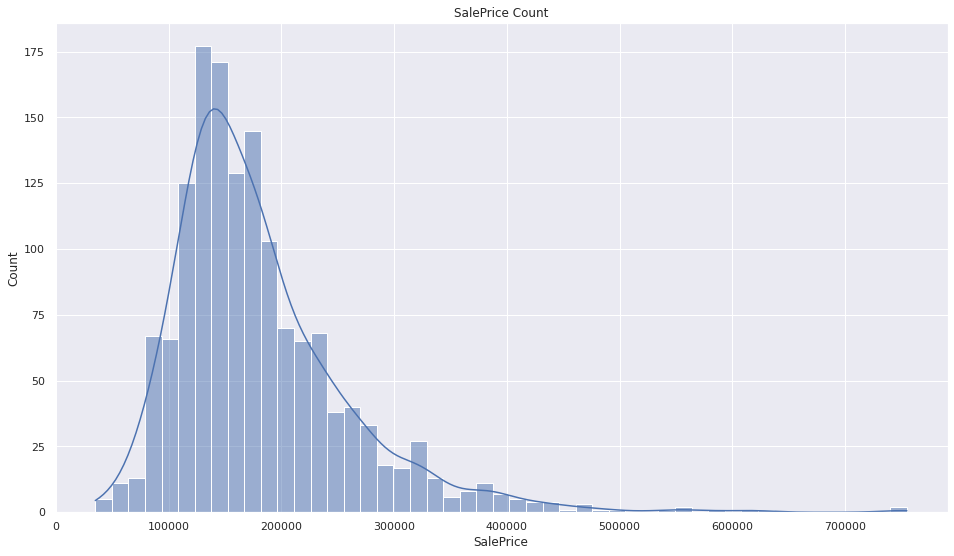

In [15]:
plot = sns.histplot(df_train.SalePrice, kde=True)
plot.set_title("SalePrice Count")
plot.figure.savefig("plots/SalePrice_histplot.png", bbox_inches='tight')

In [16]:
print(f'Skewness of SalePrice: {df_train.SalePrice.skew()}')
print(f'Kurtosis of SalePrice: {df_train.SalePrice.kurt()}')

Skewness of SalePrice: 1.8828757597682129
Kurtosis of SalePrice: 6.536281860064529


Positively skewed and leptokurtic

### Visualising the housing attributes

In [17]:
def create_plot(input_var: str, plot_type: str = 'scatter'):
    data = pd.concat([df_train.SalePrice, df_train[input_var]], axis = 1)
    if plot_type == 'scatter':
        data.plot.scatter(x=input_var, y='SalePrice', c='b')
        plot.set_title(f"Distribution of {input_var} vs. SalePrice")
    elif plot_type == 'boxplot':
        fig = sns.boxplot(x=input_var, y="SalePrice", data=data)
        fig.set_title(f"Distribution of {input_var} vs. SalePrice")

#### MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [165]:
subclass_dict = {20: "1-STORY 1946 & NEWER ALL STYLES",
                 30: "1-STORY 1945 & OLDER",
                 40: "1-STORY W/FINISHED ATTIC ALL AGES",
                 45: "1-1/2 STORY - UNFINISHED ALL AGES",
                 50: "1-1/2 STORY FINISHED ALL AGES",
                 60: "2-STORY 1946 & NEWER",
                 70: "2-STORY 1945 & OLDER",
                 75: "2-1/2 STORY ALL AGES",
                 80: "SPLIT OR MULTI-LEVEL",
                 85: "SPLIT FOYER",
                 90: "DUPLEX - ALL STYLES AND AGES",
                 120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
                 150: "1-1/2 STORY PUD - ALL AGES",
                 160: "2-STORY PUD - 1946 & NEWER",
                 180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                 190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"}
df_train['MSSubClass'] = df_train['MSSubClass'].map(subclass_dict)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

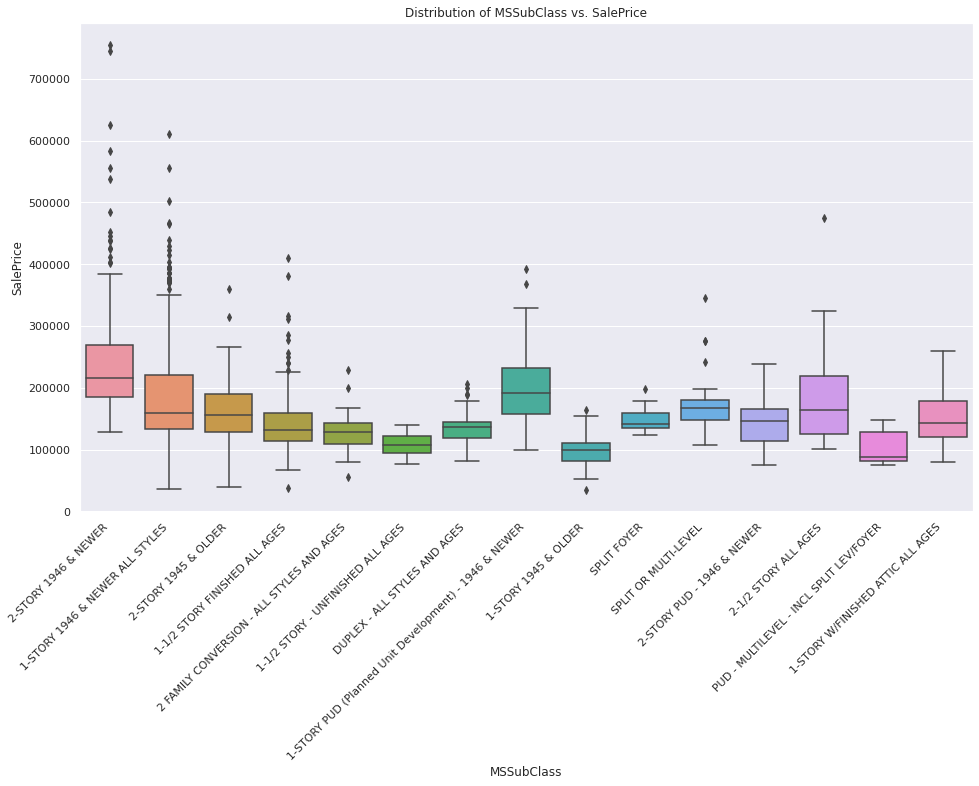

In [170]:
create_plot('MSSubClass', 'boxplot')
plt.xticks(rotation = 45, ha = 'right')

In [20]:
df_train.MSSubClass.value_counts().reset_index().sort_values(by='index').set_index('index').rename_axis(None)

,MSSubClass
20,536
30,69
40,4
45,12
50,144
60,299
70,60
75,16
80,58
85,20


#### MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

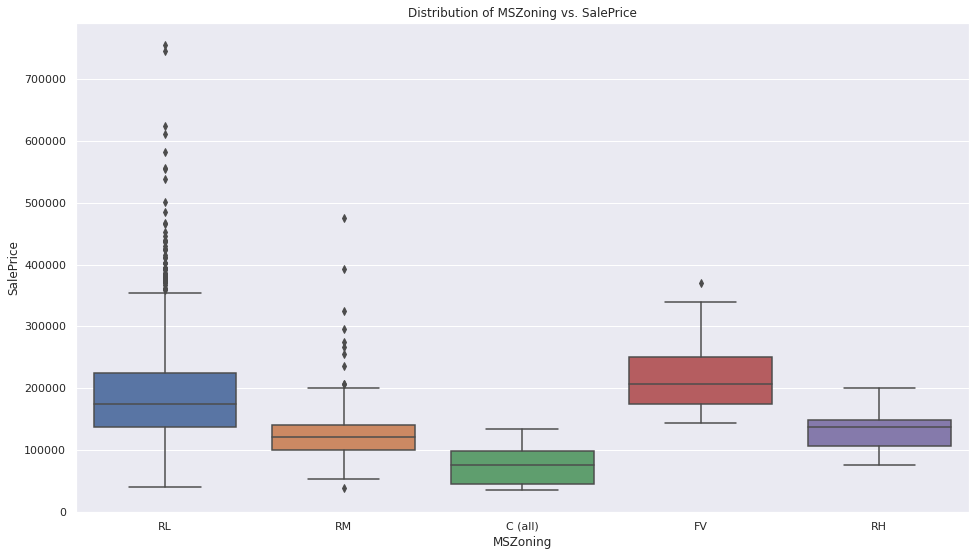

In [21]:
create_plot('MSZoning', 'boxplot')

In [22]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

#### LotFrontage: Linear feet of street connected to property

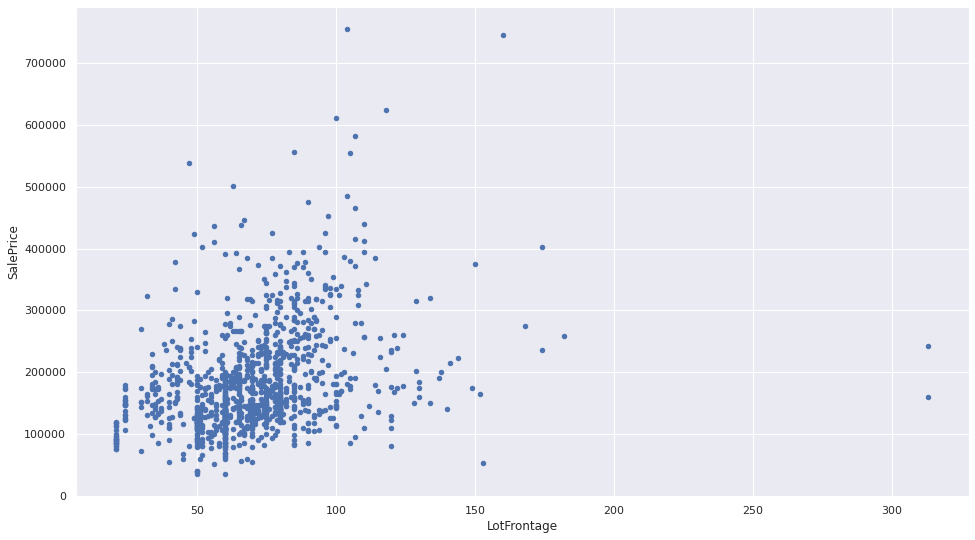

In [23]:
create_plot('LotFrontage')

#### LotArea: Lot size in square feet

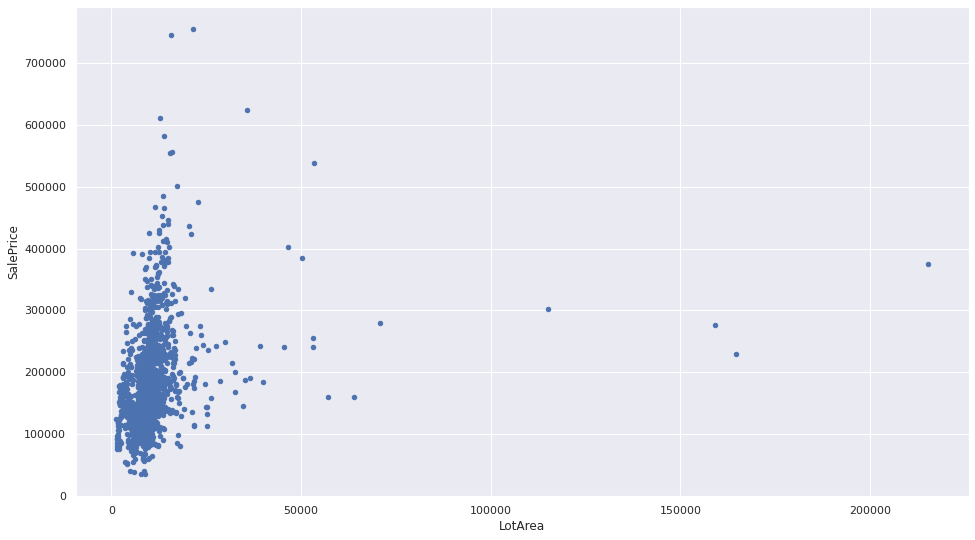

In [24]:
create_plot('LotArea')

#### Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

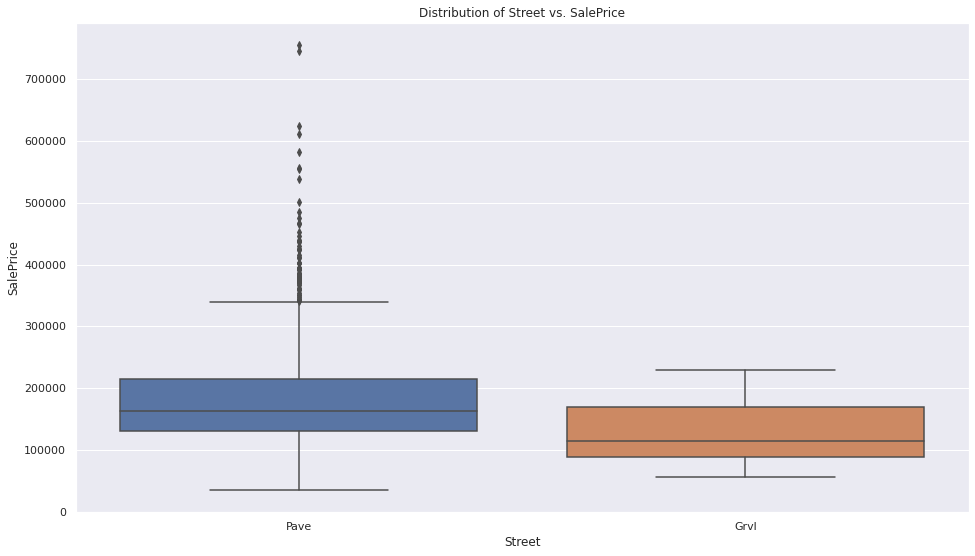

In [25]:
create_plot('Street', 'boxplot')

In [26]:
df_train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

#### Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

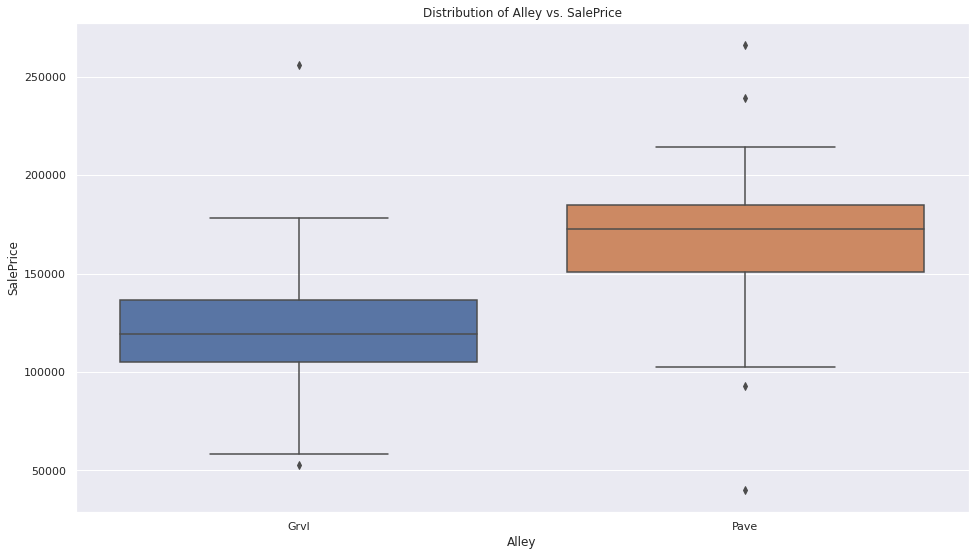

In [27]:
create_plot('Alley', 'boxplot')

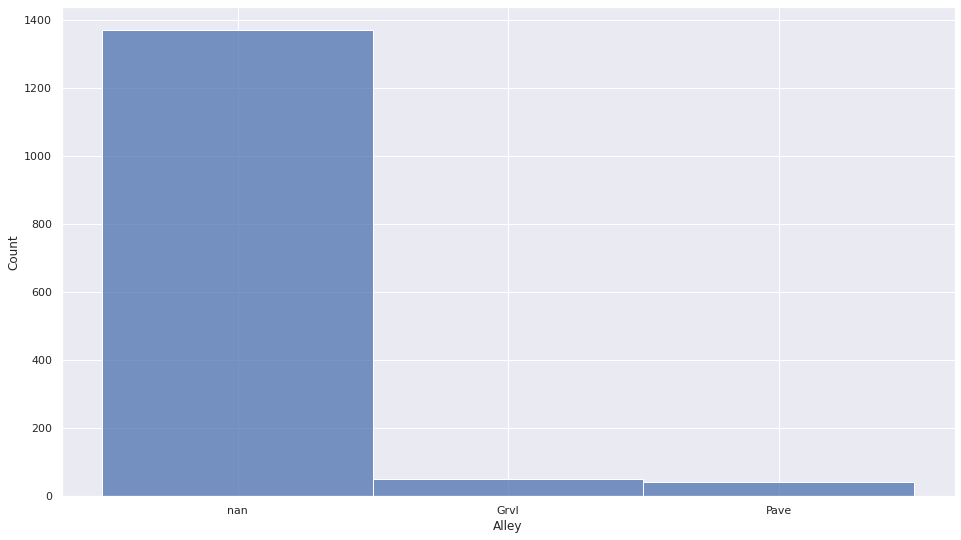

In [28]:
df_train.Alley = df_train.Alley.astype(str)
sns.histplot(data=df_train, x='Alley')

In [29]:
df_train.Alley.value_counts()

nan     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

#### LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

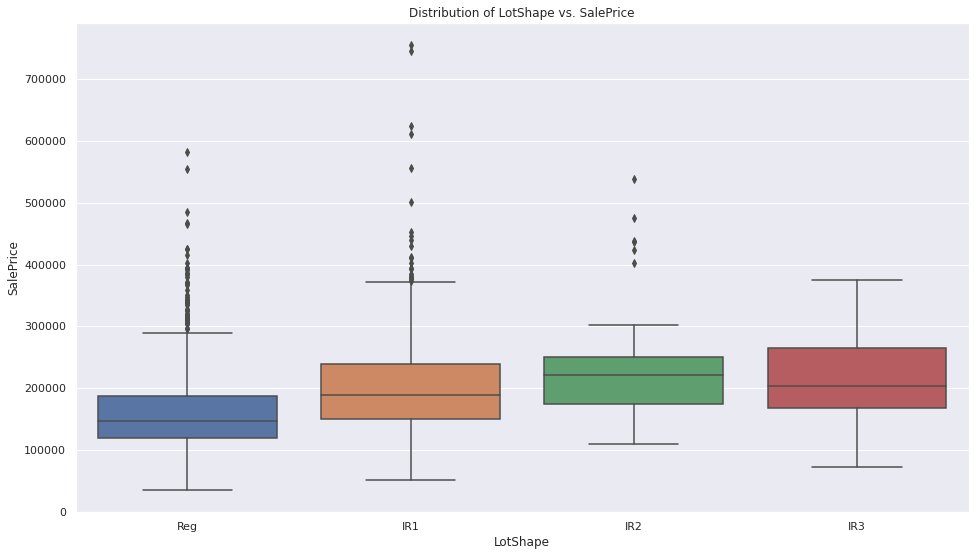

In [30]:
create_plot('LotShape', 'boxplot')

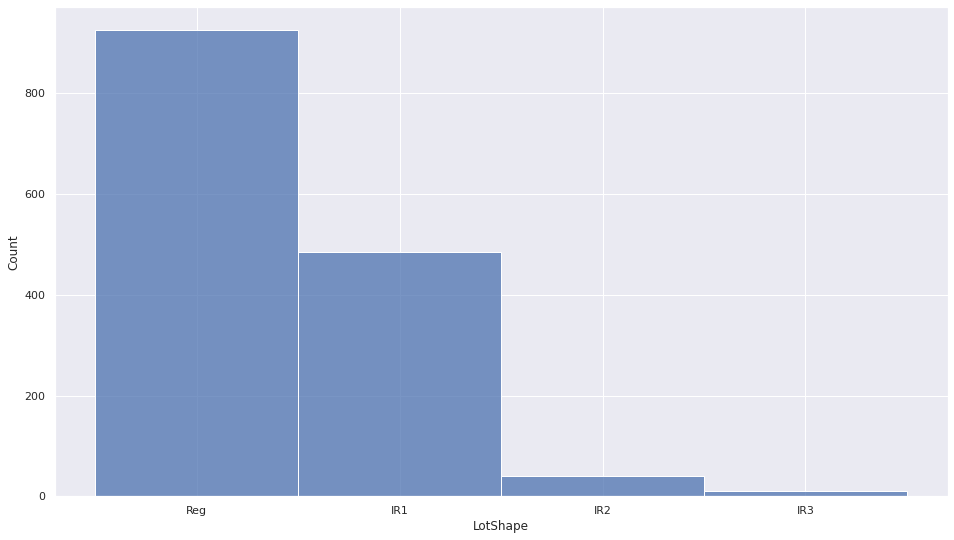

In [31]:
sns.histplot(data=df_train, x='LotShape')

In [32]:
df_train.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

#### LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

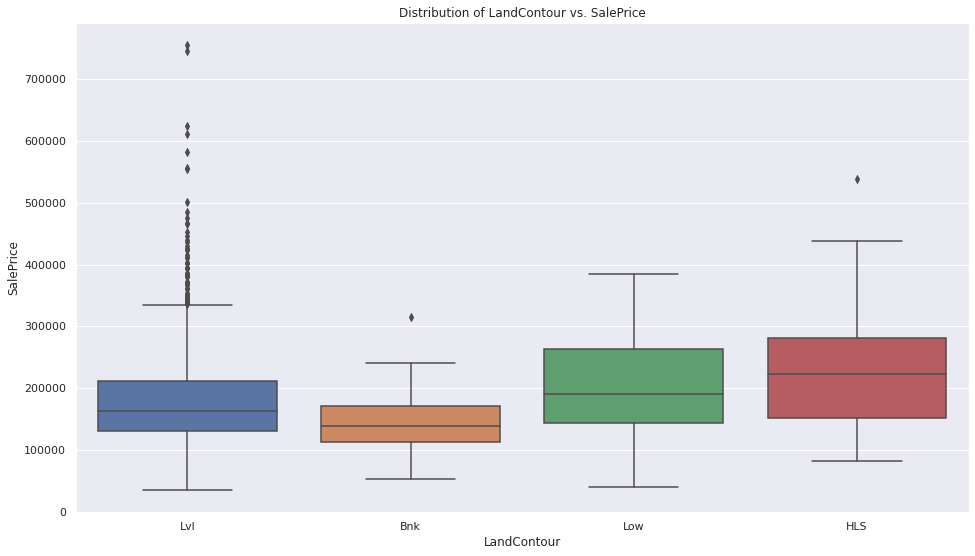

In [33]:
create_plot('LandContour', 'boxplot')

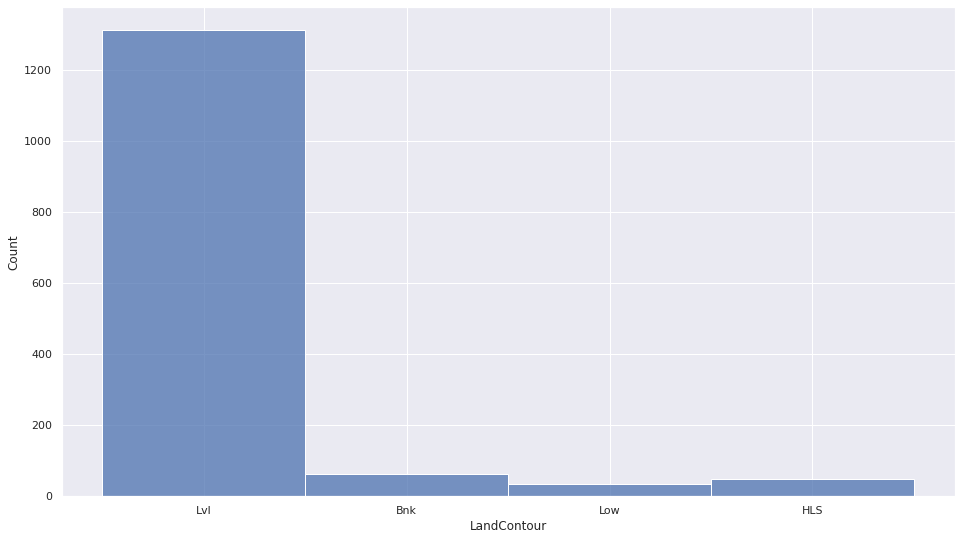

In [34]:
sns.histplot(data=df_train, x='LandContour')

In [35]:
df_train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

#### Utilities: Type of utilities available 

       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

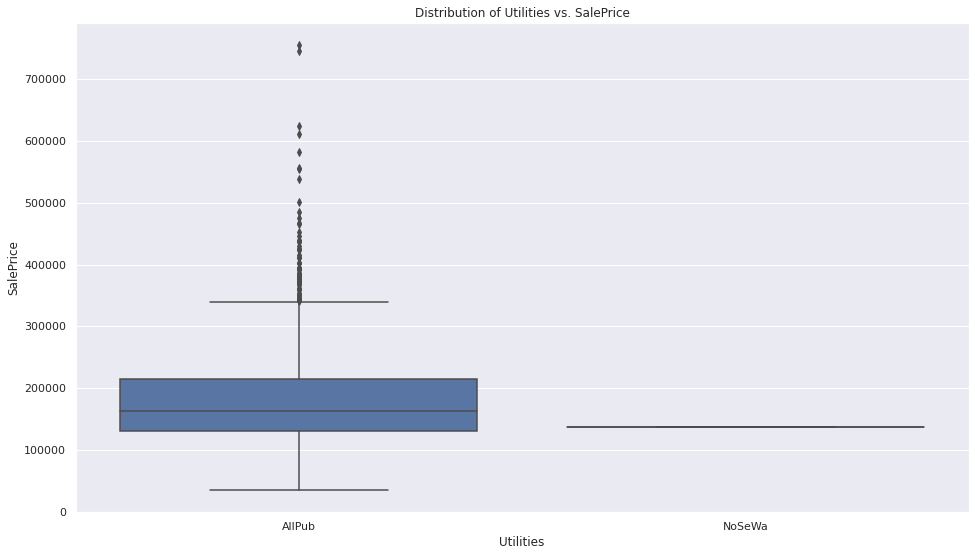

In [36]:
create_plot('Utilities', 'boxplot')

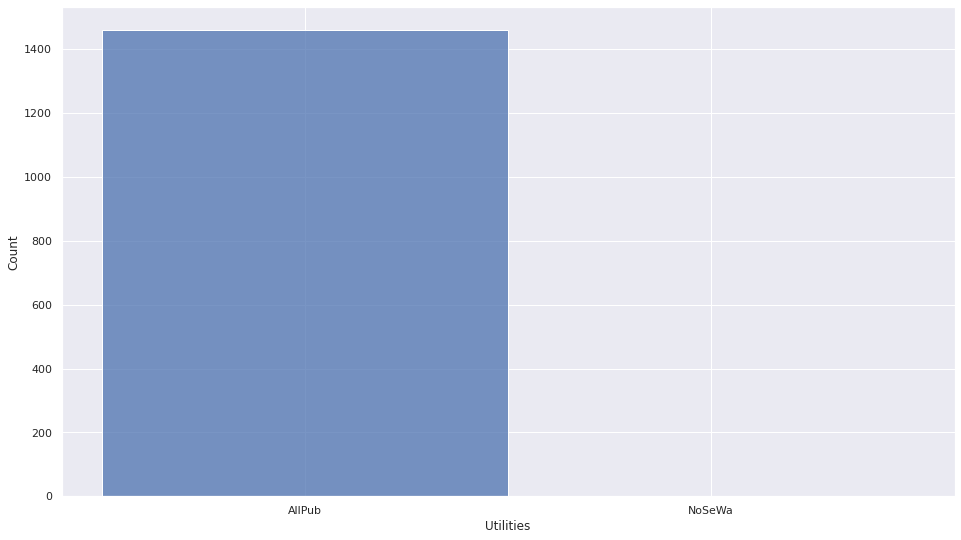

In [37]:
sns.histplot(data=df_train, x='Utilities')

#### LotConfig: Lot configuration 

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

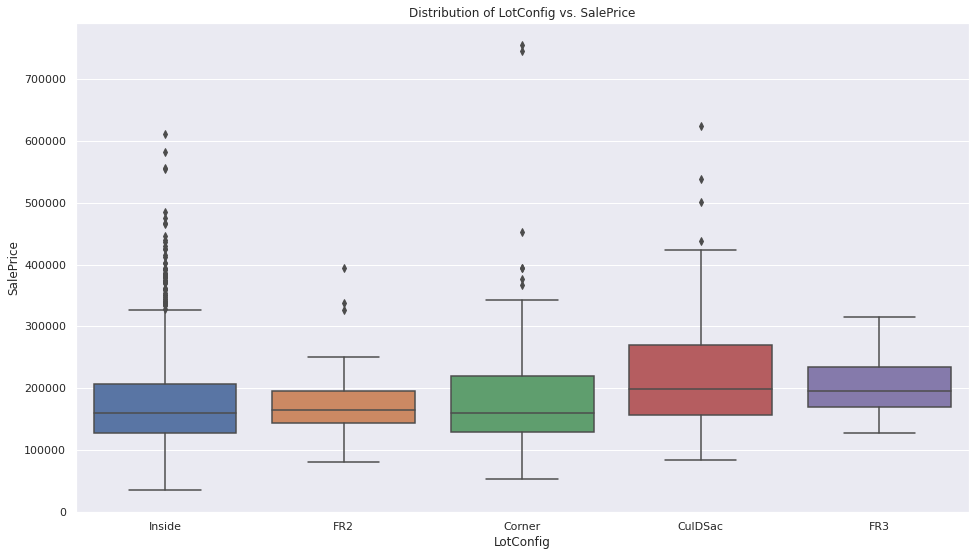

In [38]:
create_plot('LotConfig', 'boxplot')

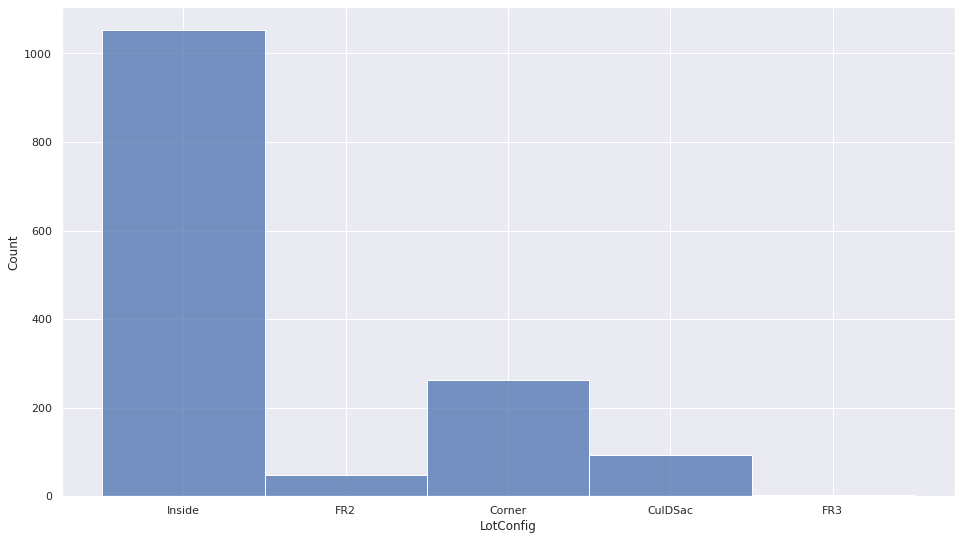

In [39]:
sns.histplot(data=df_train, x='LotConfig')

#### LandSlope: Slope of property


       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

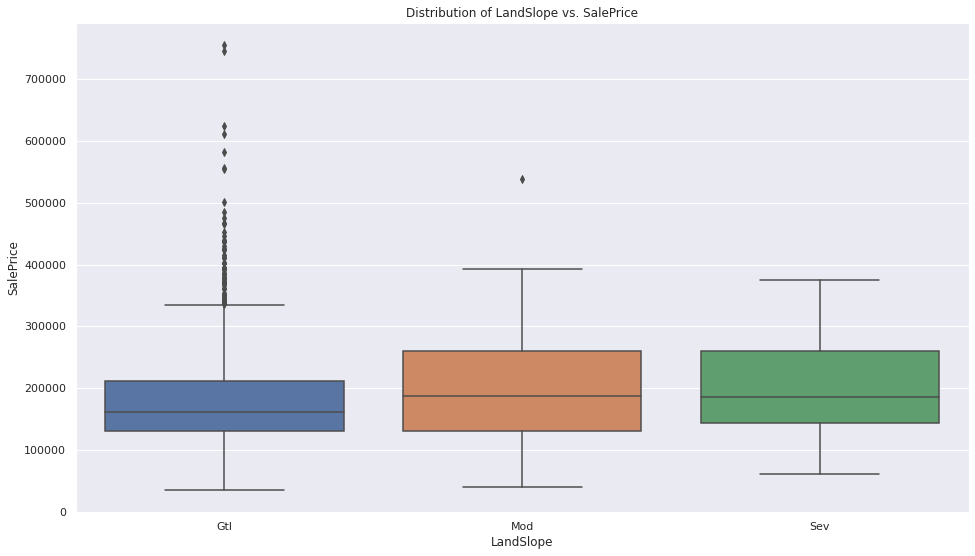

In [40]:
create_plot('LandSlope', 'boxplot')

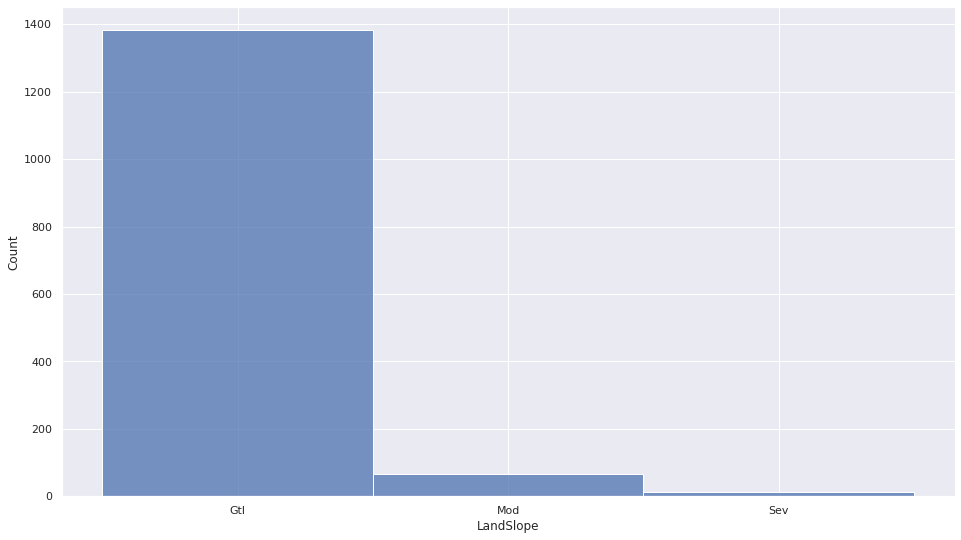

In [41]:
sns.histplot(data=df_train, x='LandSlope')

#### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

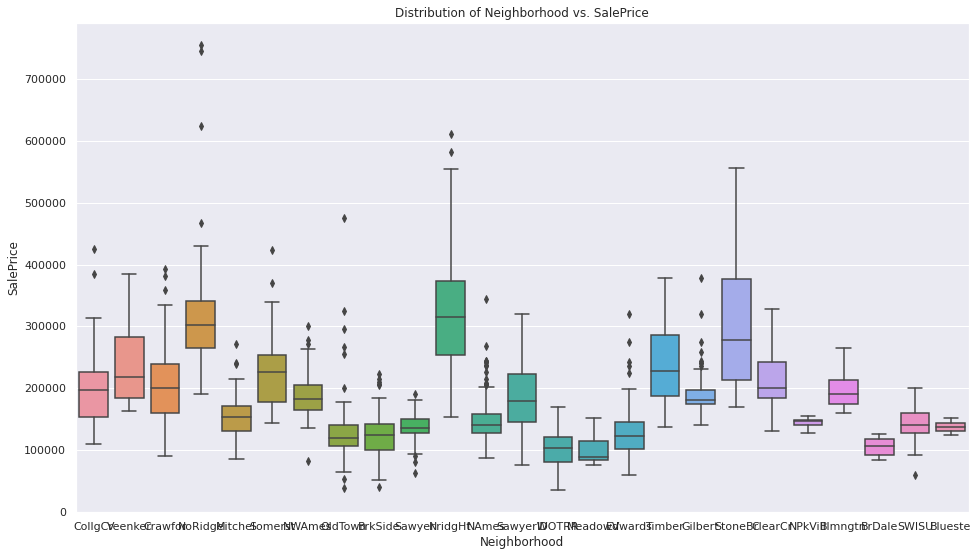

In [42]:
create_plot('Neighborhood', 'boxplot')

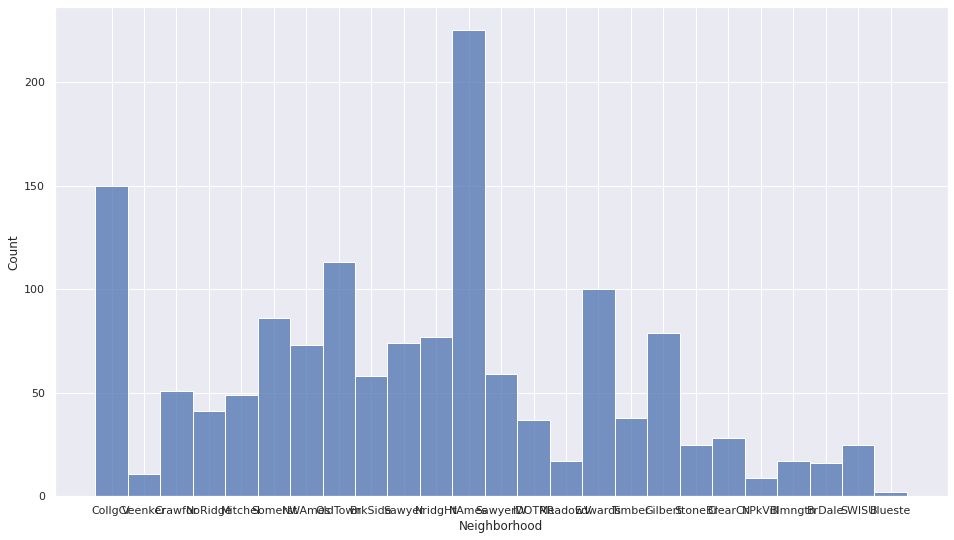

In [43]:
sns.histplot(data=df_train, x='Neighborhood')

#### Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

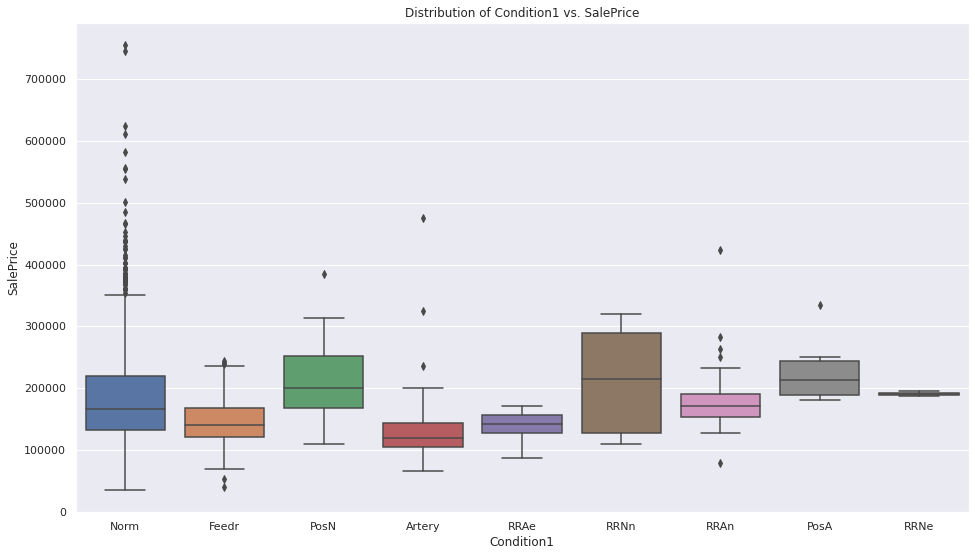

In [44]:
create_plot('Condition1', 'boxplot')

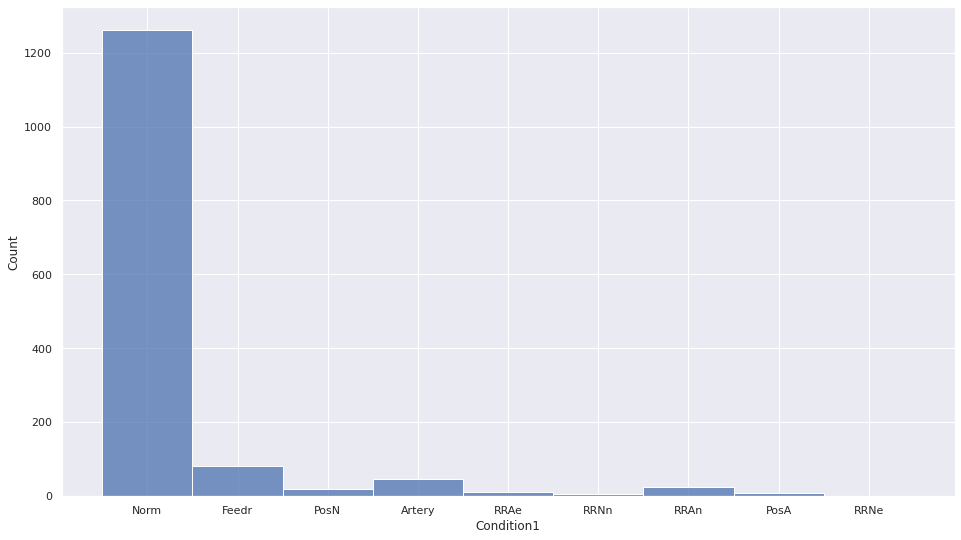

In [45]:
sns.histplot(data=df_train, x='Condition1')

#### Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

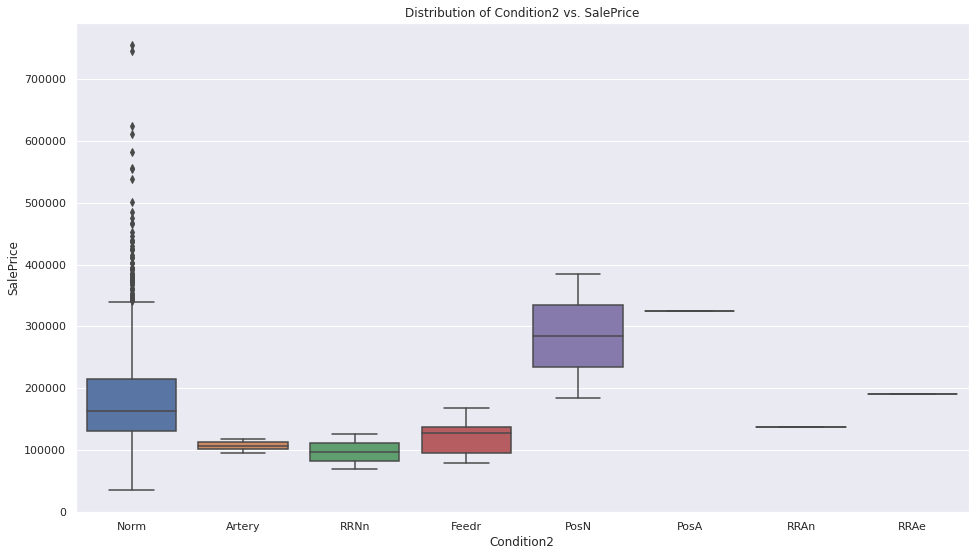

In [46]:
create_plot('Condition2', 'boxplot')

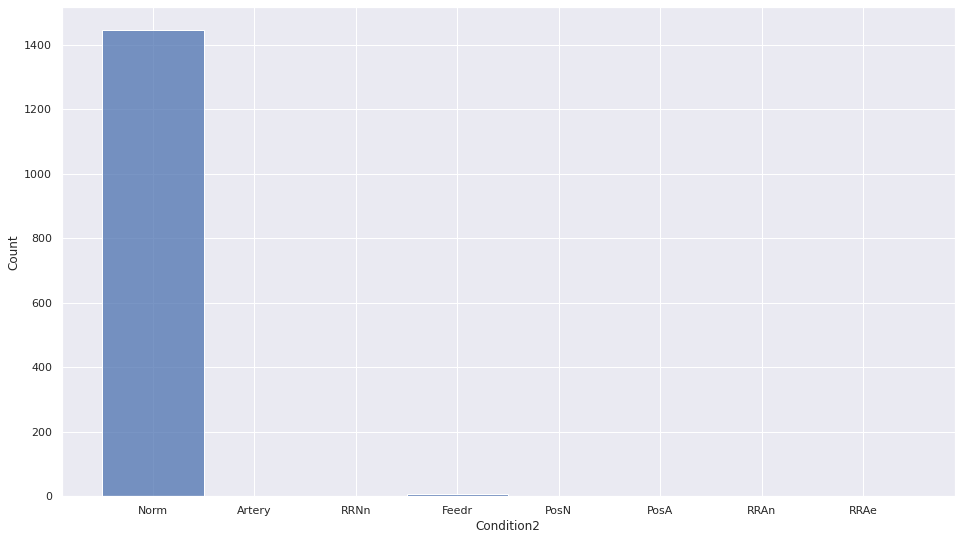

In [47]:
sns.histplot(data=df_train, x="Condition2")

#### BldgType: Type of dwelling

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

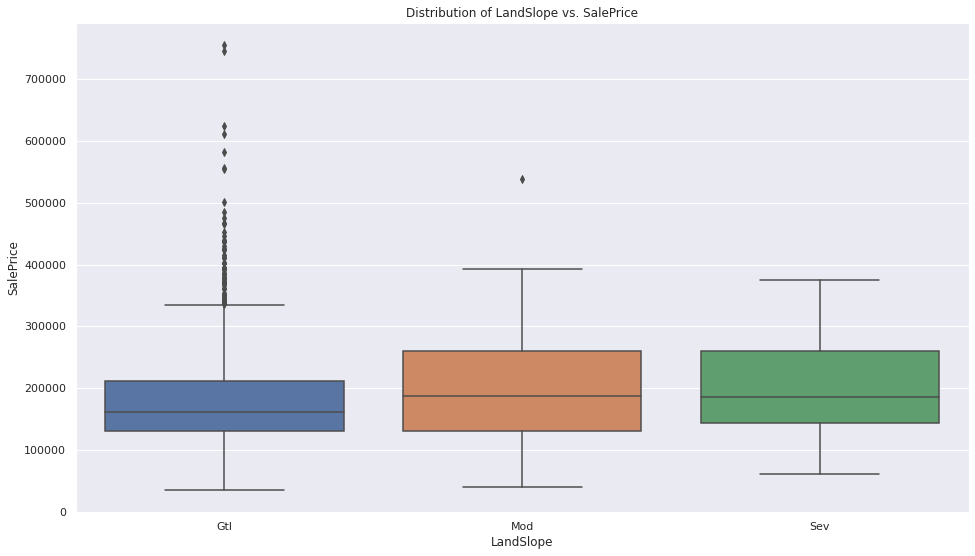

In [48]:
create_plot('LandSlope', 'boxplot')

In [49]:
df_train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

#### HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

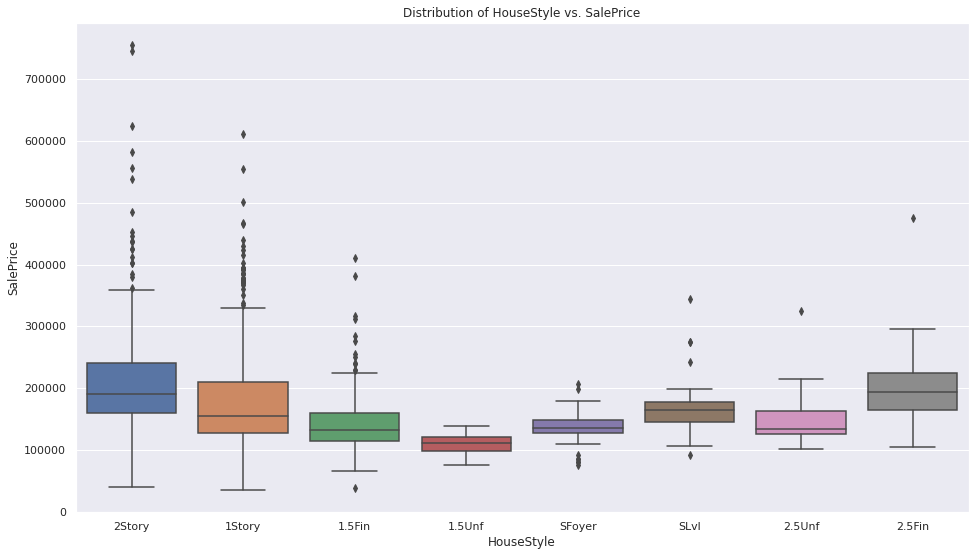

In [50]:
create_plot('HouseStyle', 'boxplot')

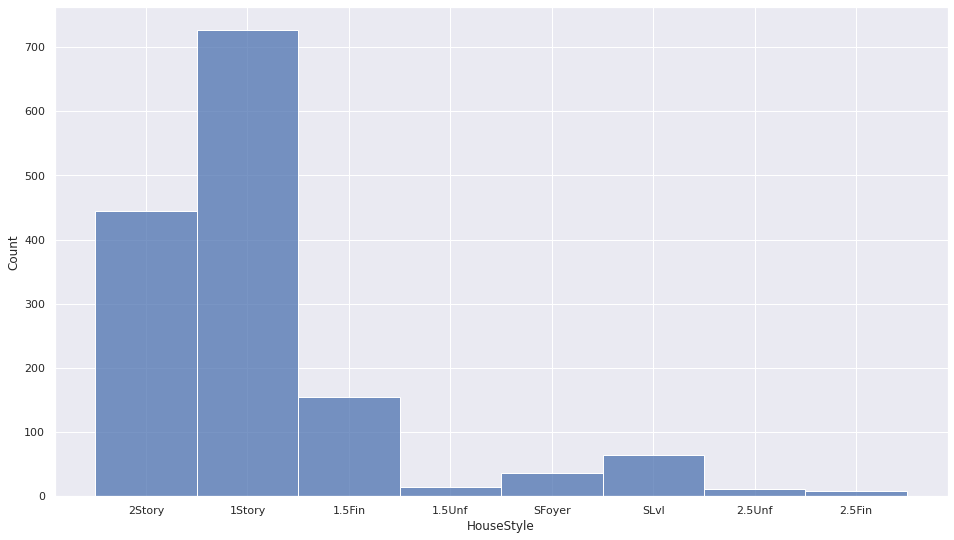

In [51]:
sns.histplot(data=df_train, x="HouseStyle")

#### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

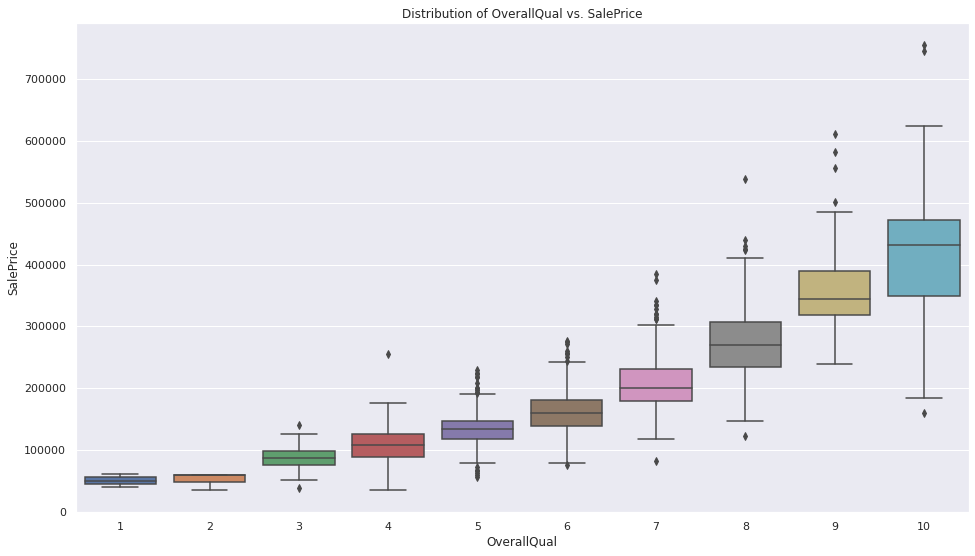

In [52]:
create_plot('OverallQual', 'boxplot')

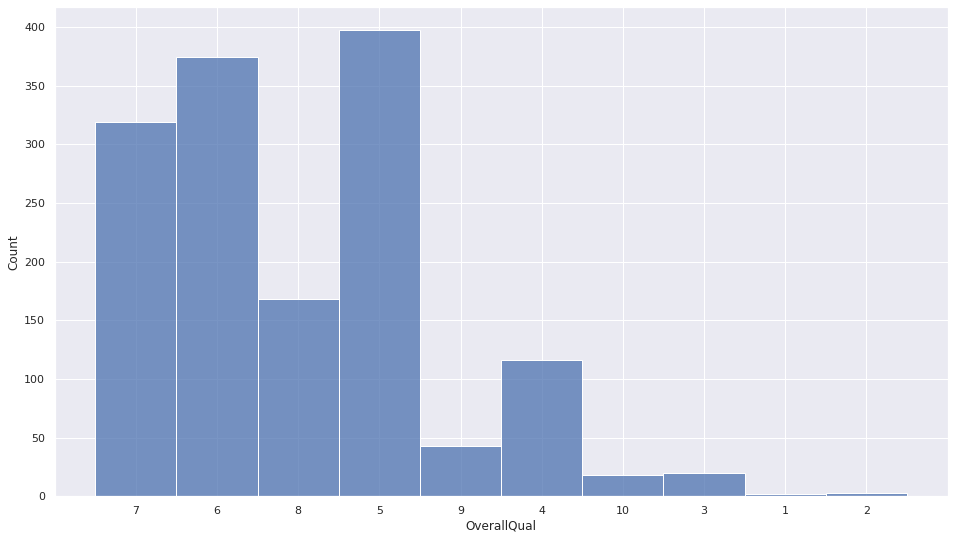

In [53]:
df_train.OverallQual = df_train.OverallQual.astype(str)
sns.histplot(data=df_train, x="OverallQual")

#### OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

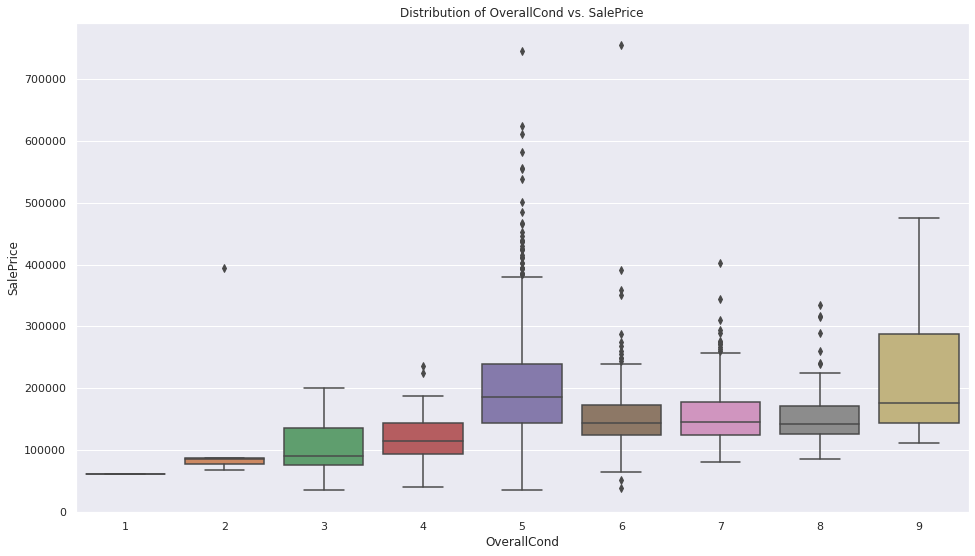

In [54]:
create_plot('OverallCond', 'boxplot')

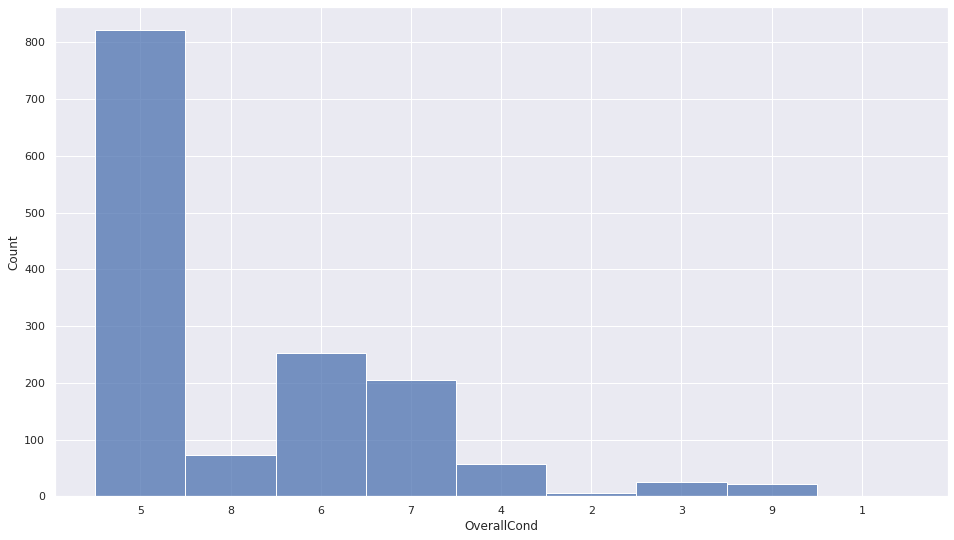

In [55]:
df_train.OverallCond = df_train.OverallCond.astype(str)
sns.histplot(data=df_train, x="OverallCond")

#### YearBuilt: Original construction date

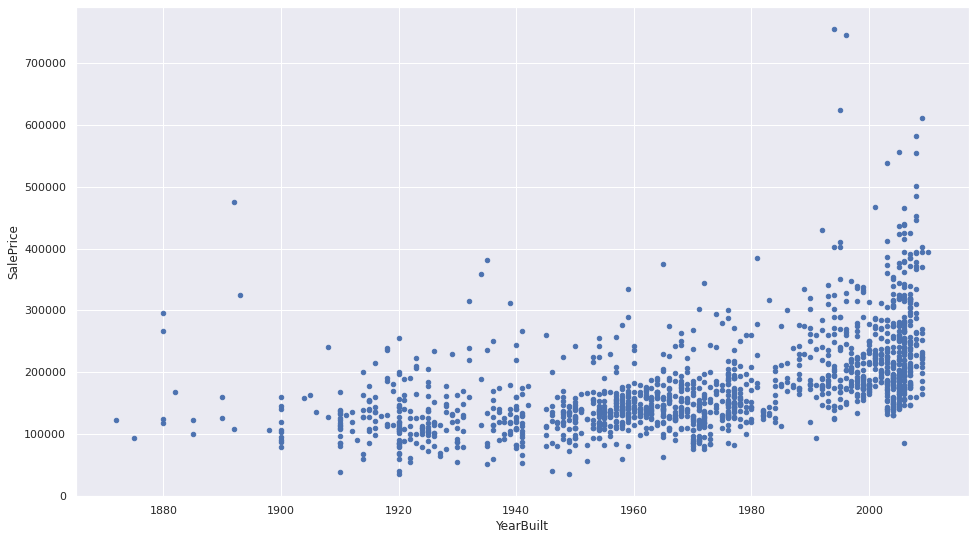

In [56]:
create_plot('YearBuilt')

#### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

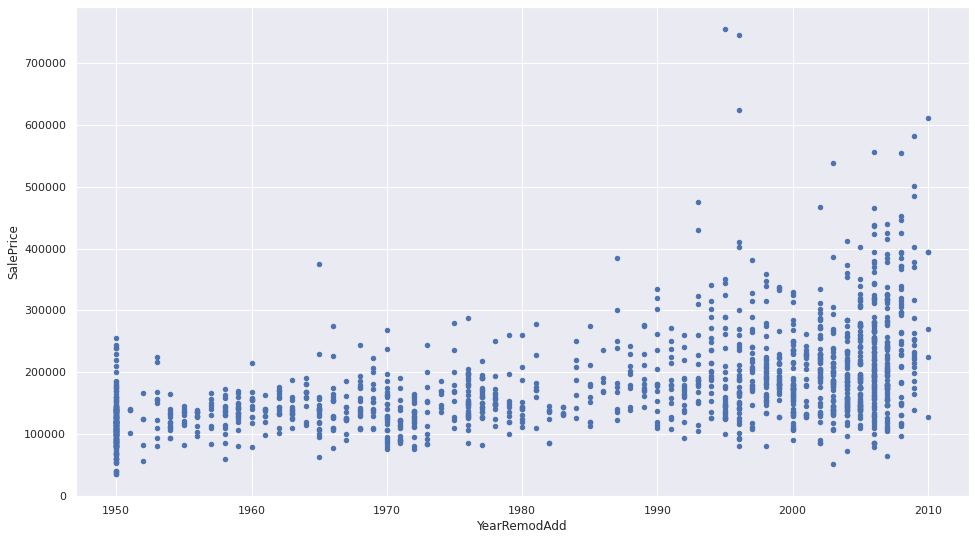

In [57]:
create_plot('YearRemodAdd')

#### RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

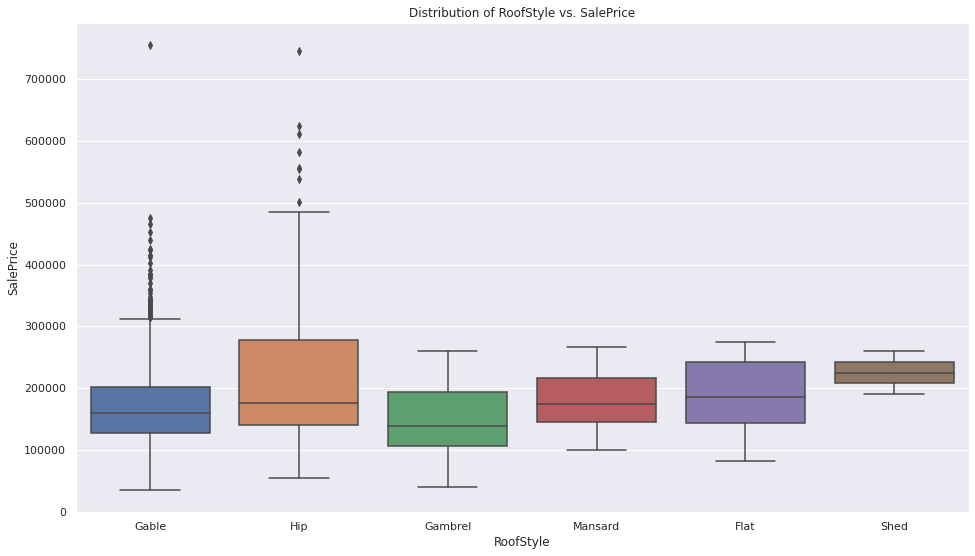

In [58]:
create_plot('RoofStyle', 'boxplot')

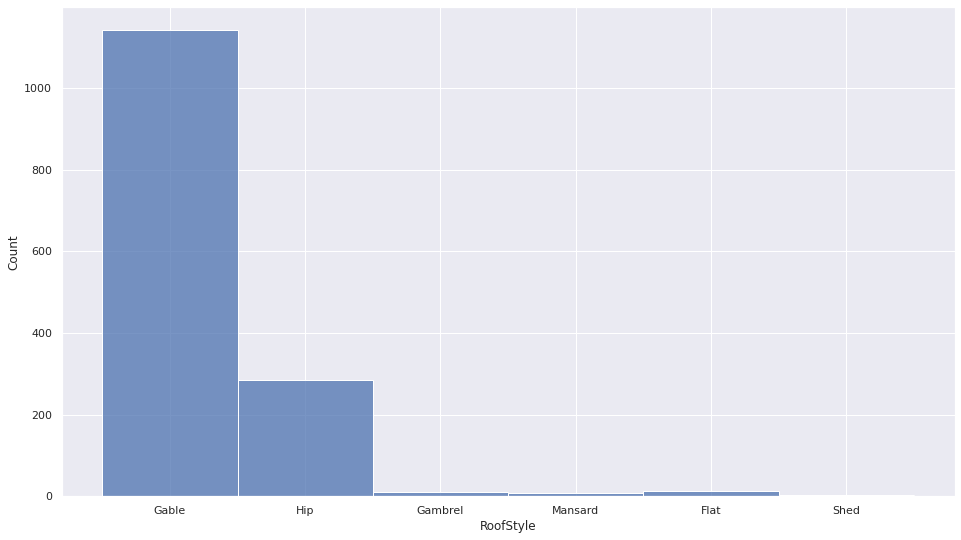

In [59]:
sns.histplot(data=df_train, x="RoofStyle")

#### RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

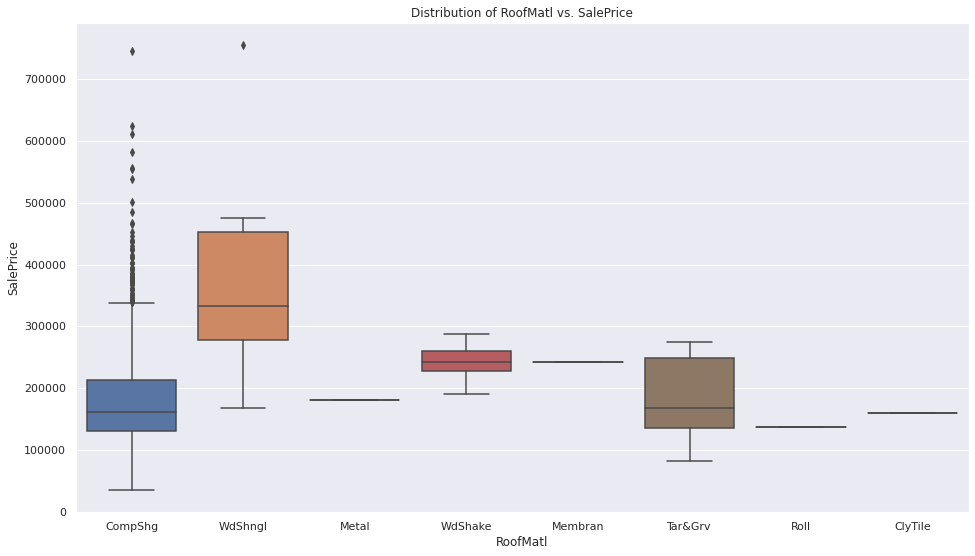

In [60]:
create_plot('RoofMatl', 'boxplot')

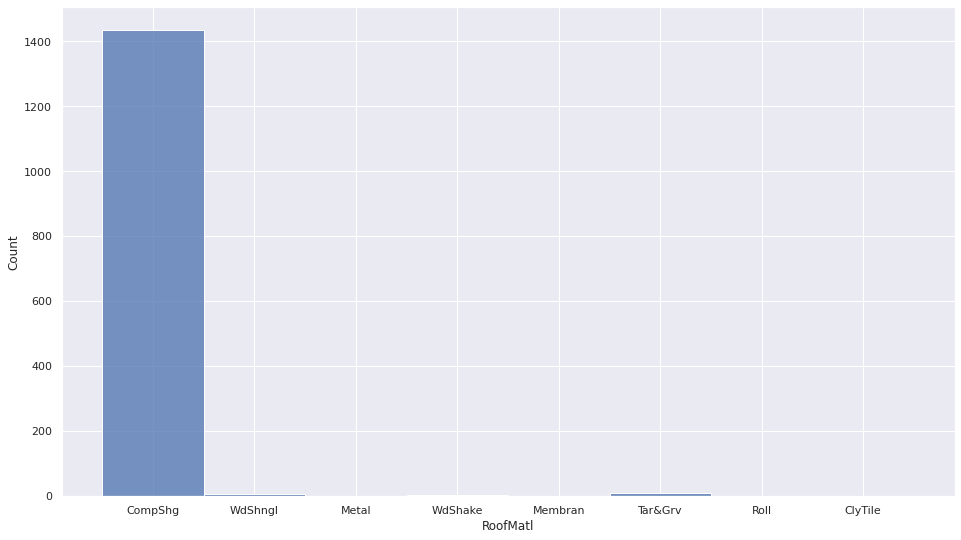

In [61]:
sns.histplot(data=df_train, x="RoofMatl")

#### Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

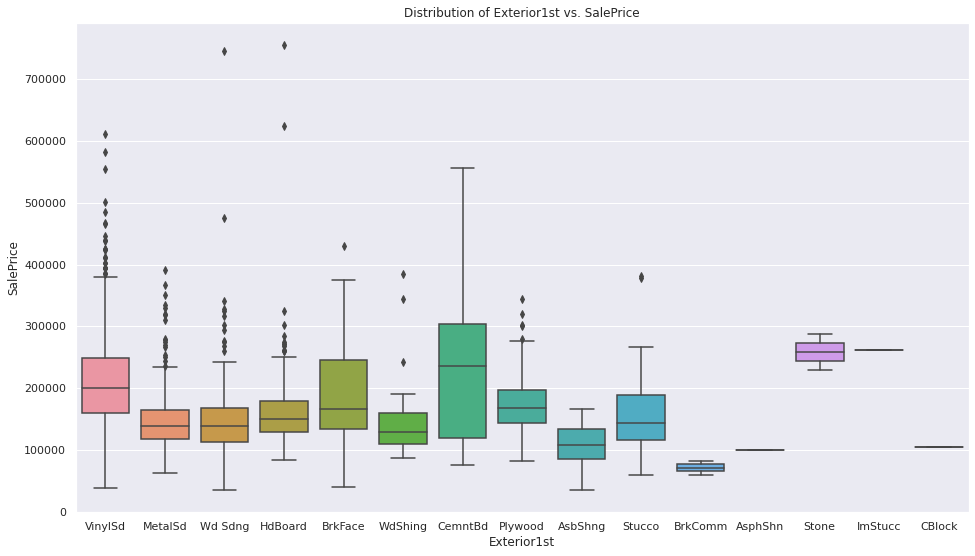

In [62]:
create_plot('Exterior1st', 'boxplot')

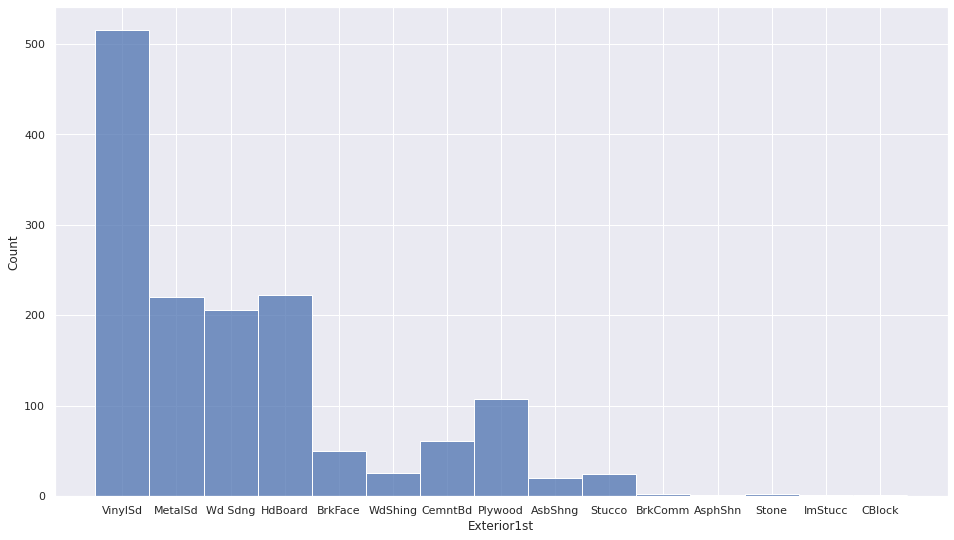

In [63]:
sns.histplot(data=df_train, x="Exterior1st")

#### Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

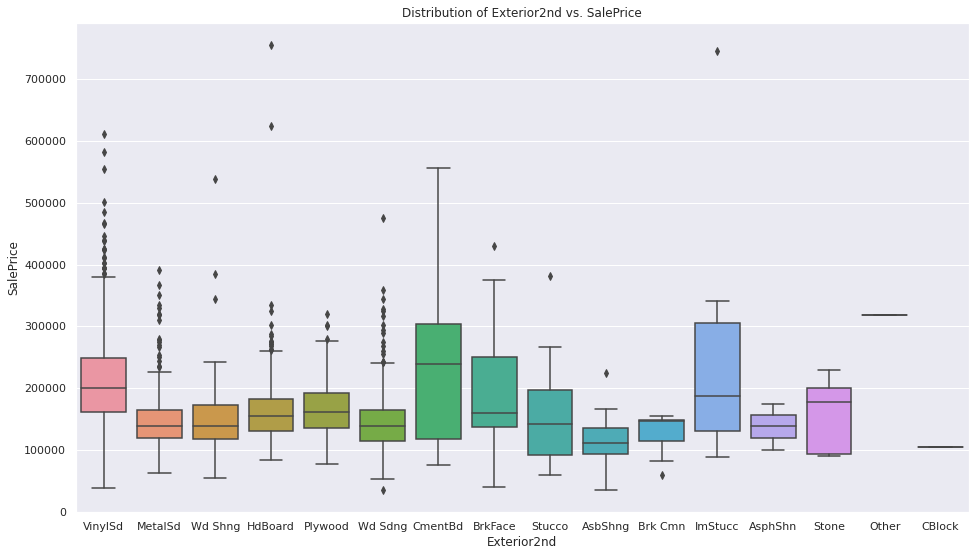

In [64]:
create_plot('Exterior2nd', 'boxplot')

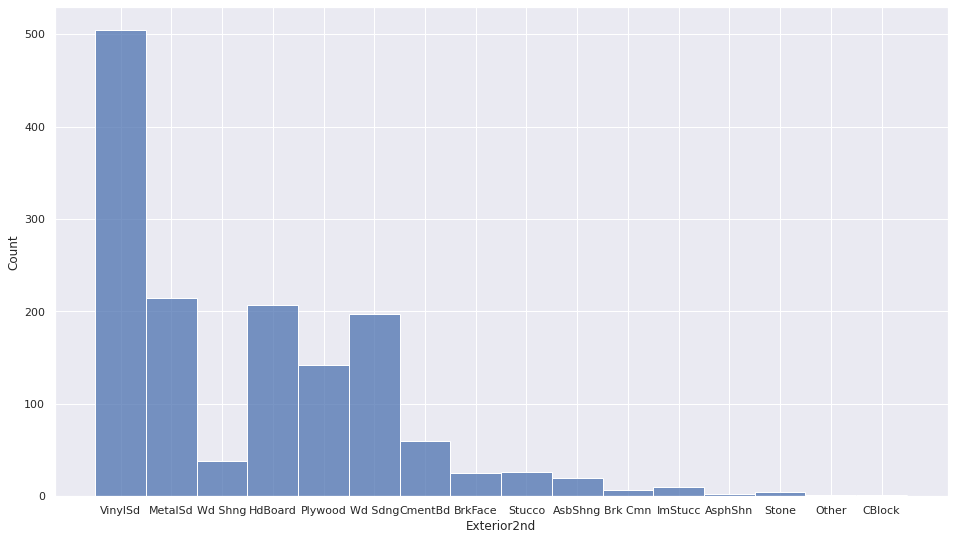

In [65]:
sns.histplot(data=df_train, x="Exterior2nd")

#### MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

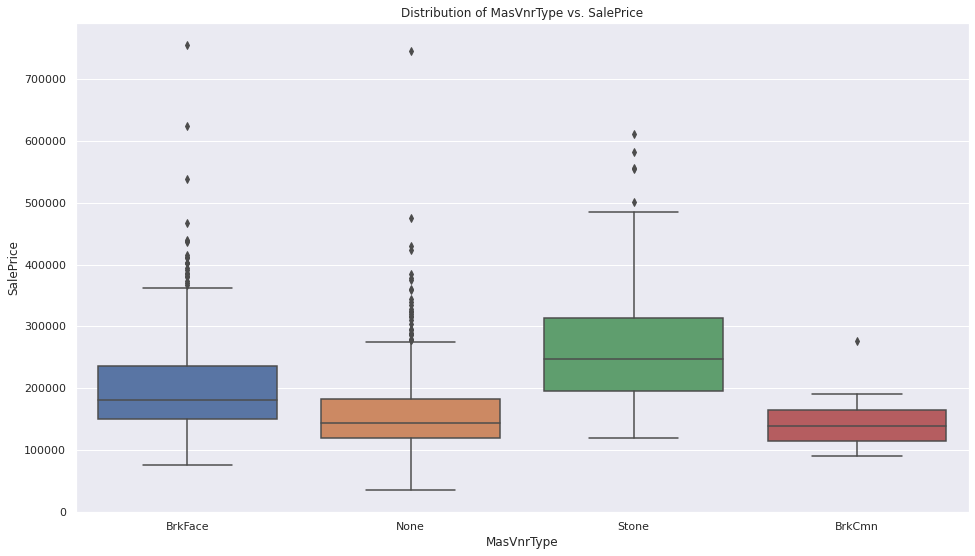

In [66]:
create_plot('MasVnrType', 'boxplot')

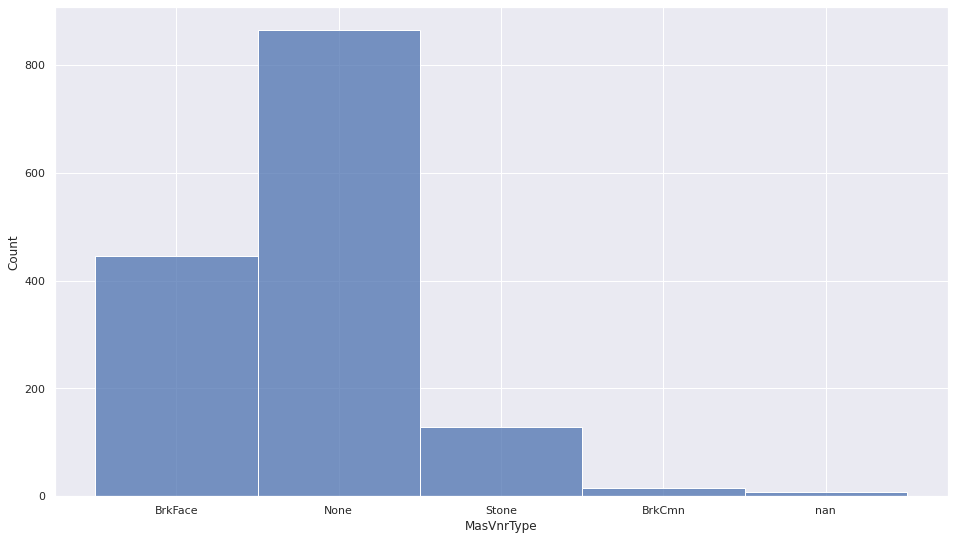

In [67]:
df_train.MasVnrType = df_train.MasVnrType.astype(str)
sns.histplot(data=df_train, x="MasVnrType")

#### MasVnrArea: Masonry veneer area in square feet

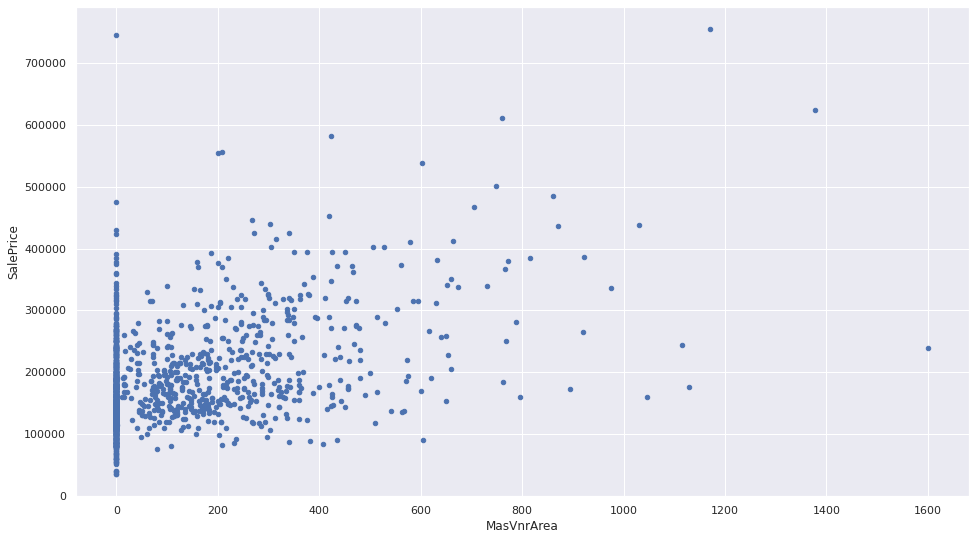

In [68]:
create_plot('MasVnrArea')

#### ExterQual: Evaluates the quality of the material on the exterior 

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

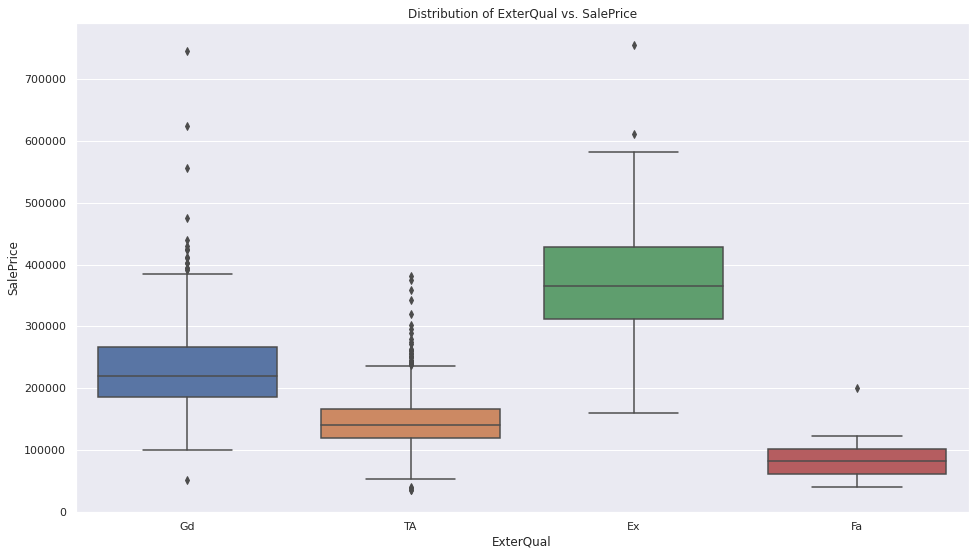

In [69]:
create_plot('ExterQual', 'boxplot')

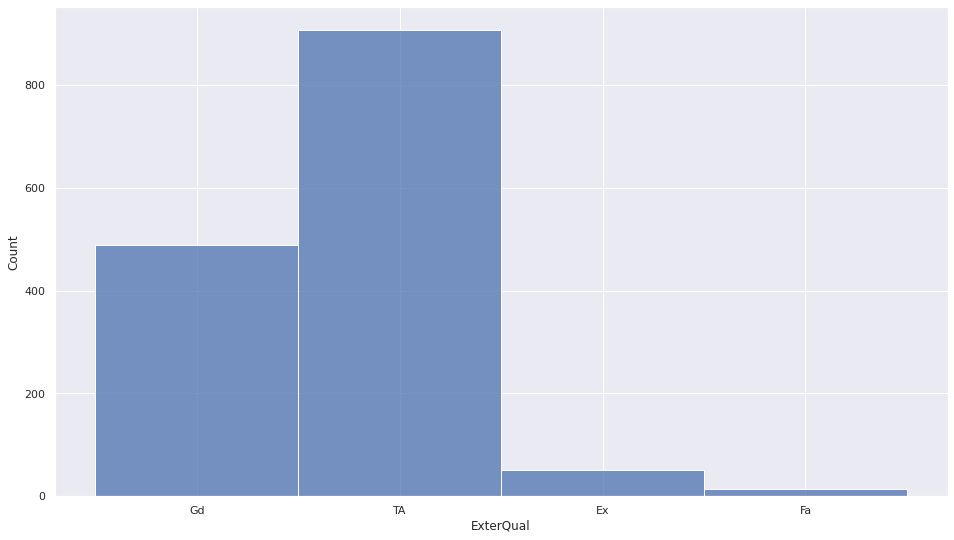

In [70]:
sns.histplot(data=df_train, x="ExterQual")

#### ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

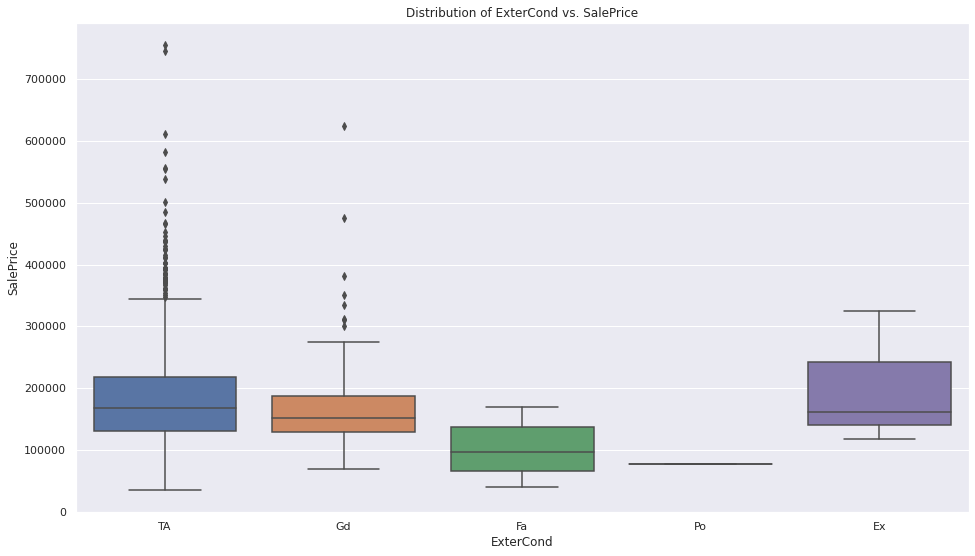

In [71]:
create_plot('ExterCond', 'boxplot')

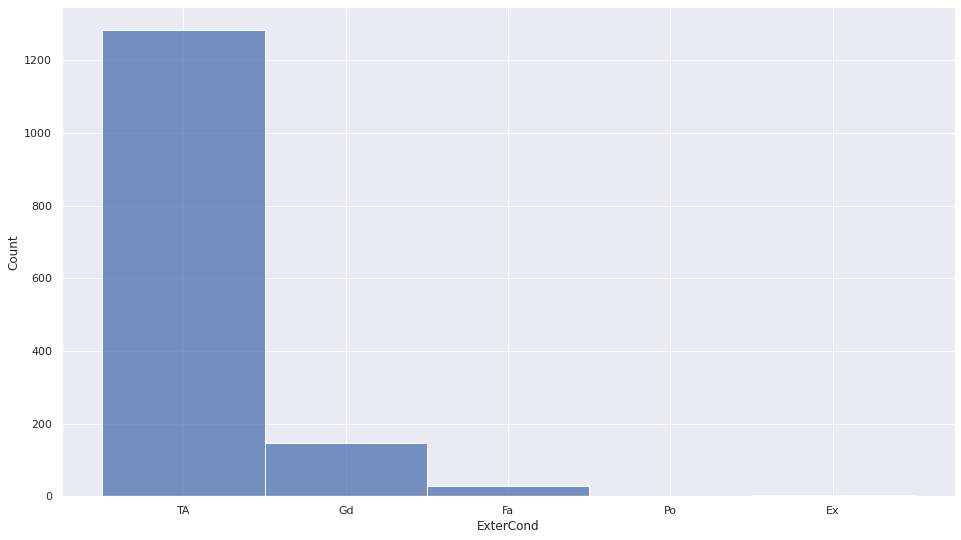

In [72]:
sns.histplot(data=df_train, x="ExterCond")

#### Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

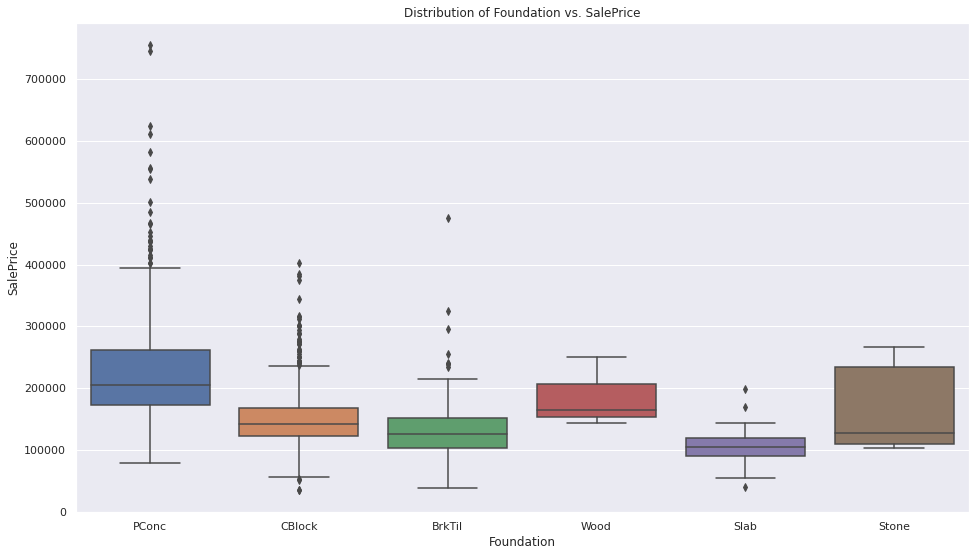

In [73]:
create_plot('Foundation', 'boxplot')

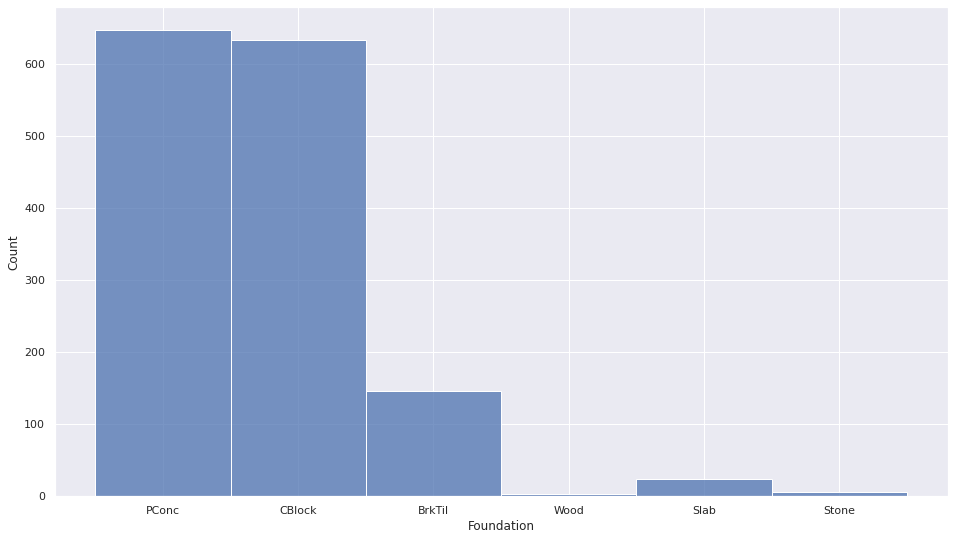

In [74]:
sns.histplot(data=df_train, x="Foundation")

#### BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

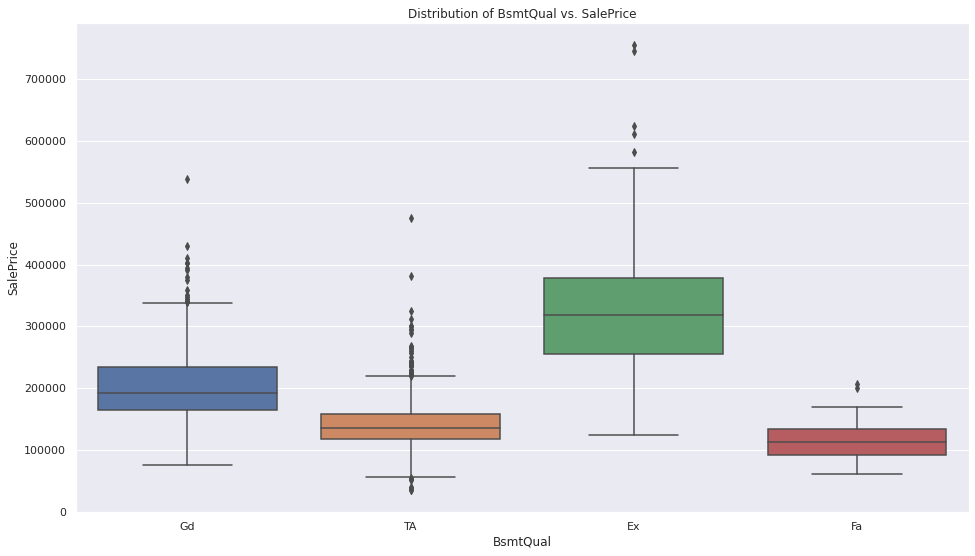

In [75]:
create_plot('BsmtQual', 'boxplot')

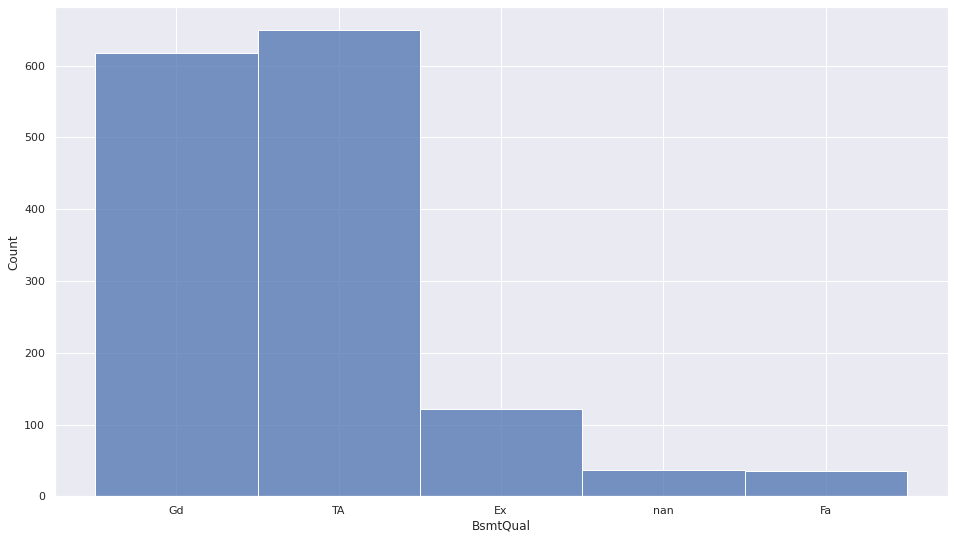

In [76]:
df_train.BsmtQual = df_train.BsmtQual.astype(str)
sns.histplot(data=df_train, x="BsmtQual")

#### BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

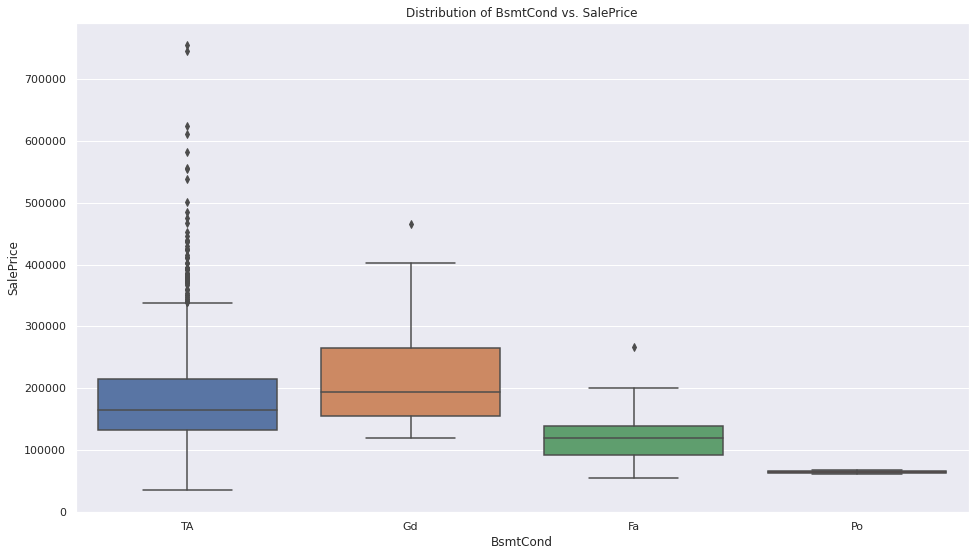

In [77]:
create_plot('BsmtCond', 'boxplot')

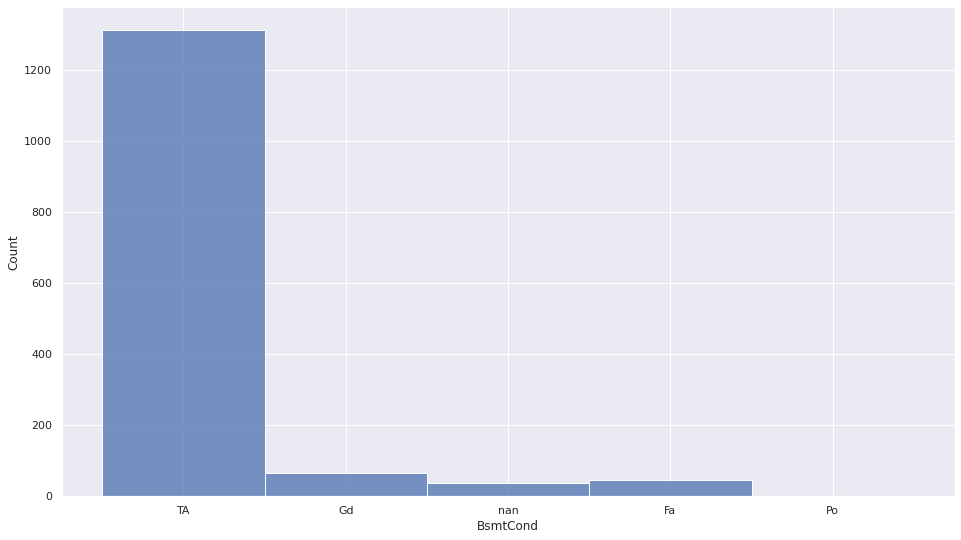

In [78]:
df_train.BsmtCond = df_train.BsmtCond.astype(str)
sns.histplot(data=df_train, x="BsmtCond")

#### BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

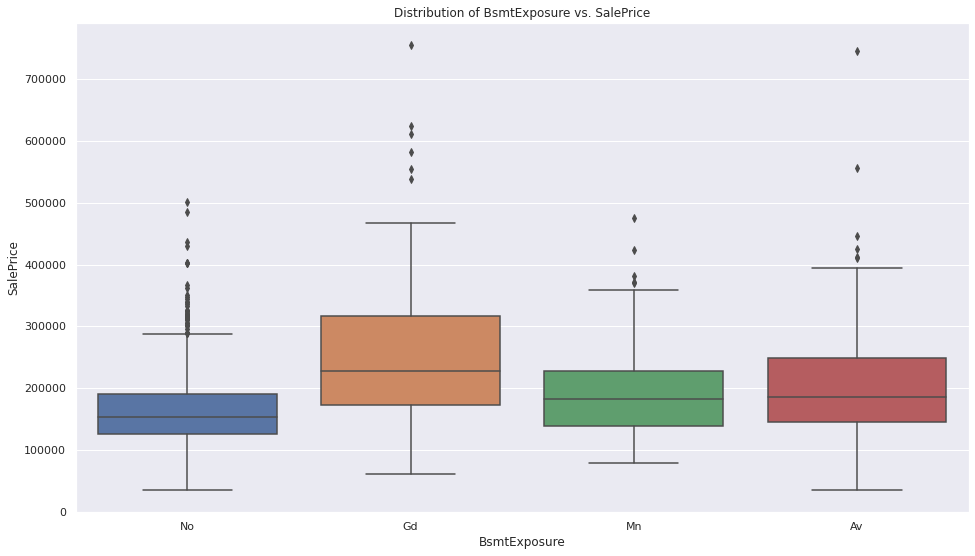

In [79]:
create_plot('BsmtExposure', 'boxplot')

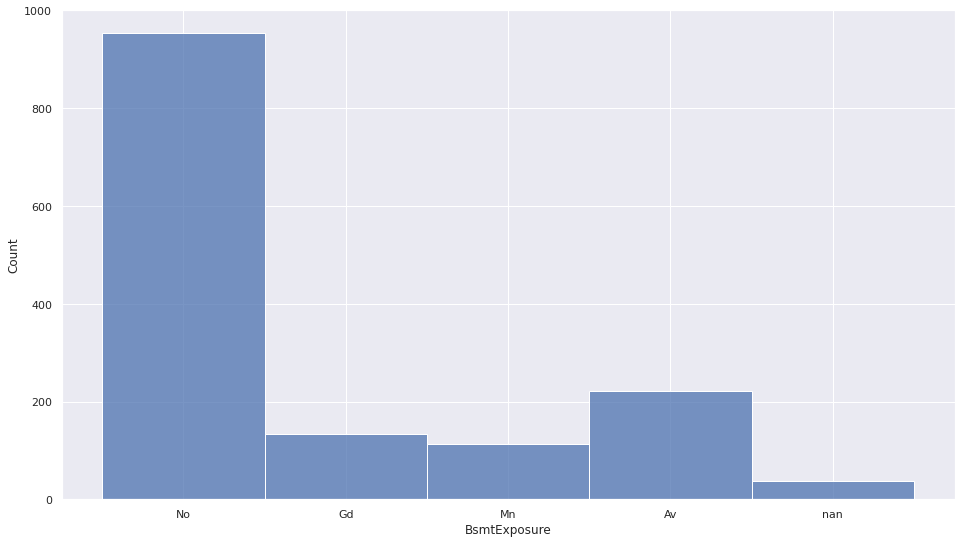

In [80]:
df_train.BsmtExposure = df_train.BsmtExposure.astype(str)
sns.histplot(data=df_train, x="BsmtExposure")

#### BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

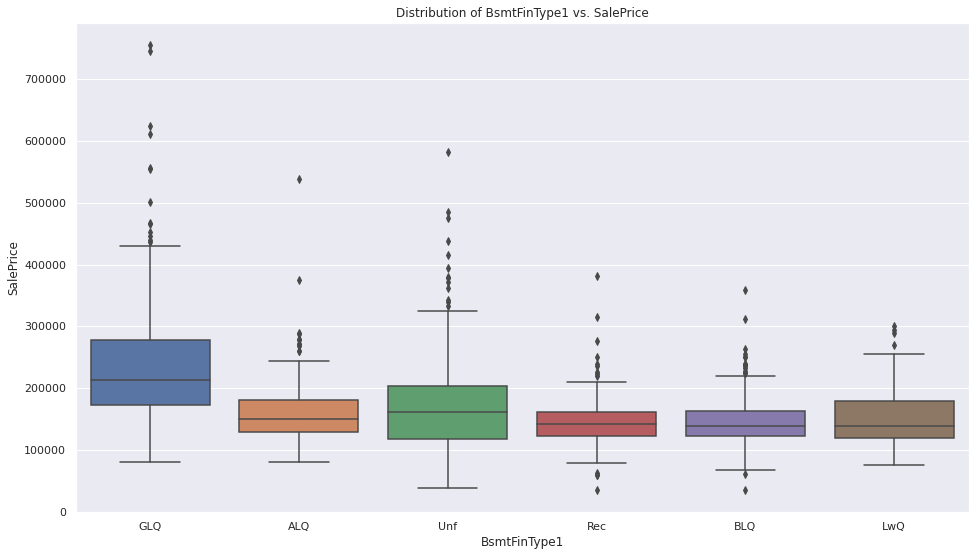

In [81]:
create_plot('BsmtFinType1', 'boxplot')

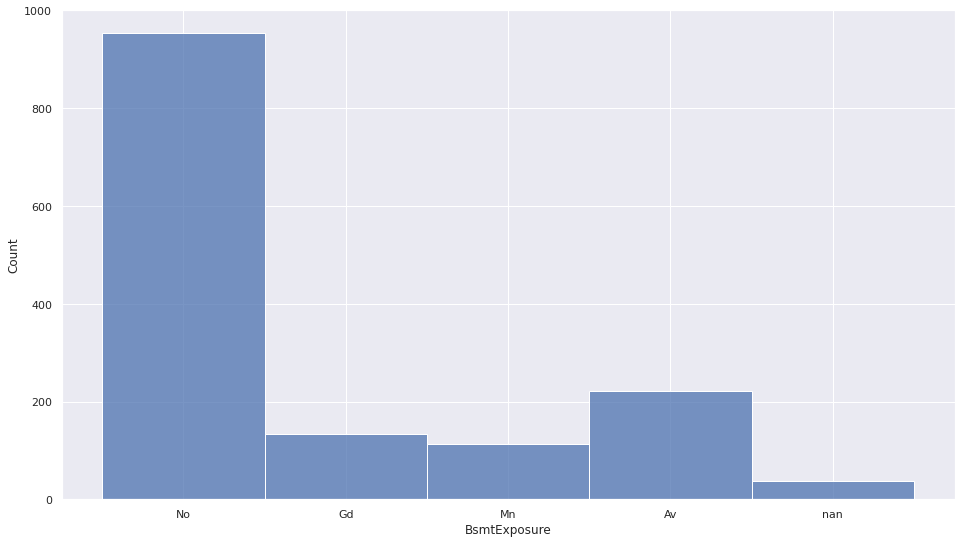

In [82]:
df_train.BsmtExposure = df_train.BsmtExposure.astype(str)
sns.histplot(data=df_train, x="BsmtExposure")

#### BsmtFinSF1: Type 1 finished square feet

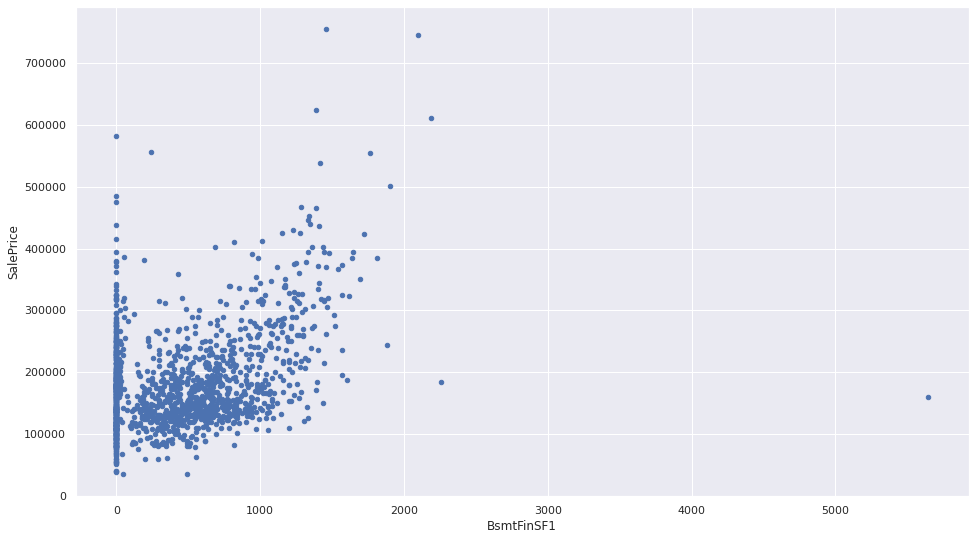

In [83]:
create_plot('BsmtFinSF1')

#### BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

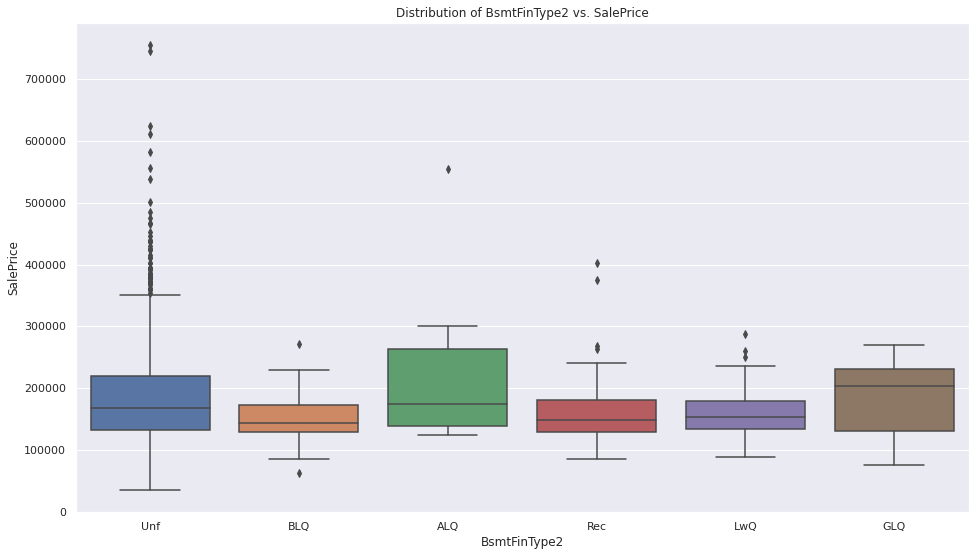

In [84]:
create_plot('BsmtFinType2', 'boxplot')

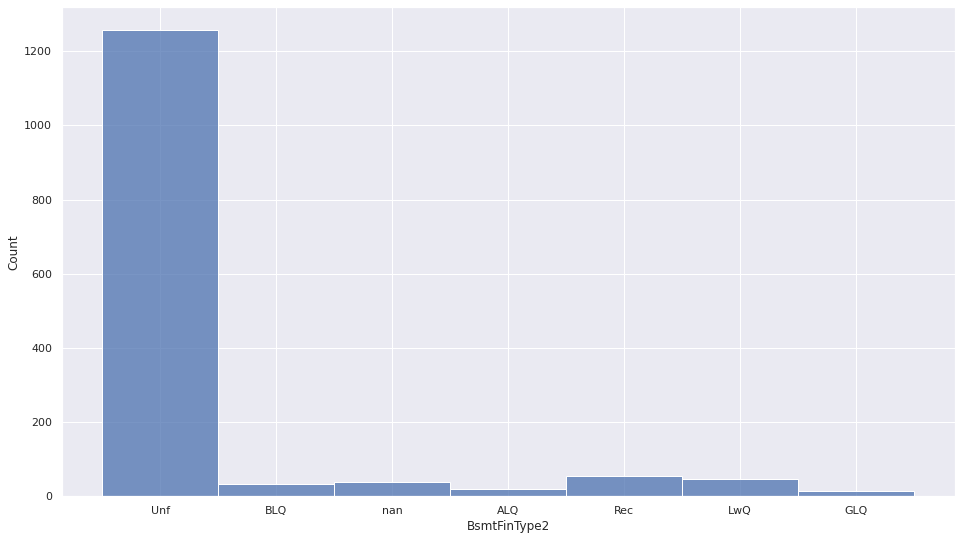

In [85]:
df_train.BsmtFinType2 = df_train.BsmtFinType2.astype(str)
sns.histplot(data=df_train, x="BsmtFinType2")

#### BsmtFinSF2: Type 2 finished square feet

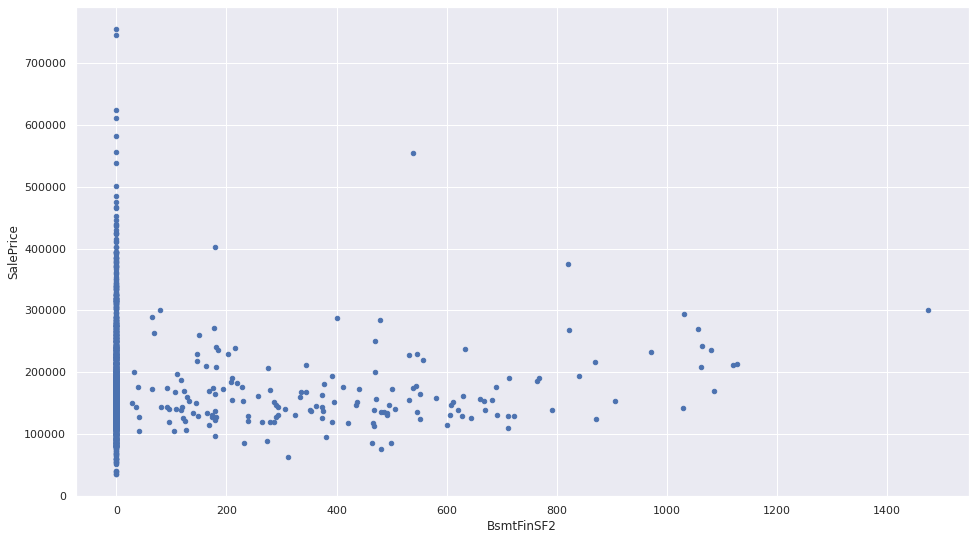

In [86]:
create_plot('BsmtFinSF2')

#### BsmtUnfSF: Unfinished square feet of basement area

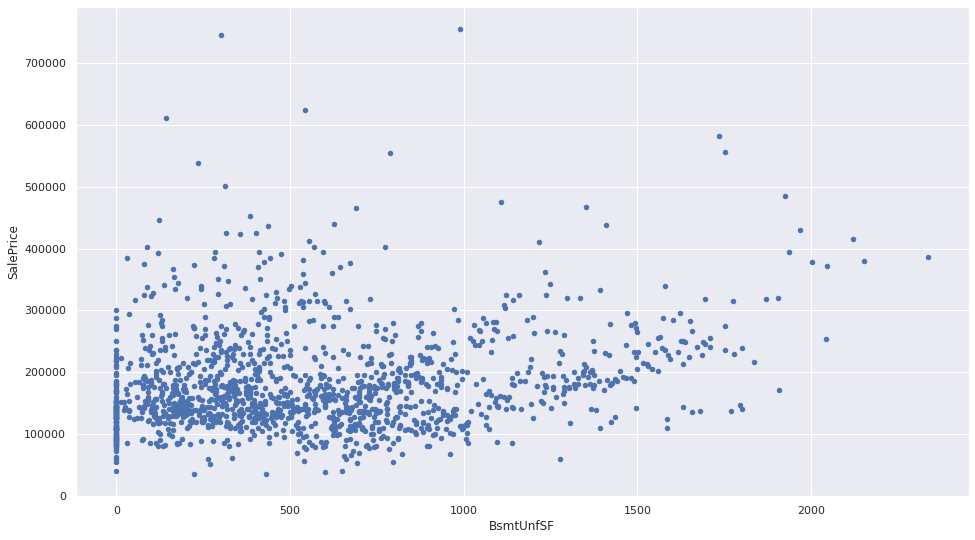

In [87]:
create_plot('BsmtUnfSF')

#### TotalBsmtSF: Total square feet of basement area

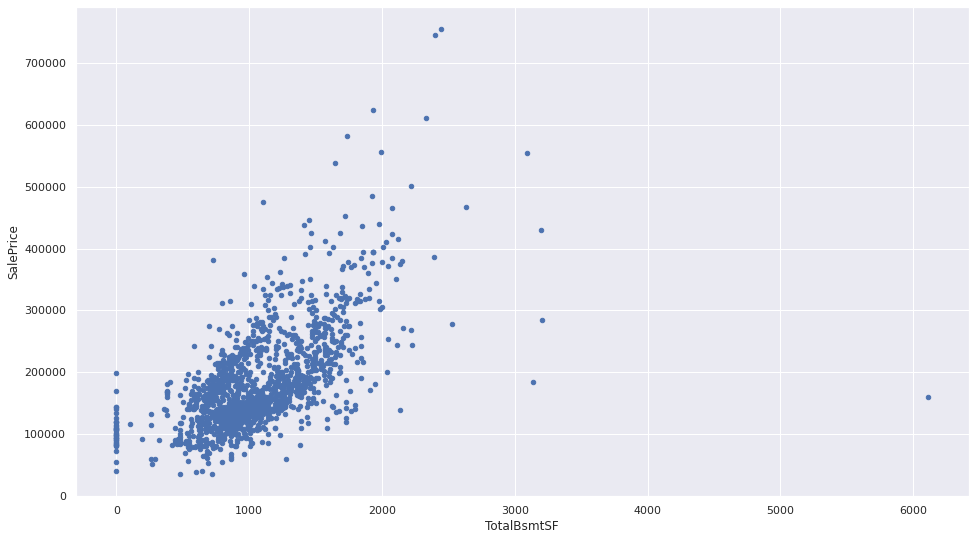

In [88]:
create_plot('TotalBsmtSF')

#### Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

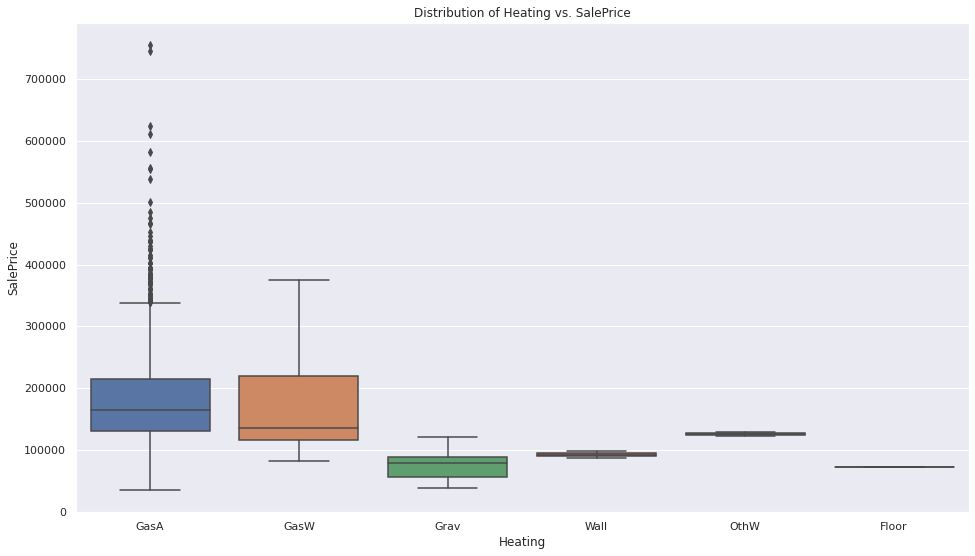

In [89]:
create_plot('Heating', 'boxplot')

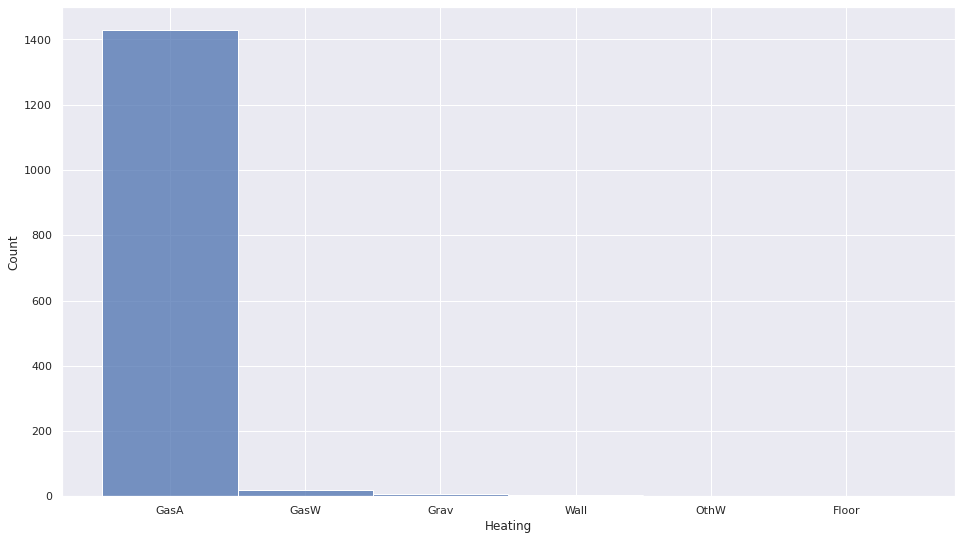

In [90]:
sns.histplot(data=df_train, x="Heating")

#### HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

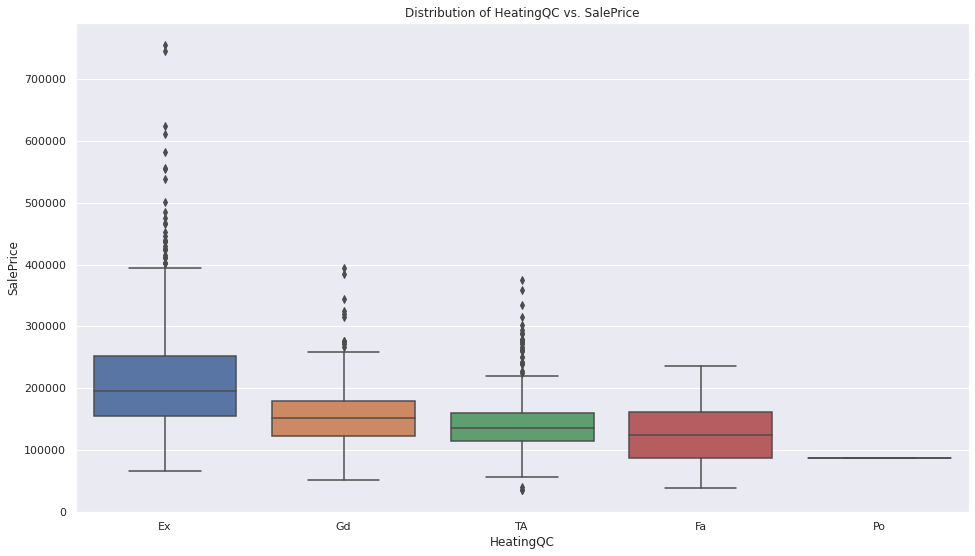

In [91]:
create_plot('HeatingQC', 'boxplot')

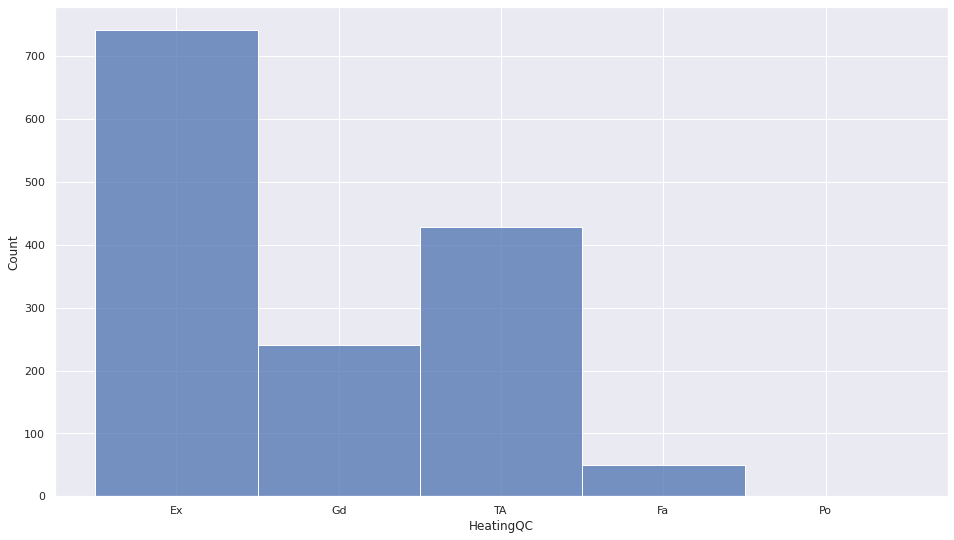

In [92]:
sns.histplot(data=df_train, x="HeatingQC")

#### CentralAir: Central air conditioning

       N	No
       Y	Yes

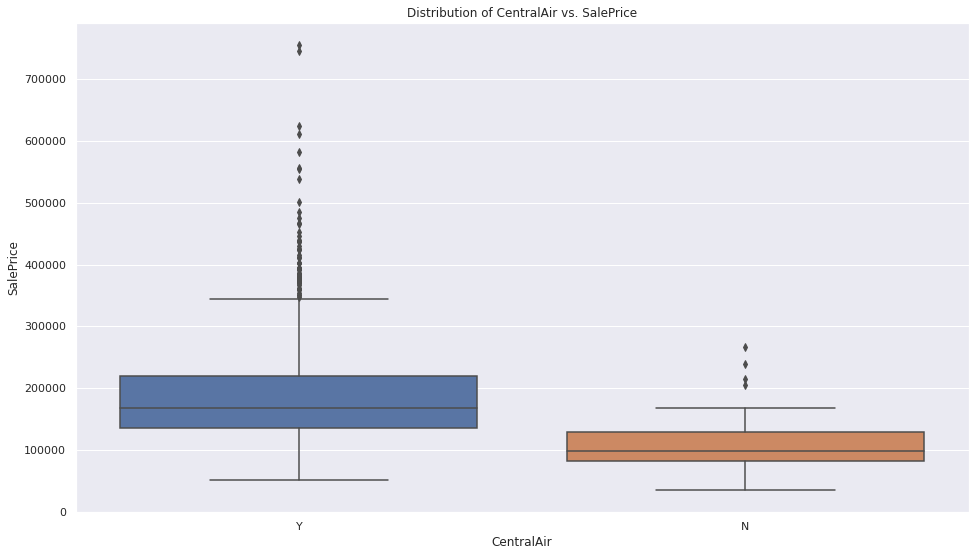

In [93]:
create_plot('CentralAir', 'boxplot')

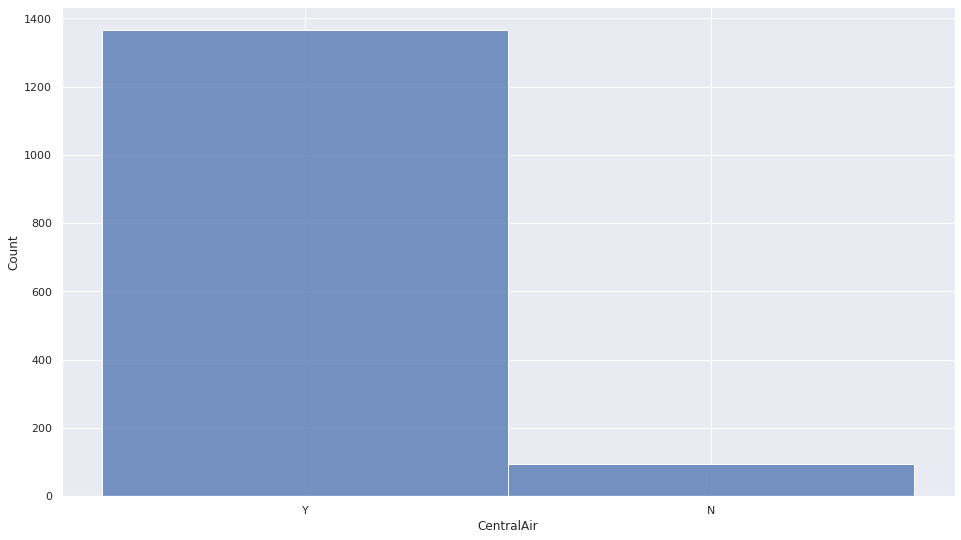

In [94]:
sns.histplot(data=df_train, x="CentralAir")

#### Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

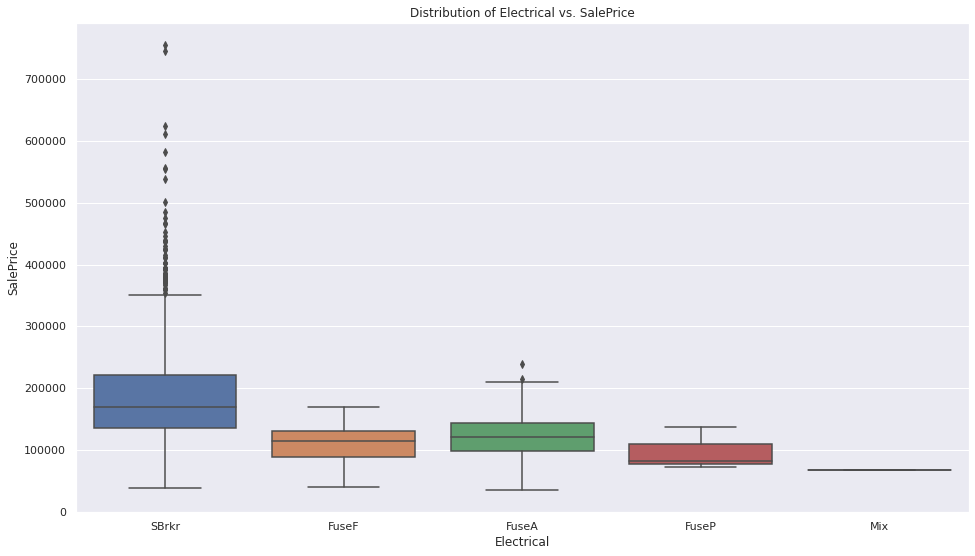

In [95]:
create_plot('Electrical', 'boxplot')

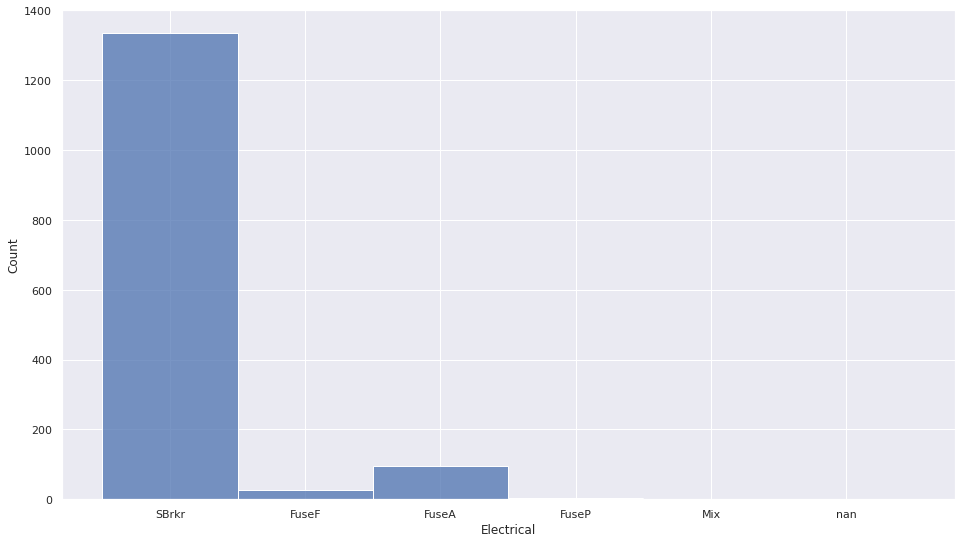

In [96]:
df_train.Electrical = df_train.Electrical.astype(str)
sns.histplot(data=df_train, x="Electrical")

#### 1stFlrSF: First Floor square feet

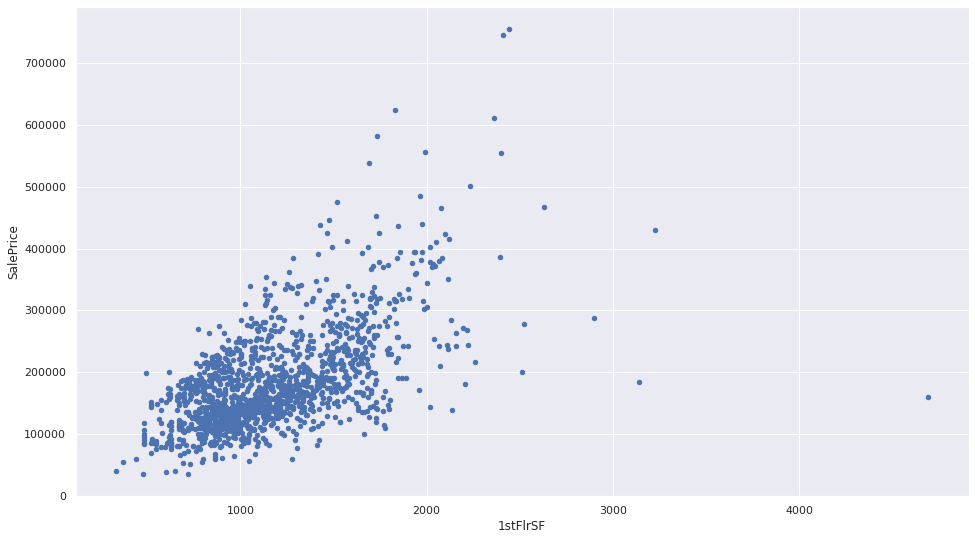

In [97]:
create_plot('1stFlrSF')

#### 2ndFlrSF: Second floor square feet

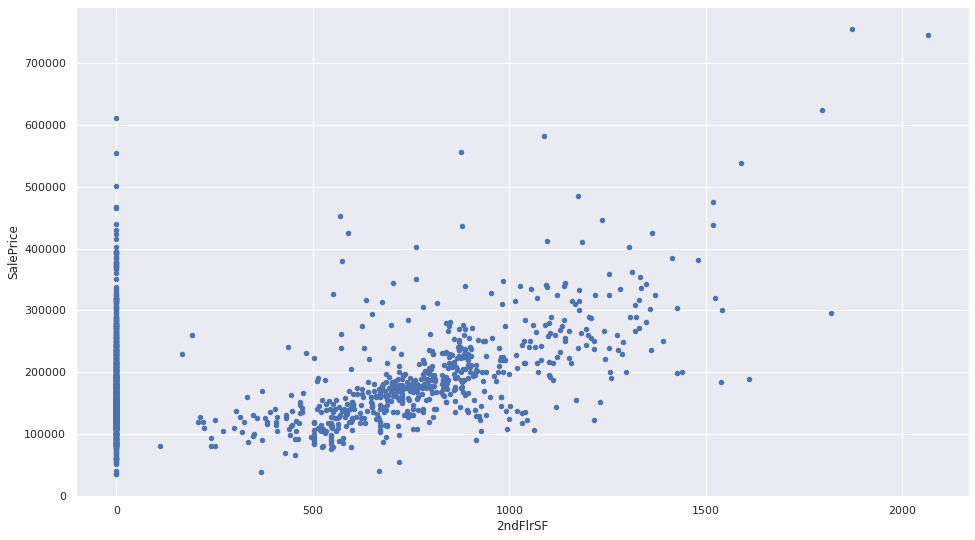

In [98]:
create_plot('2ndFlrSF')

#### LowQualFinSF: Low quality finished square feet (all floors)

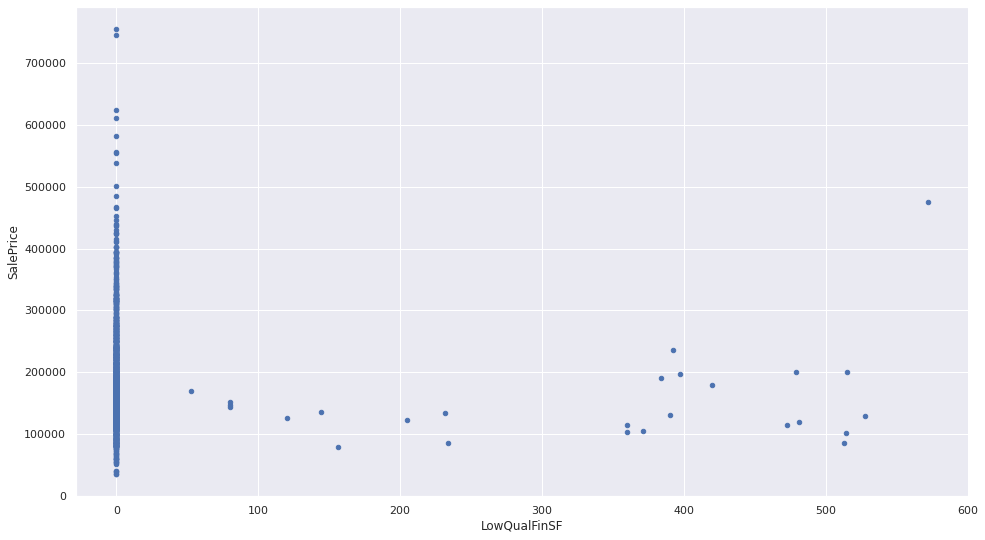

In [99]:
create_plot('LowQualFinSF')

#### GrLivArea: Above grade (ground) living area square feet

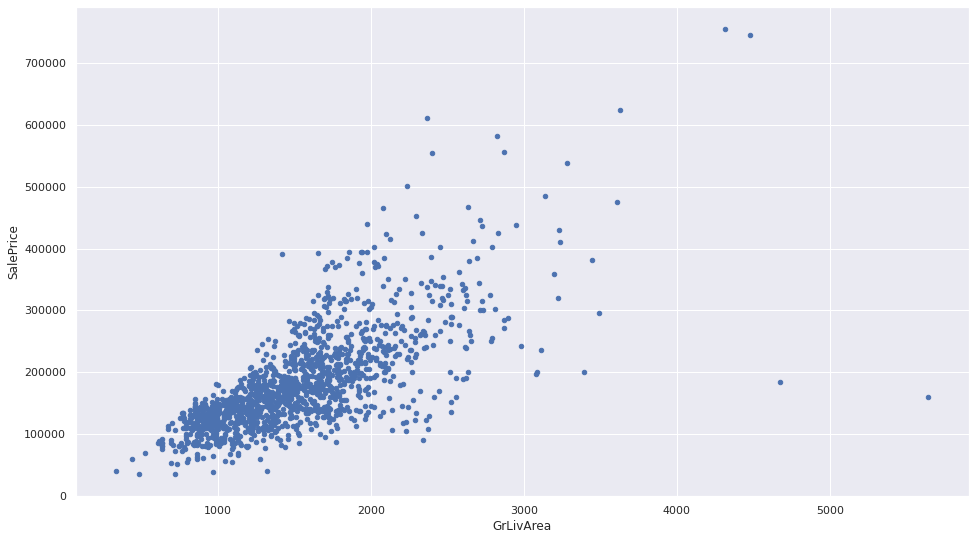

In [100]:
create_plot('GrLivArea')

#### BsmtFullBath: Basement full bathrooms

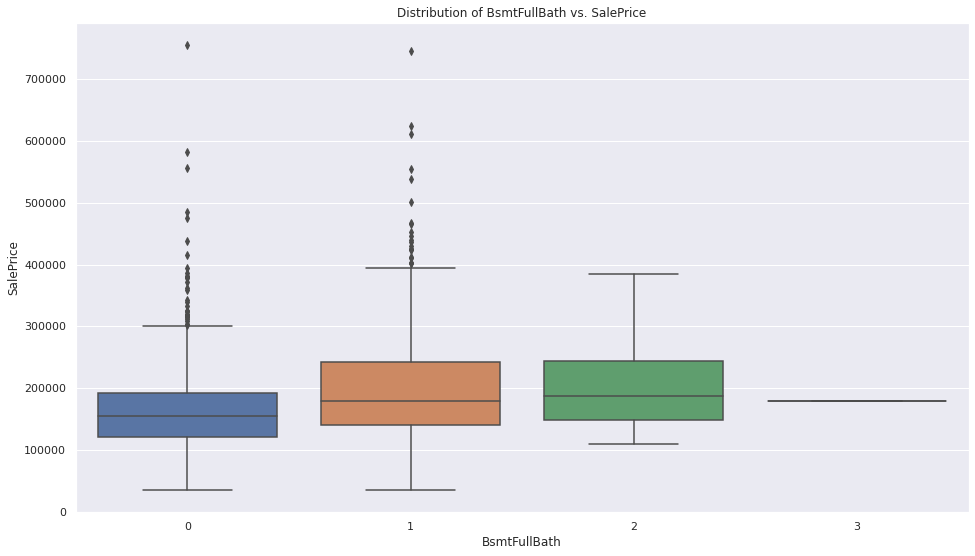

In [101]:
create_plot('BsmtFullBath', 'boxplot')

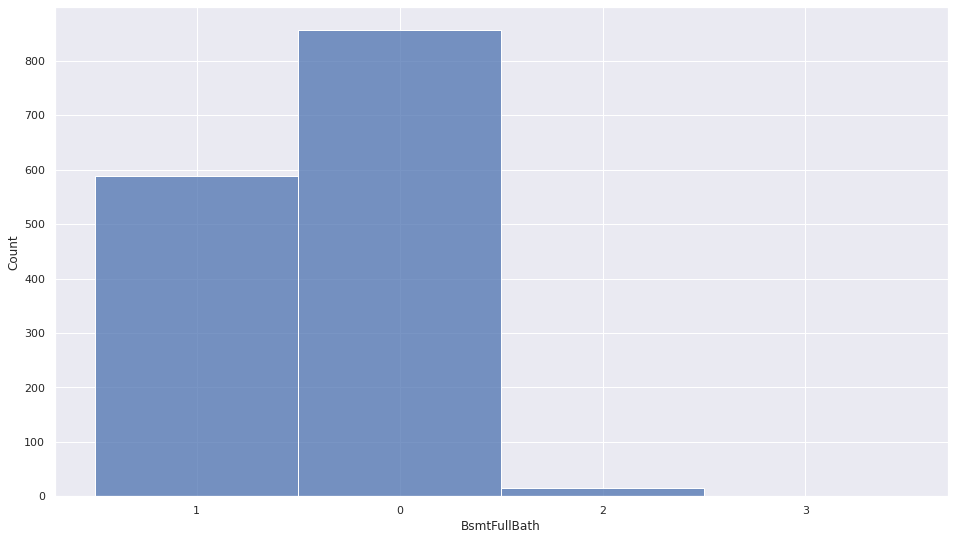

In [102]:
df_train.BsmtFullBath = df_train.BsmtFullBath.astype(str)
sns.histplot(data=df_train, x="BsmtFullBath")

#### BsmtHalfBath: Basement half bathrooms

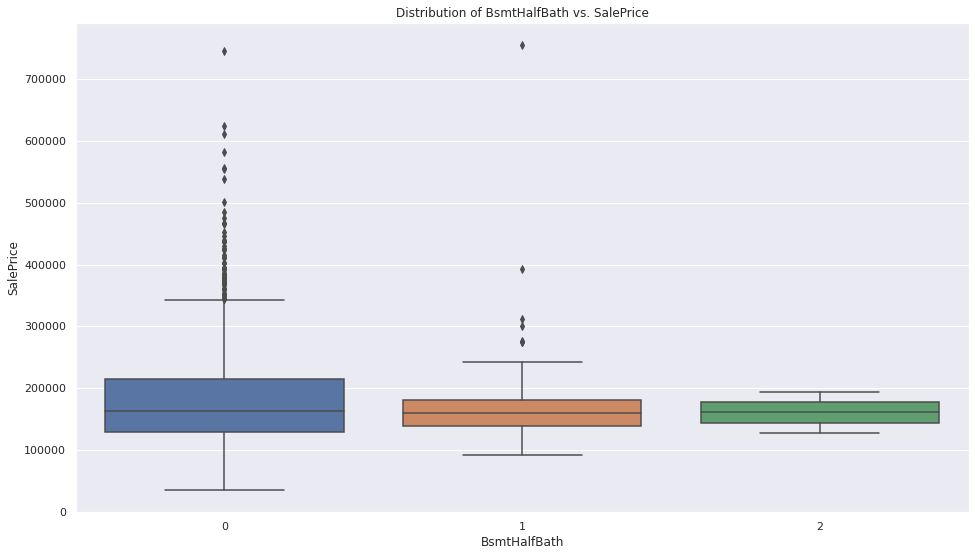

In [103]:
create_plot('BsmtHalfBath', 'boxplot')

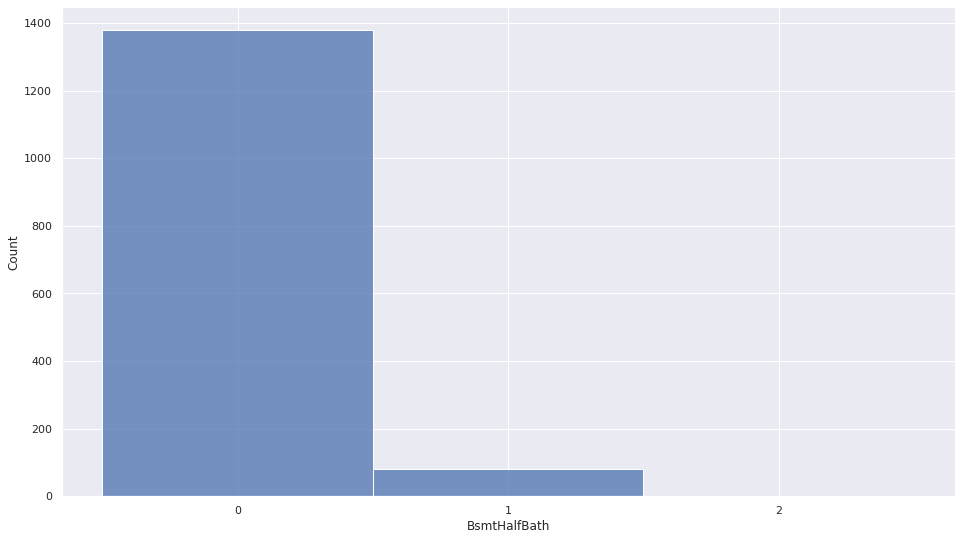

In [104]:
df_train.BsmtHalfBath = df_train.BsmtHalfBath.astype(str)
sns.histplot(data=df_train, x="BsmtHalfBath")

#### FullBath: Full bathrooms above grade

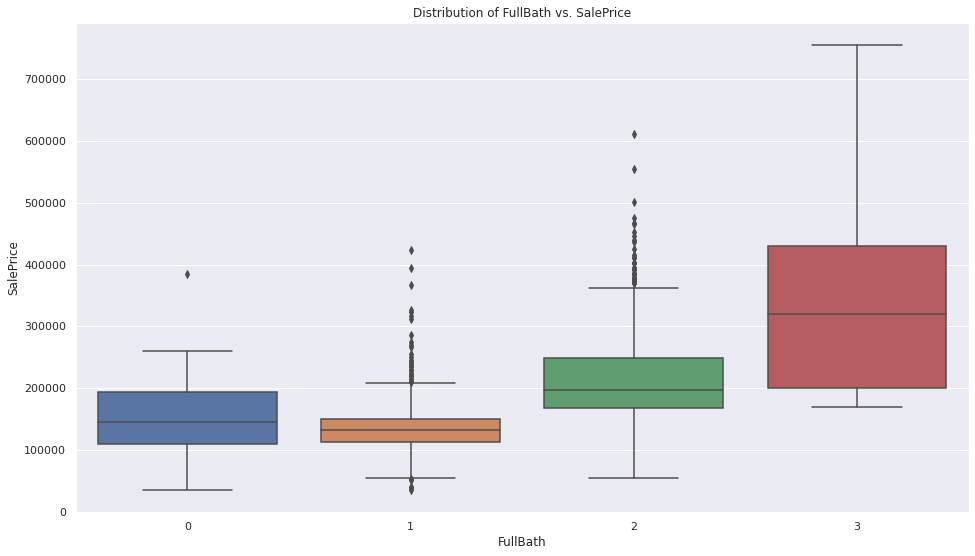

In [105]:
create_plot('FullBath', 'boxplot')

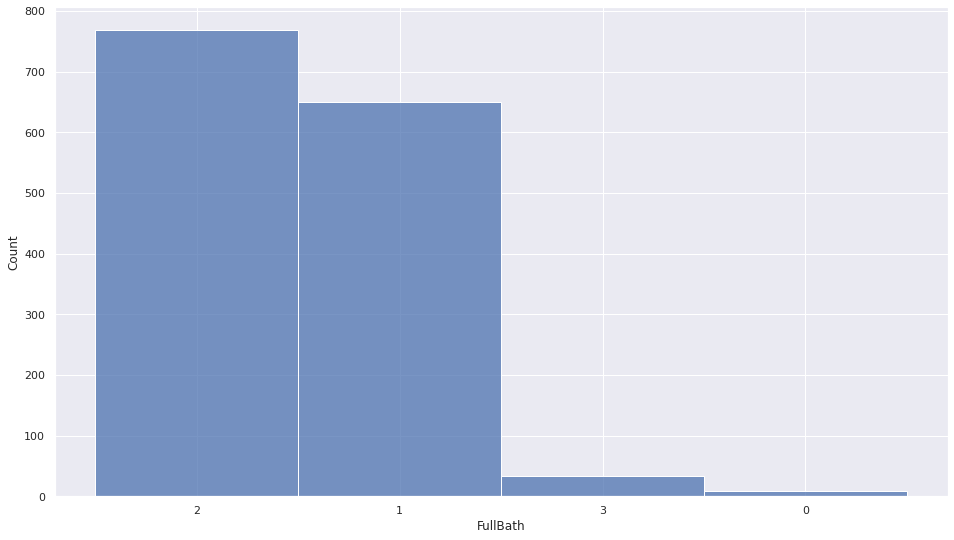

In [106]:
df_train.FullBath = df_train.FullBath.astype(str)
sns.histplot(data=df_train, x="FullBath")

#### HalfBath: Half baths above grade

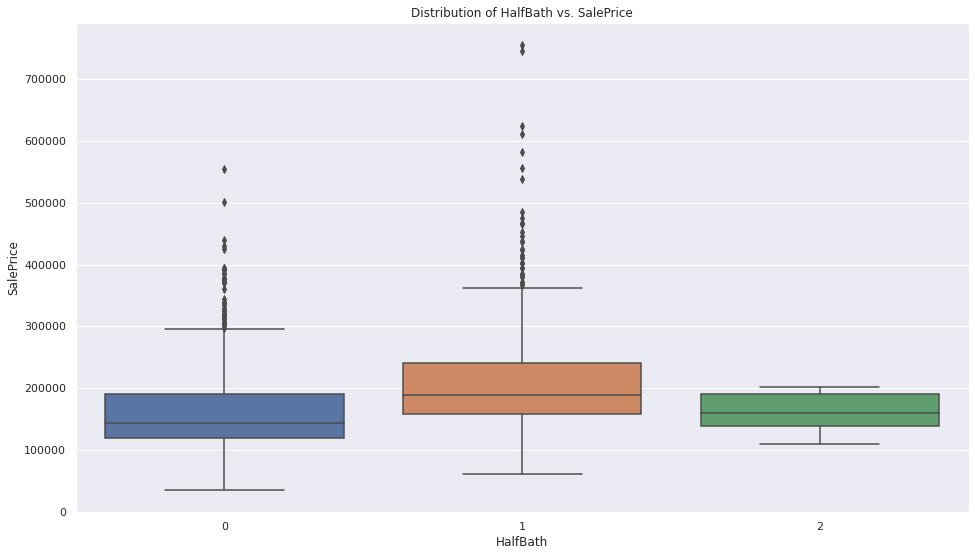

In [107]:
create_plot('HalfBath', 'boxplot')

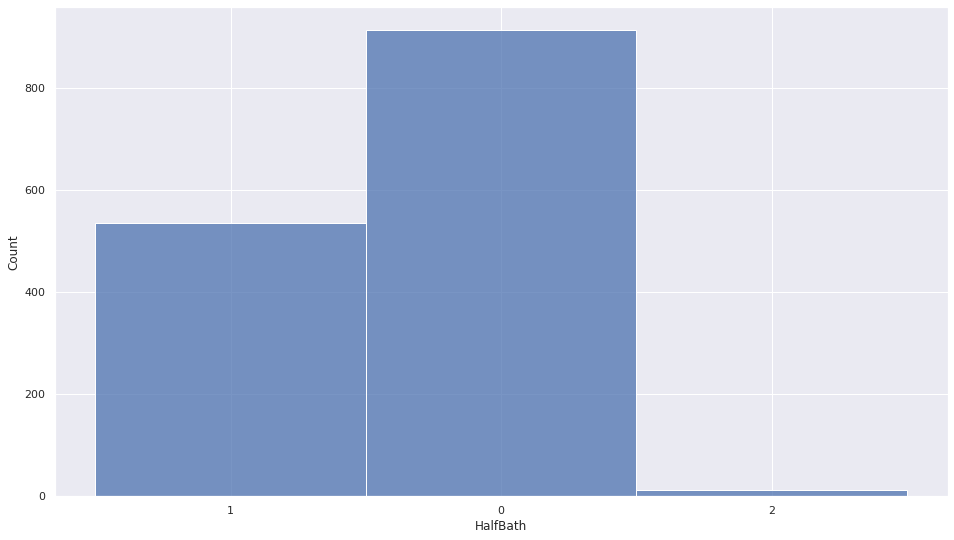

In [108]:
df_train.HalfBath = df_train.HalfBath.astype(str)
sns.histplot(data=df_train, x="HalfBath")

#### BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

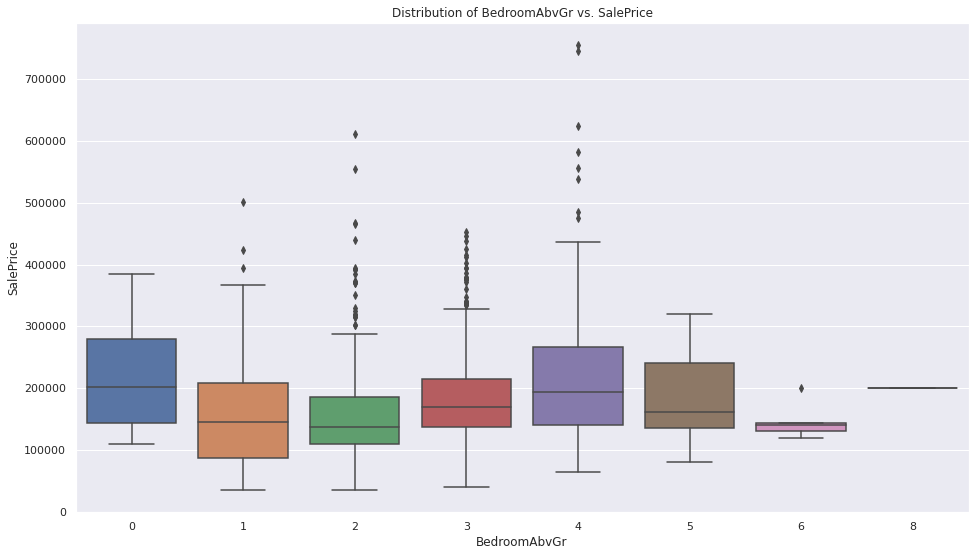

In [109]:
create_plot('BedroomAbvGr', 'boxplot')

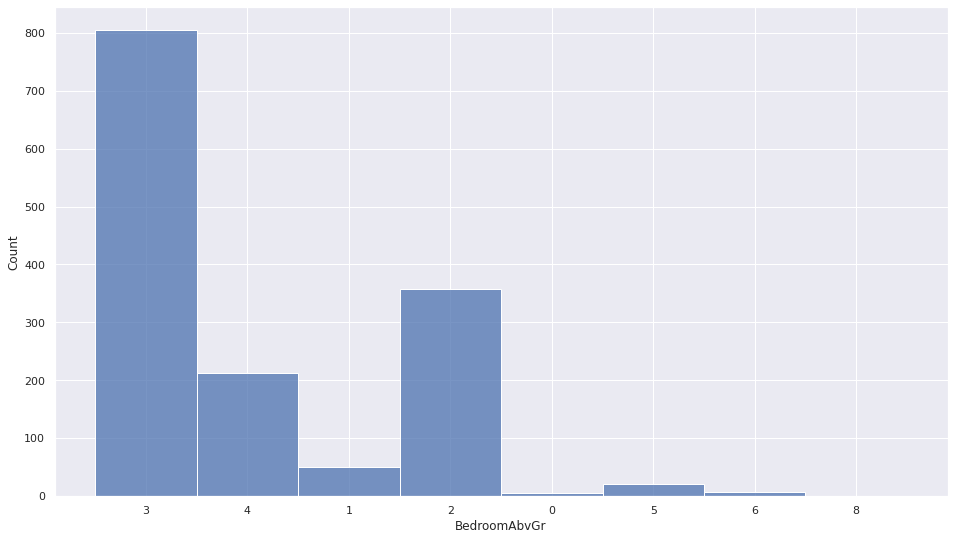

In [110]:
df_train.BedroomAbvGr = df_train.BedroomAbvGr.astype(str)
sns.histplot(data=df_train, x="BedroomAbvGr")

#### KitchenAbvGr: Kitchens above grade

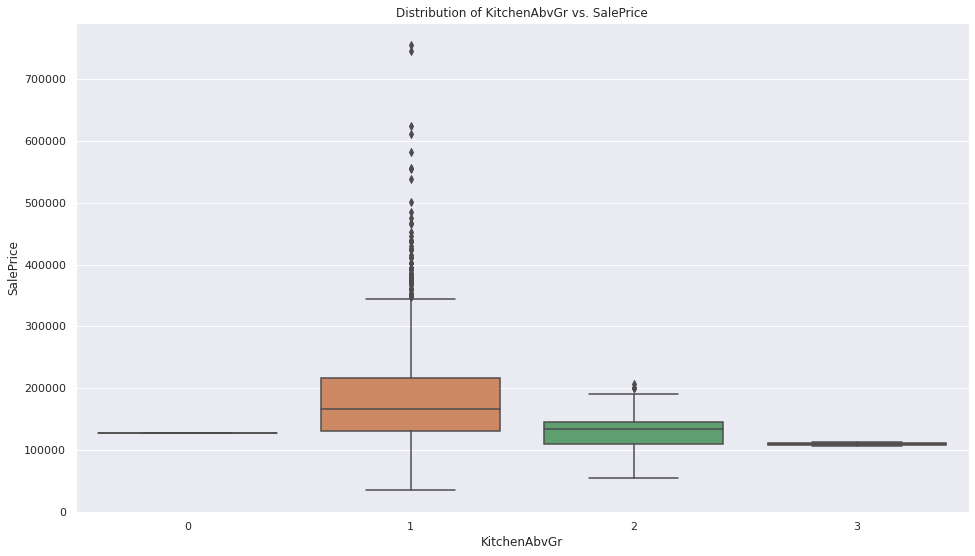

In [111]:
create_plot('KitchenAbvGr', 'boxplot')

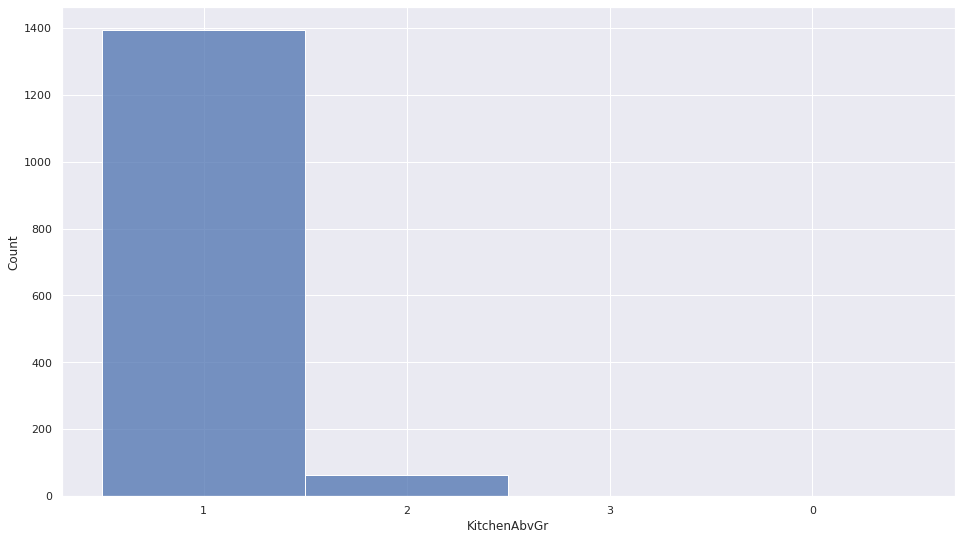

In [112]:
df_train.KitchenAbvGr = df_train.KitchenAbvGr.astype(str)
sns.histplot(data=df_train, x="KitchenAbvGr")

#### KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

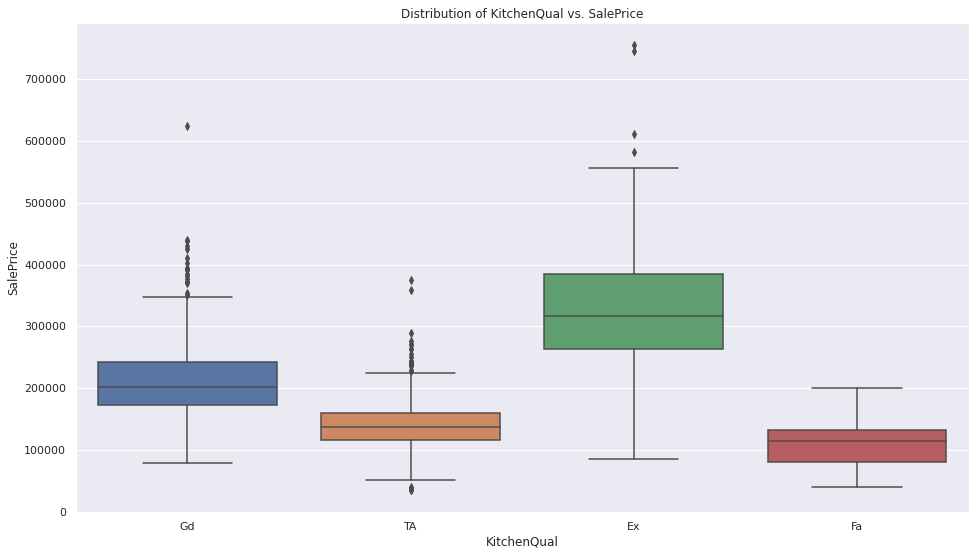

In [113]:
create_plot('KitchenQual', 'boxplot')

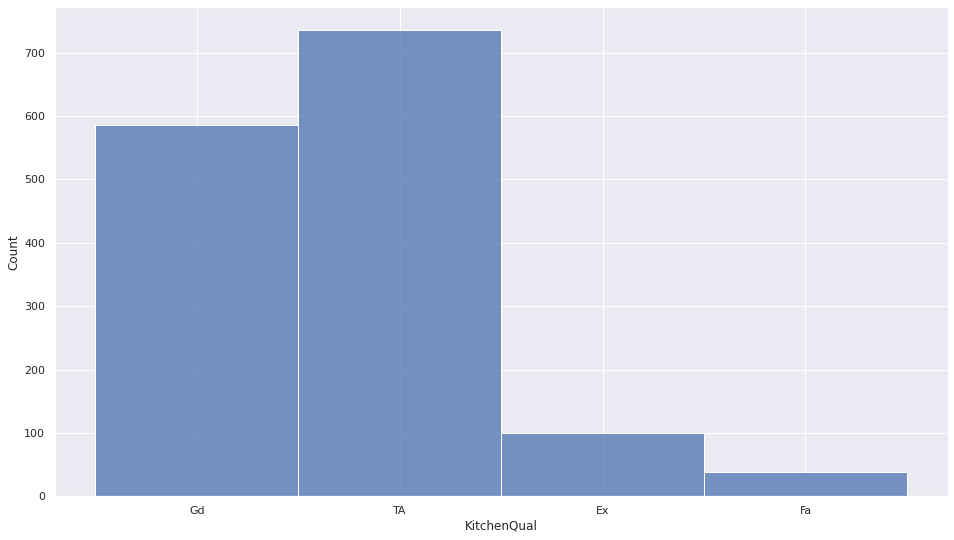

In [114]:
sns.histplot(data=df_train, x="KitchenQual")

#### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

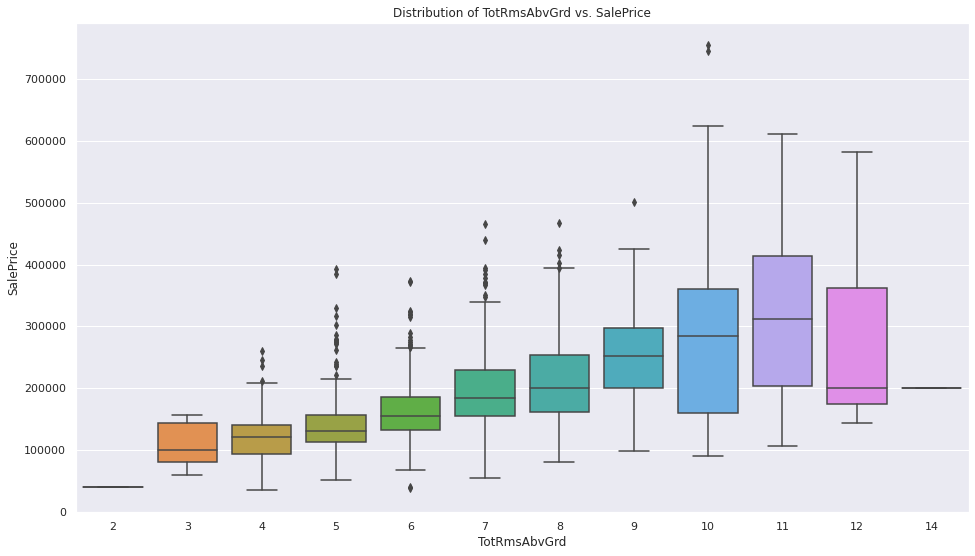

In [115]:
create_plot('TotRmsAbvGrd', 'boxplot')

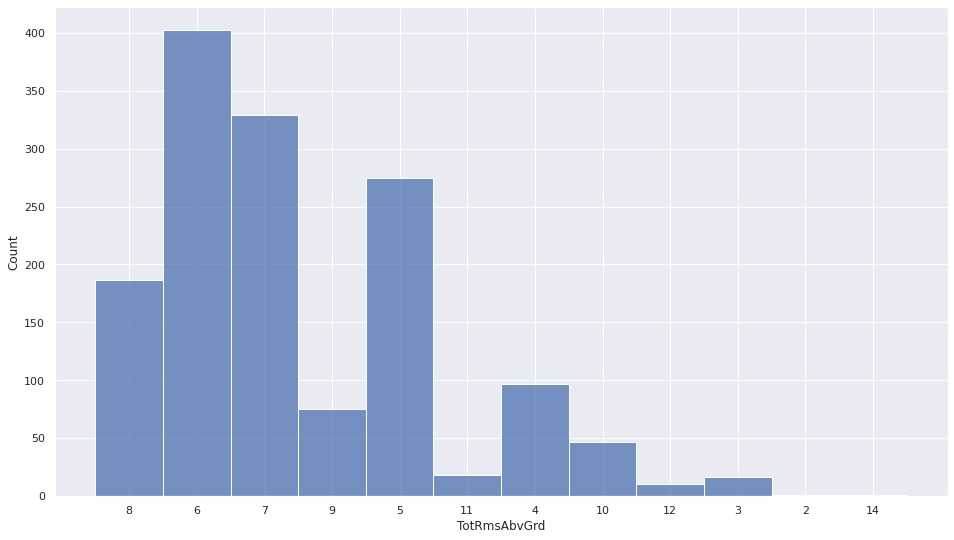

In [116]:
df_train.TotRmsAbvGrd = df_train.TotRmsAbvGrd.astype(str)
sns.histplot(data=df_train, x="TotRmsAbvGrd")

#### Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

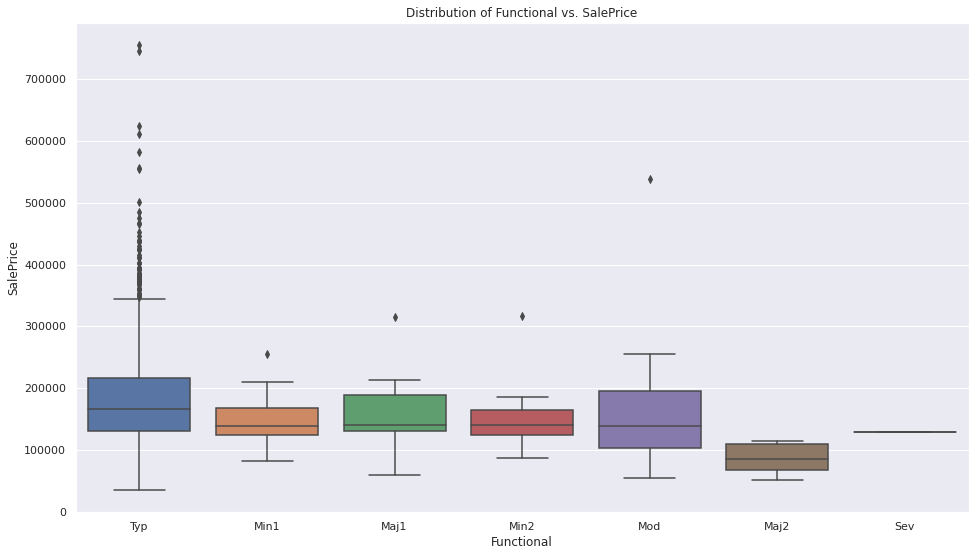

In [117]:
create_plot('Functional', 'boxplot')

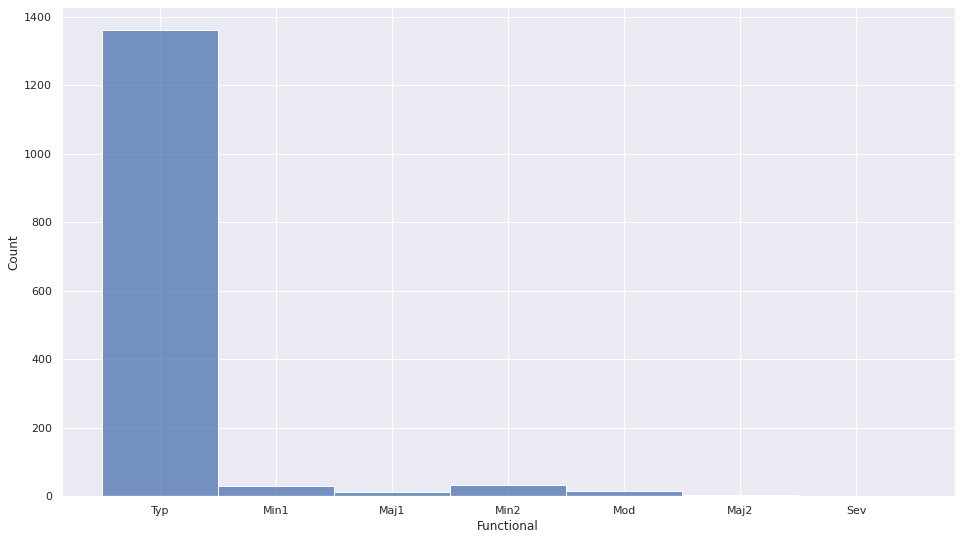

In [118]:
sns.histplot(data=df_train, x="Functional")

#### Fireplaces: Number of fireplaces

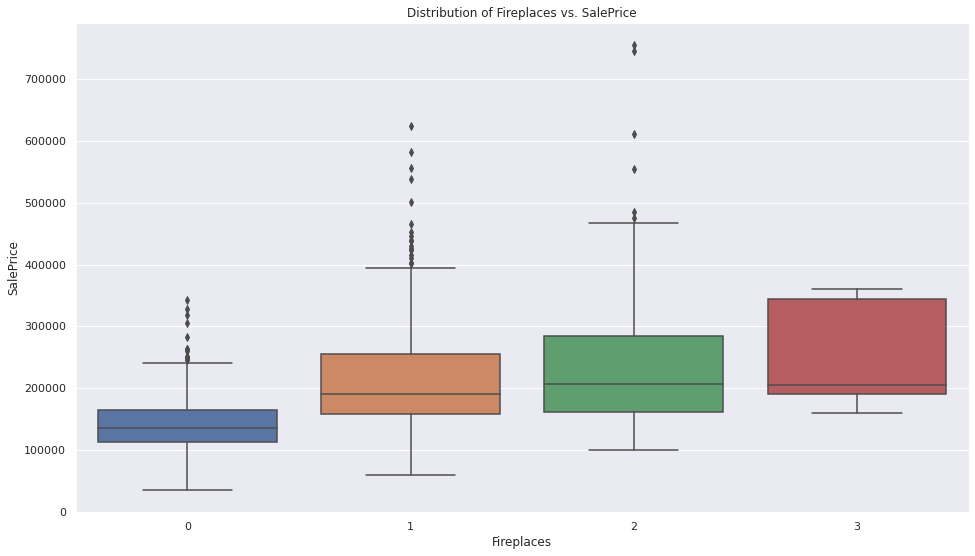

In [119]:
create_plot('Fireplaces', 'boxplot')

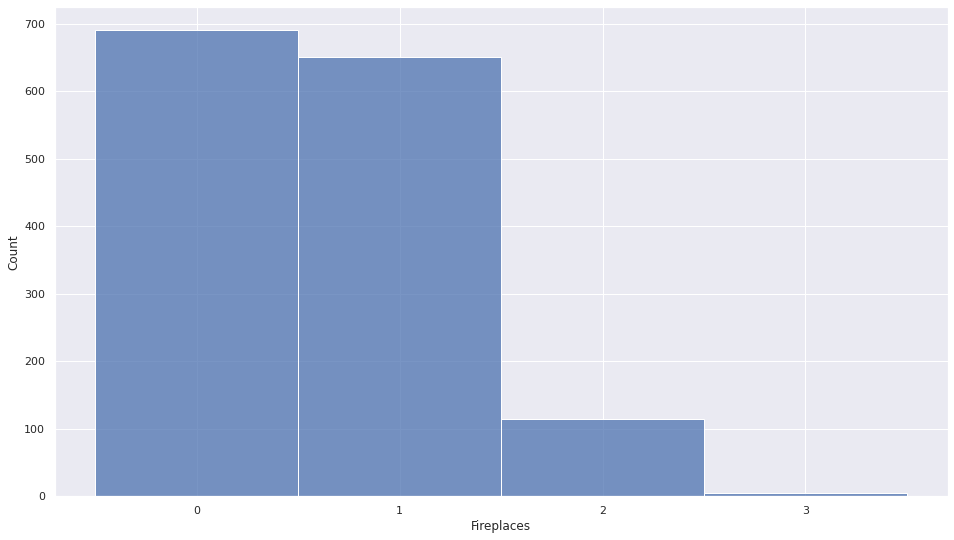

In [120]:
df_train.Fireplaces = df_train.Fireplaces.astype(str)
sns.histplot(data=df_train, x="Fireplaces")

#### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

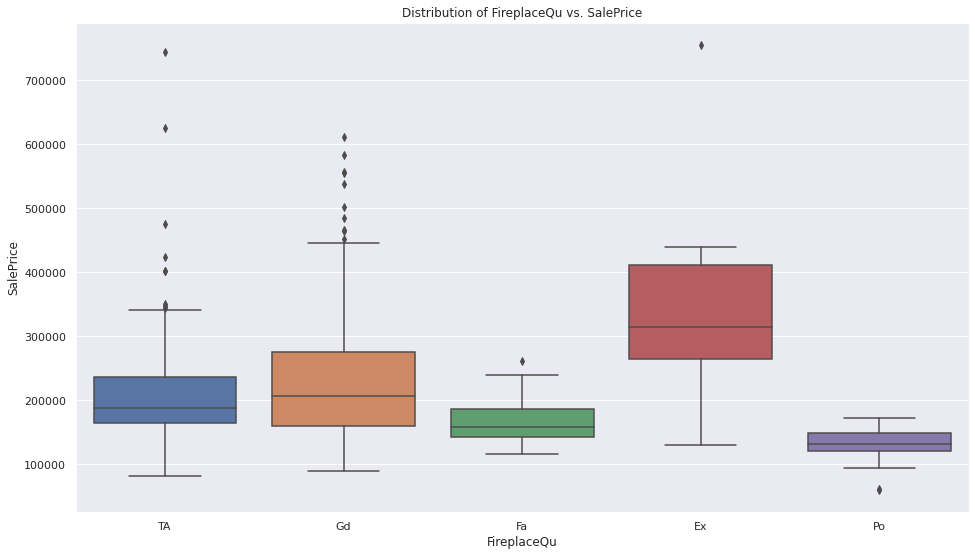

In [121]:
create_plot('FireplaceQu', 'boxplot')

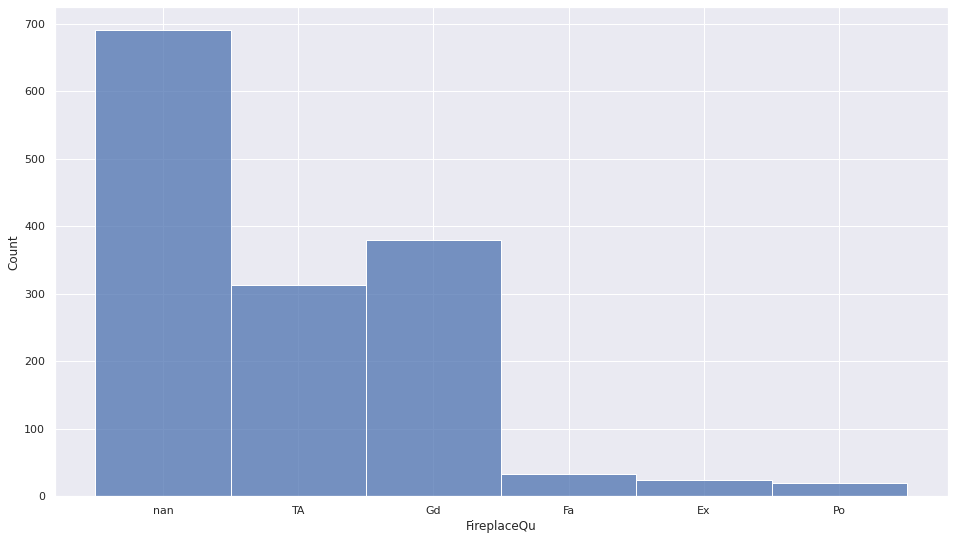

In [122]:
df_train.FireplaceQu = df_train.FireplaceQu.astype(str)
sns.histplot(data=df_train, x="FireplaceQu")

#### GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

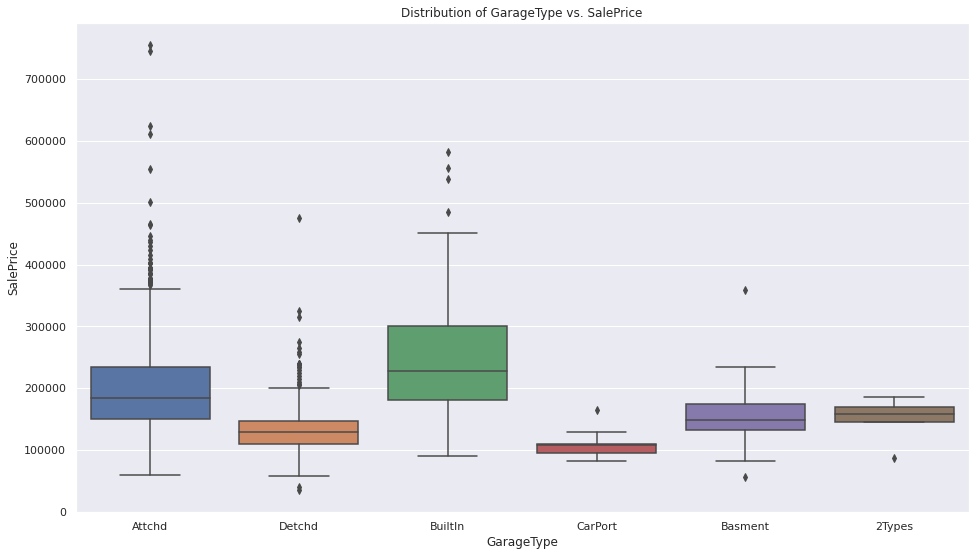

In [123]:
create_plot('GarageType', 'boxplot')

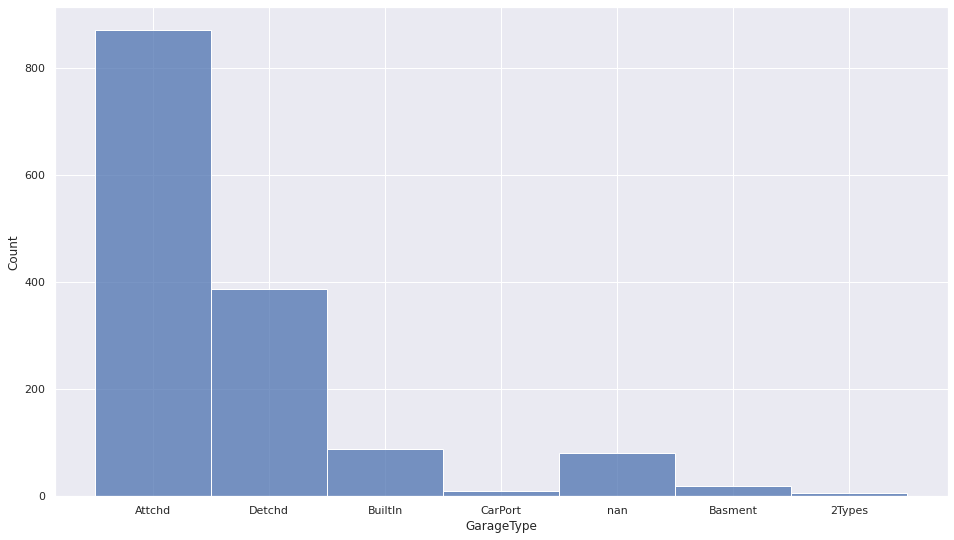

In [124]:
df_train.GarageType = df_train.GarageType.astype(str)
sns.histplot(data=df_train, x="GarageType")

#### GarageYrBlt: Year garage was built

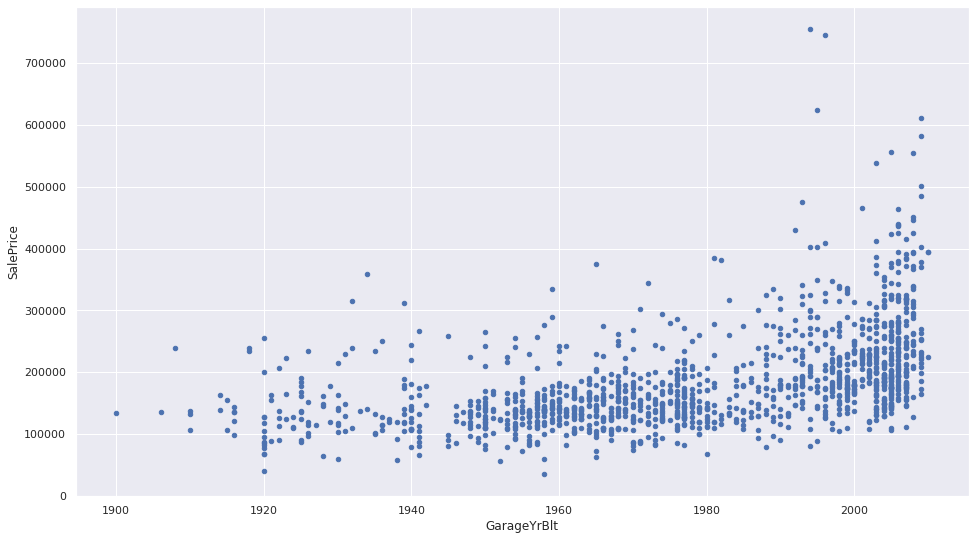

In [125]:
create_plot('GarageYrBlt')

#### GarageFinish: Interior finish of the garage 

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

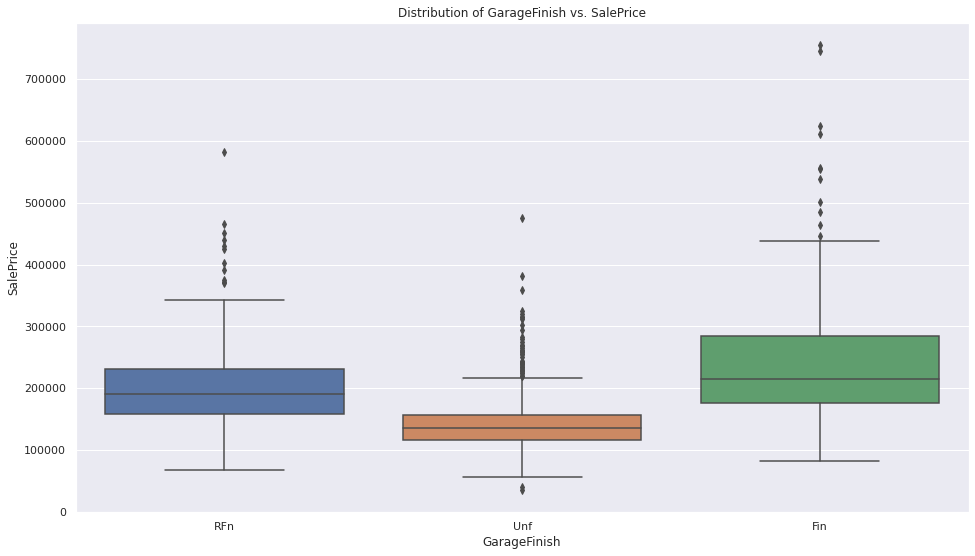

In [126]:
create_plot('GarageFinish', 'boxplot')

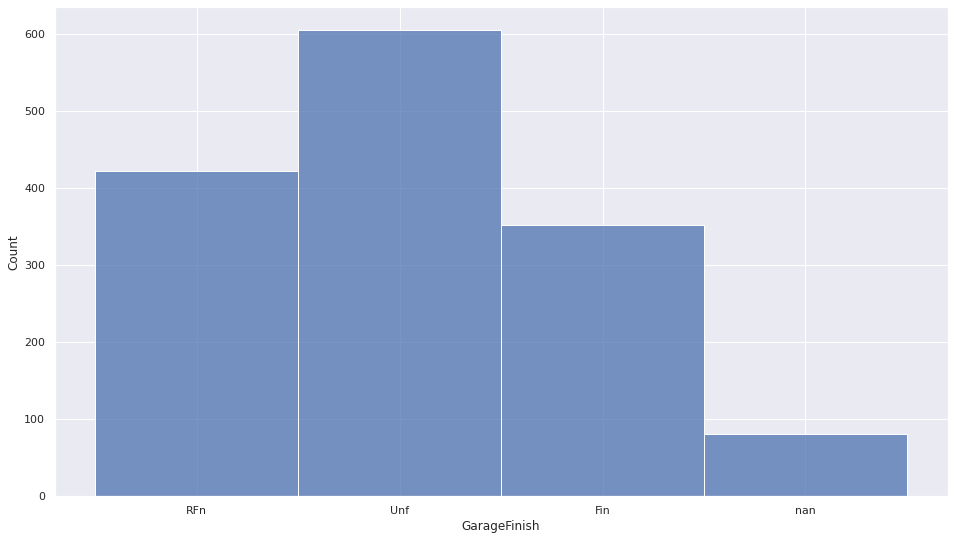

In [127]:
df_train.GarageFinish = df_train.GarageFinish.astype(str)
sns.histplot(data=df_train, x="GarageFinish")

#### GarageCars: Size of garage in car capacity 

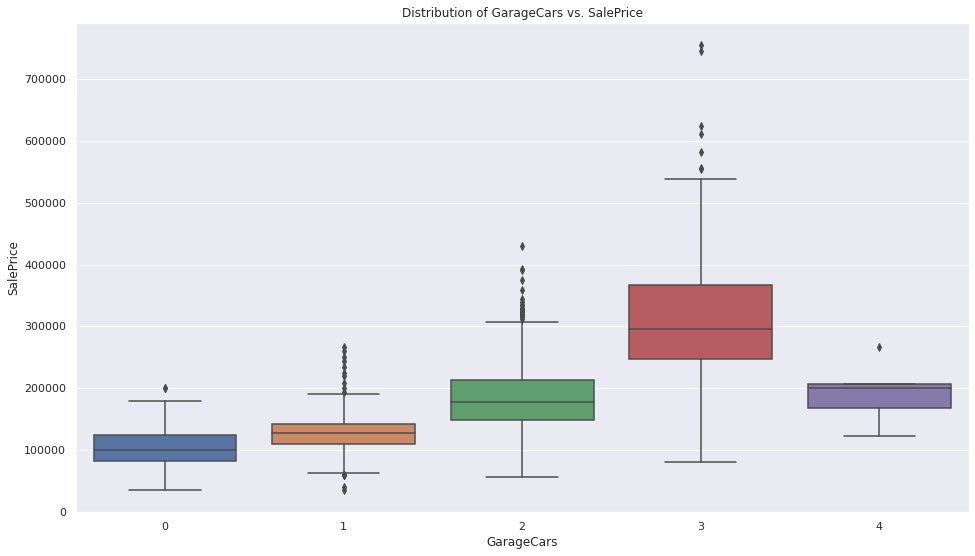

In [128]:
create_plot('GarageCars', 'boxplot')

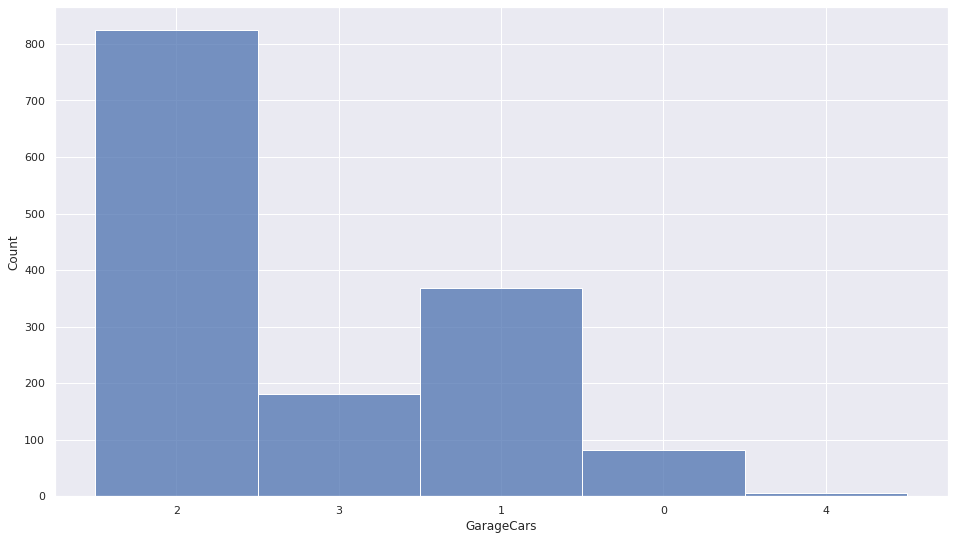

In [129]:
df_train.GarageCars = df_train.GarageCars.astype(str)
sns.histplot(data=df_train, x="GarageCars")

#### GarageArea: Size of garage in square feet 

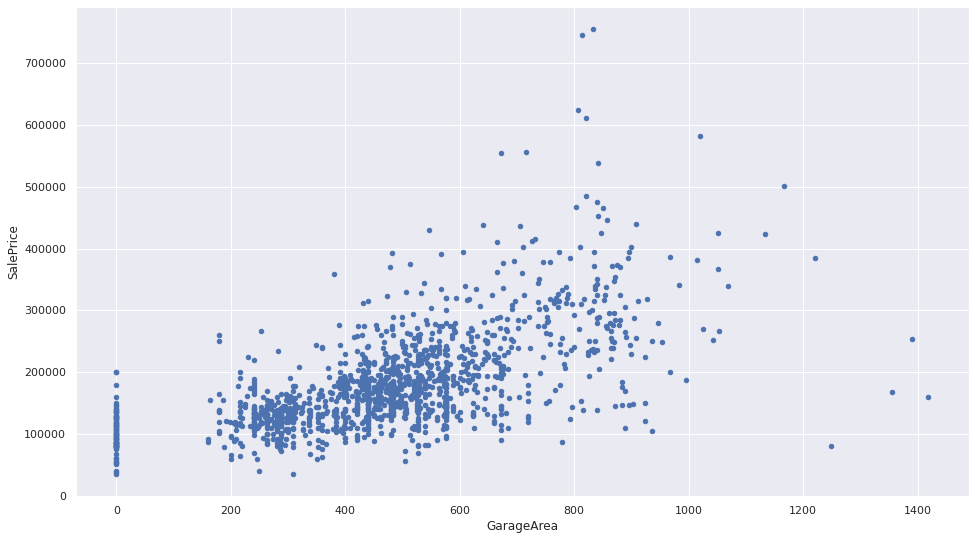

In [130]:
create_plot('GarageArea')

#### GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

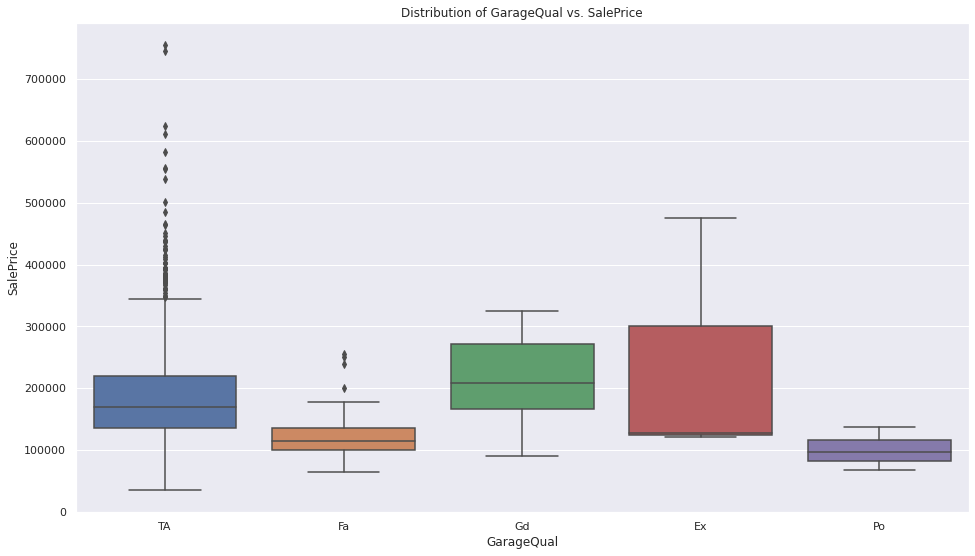

In [131]:
create_plot('GarageQual', 'boxplot')

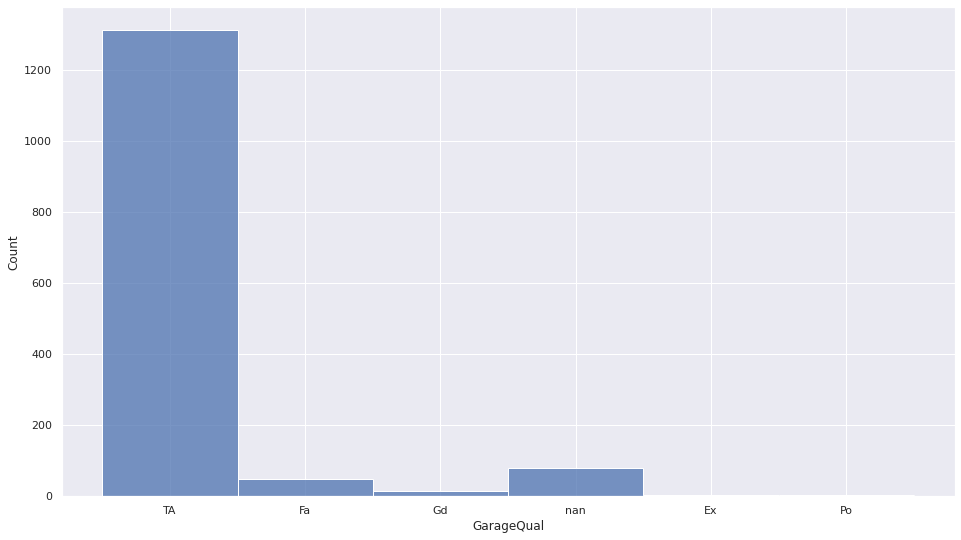

In [132]:
df_train.GarageQual = df_train.GarageQual.astype(str)
sns.histplot(data=df_train, x="GarageQual")

#### GarageCond: Garage condition 

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

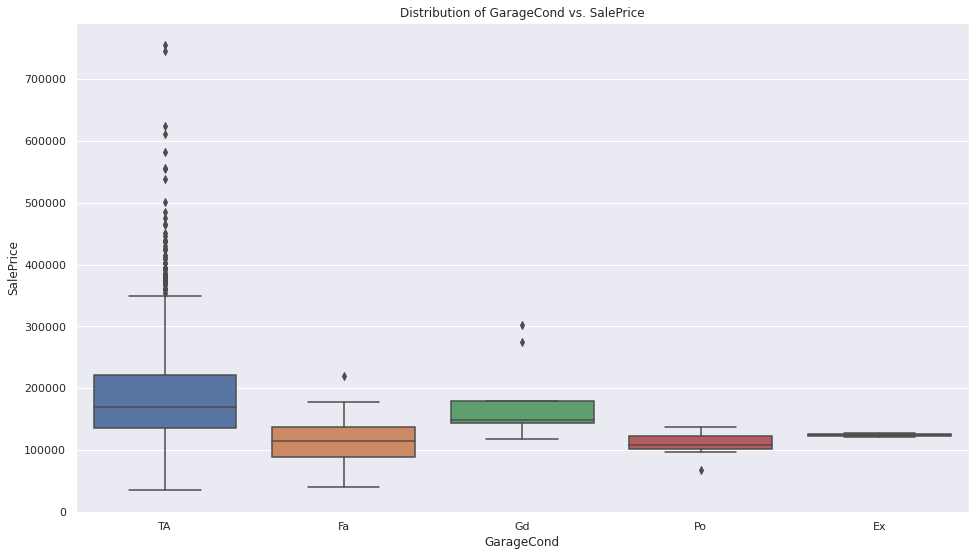

In [133]:
create_plot('GarageCond', 'boxplot')

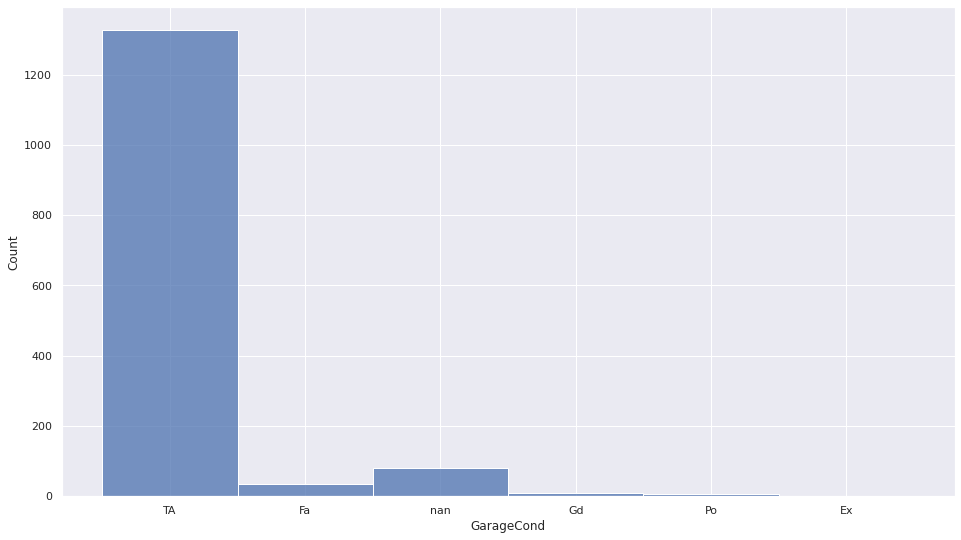

In [134]:
df_train.GarageCond = df_train.GarageCond.astype(str)
sns.histplot(data=df_train, x="GarageCond")

#### PavedDrive: Paved driveway 

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

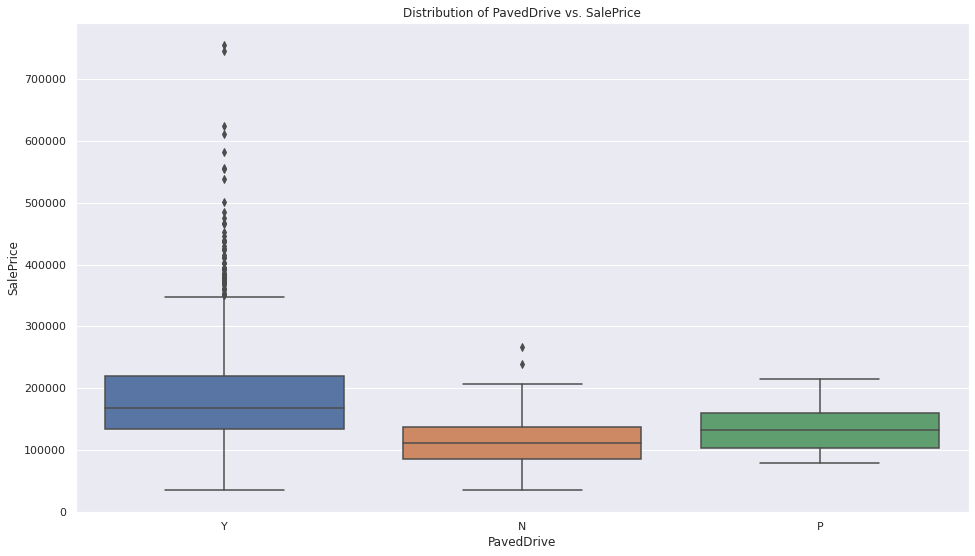

In [135]:
create_plot('PavedDrive', 'boxplot')

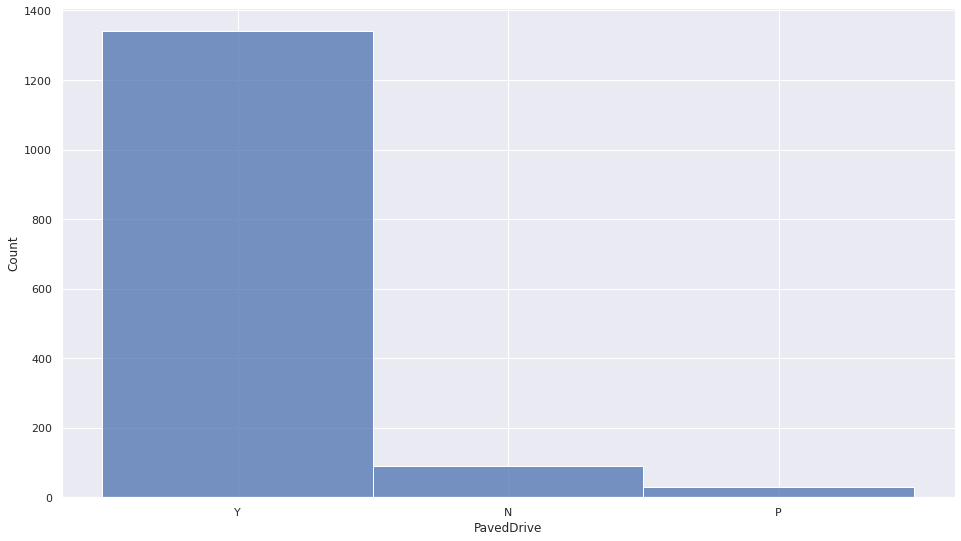

In [136]:
sns.histplot(data=df_train, x="PavedDrive")

#### WoodDeckSF: Wood deck area in square feet

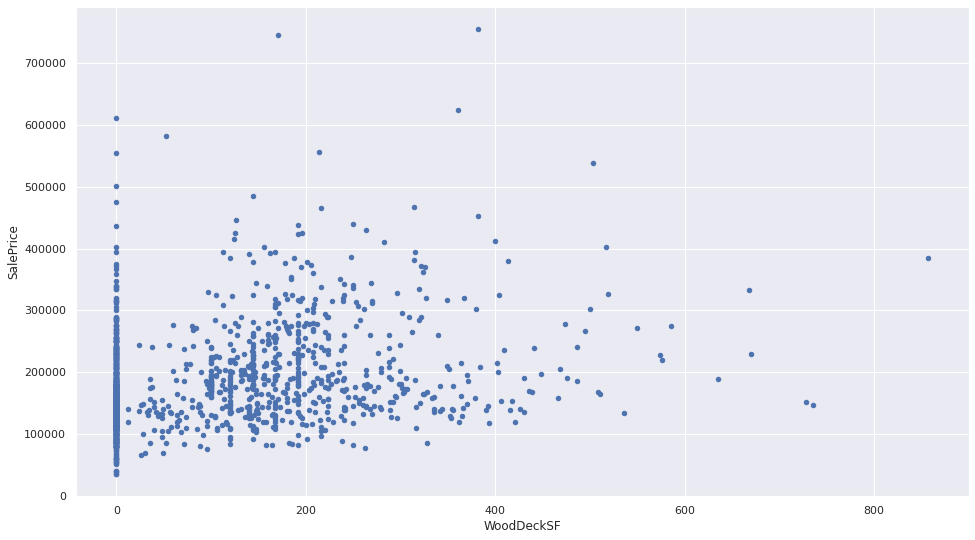

In [137]:
create_plot('WoodDeckSF')

#### OpenPorchSF: Open porch area in square feet

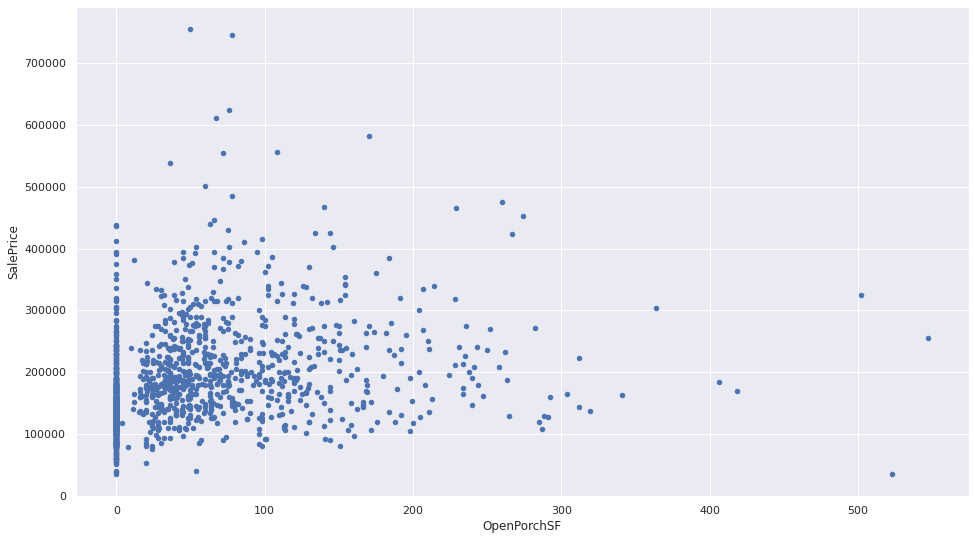

In [138]:
create_plot('OpenPorchSF')

#### EnclosedPorch: Enclosed porch area in square feet

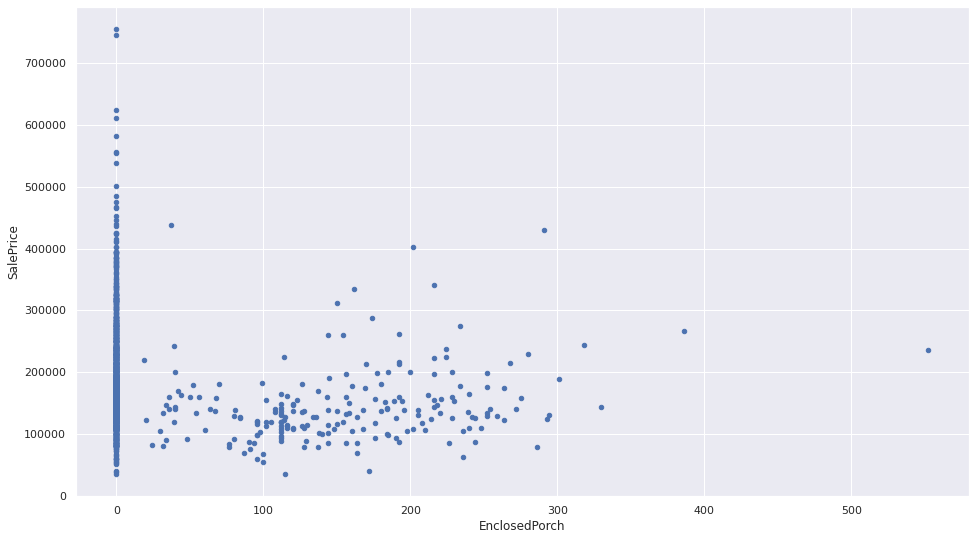

In [139]:
create_plot('EnclosedPorch')

#### 3SsnPorch: Three season porch area in square feet

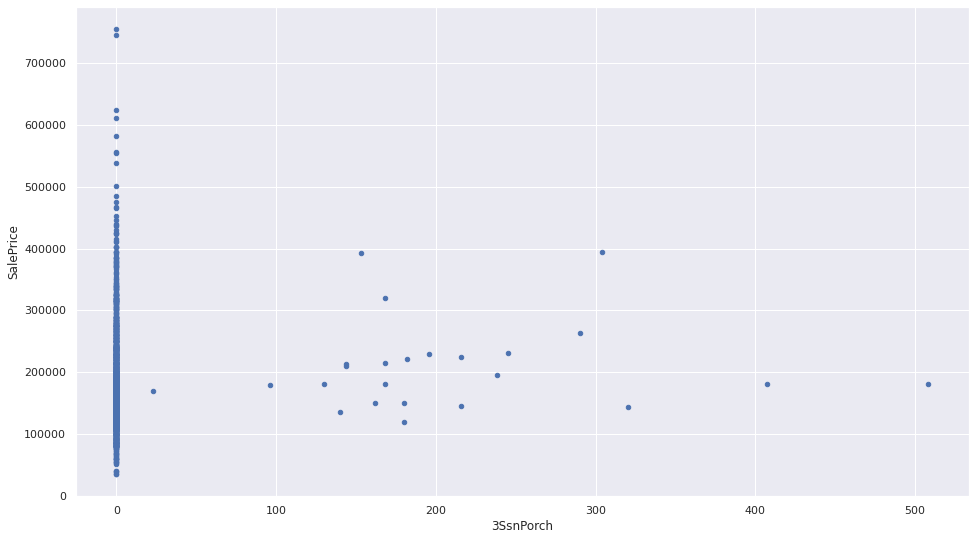

In [140]:
create_plot('3SsnPorch')

#### ScreenPorch: Screen porch area in square feet

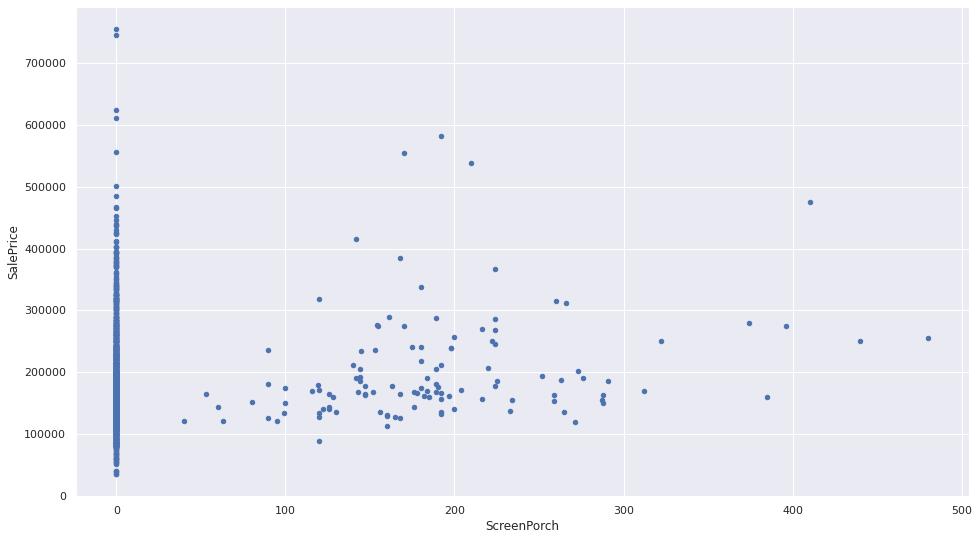

In [141]:
create_plot('ScreenPorch')

#### PoolArea: Pool area in square feet

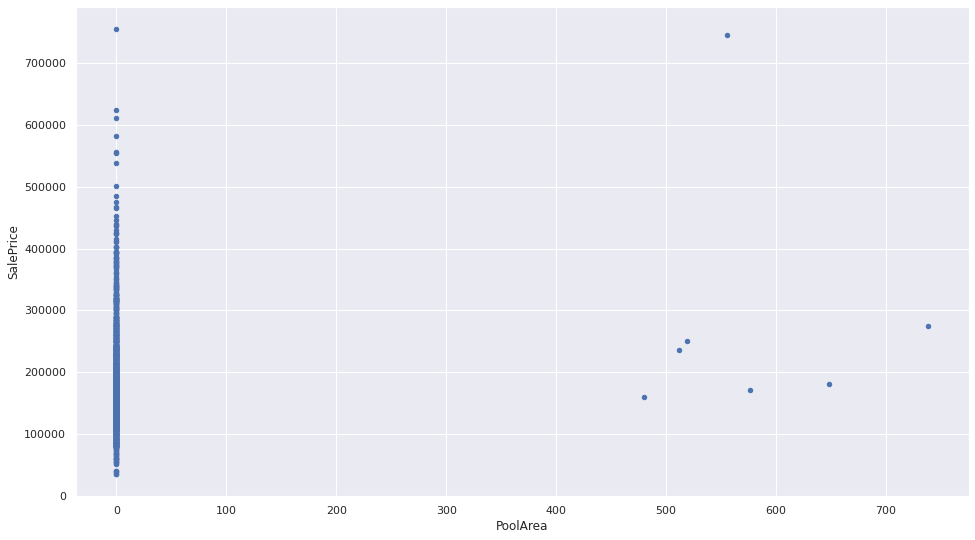

In [142]:
create_plot('PoolArea')

#### PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

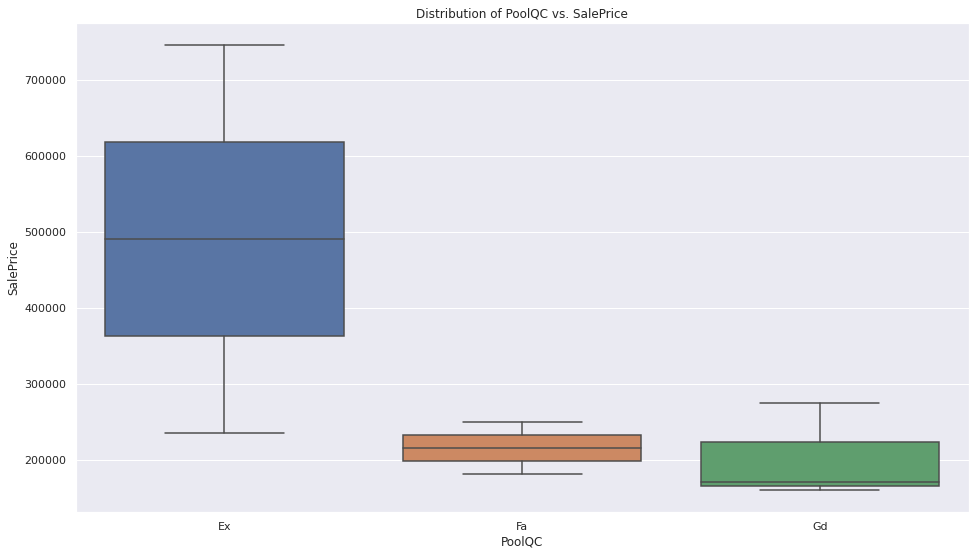

In [143]:
create_plot('PoolQC', 'boxplot')

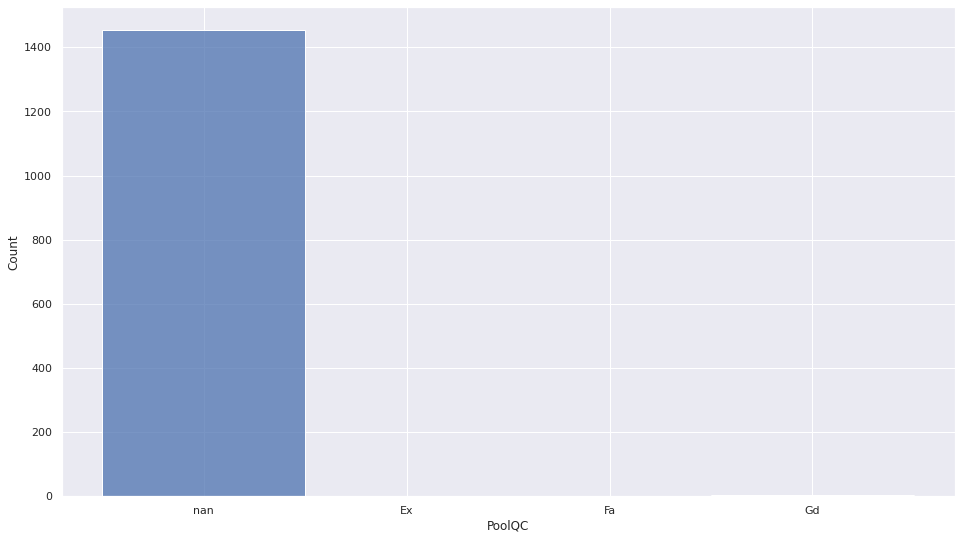

In [144]:
df_train.PoolQC = df_train.PoolQC.astype(str)
sns.histplot(data=df_train, x="PoolQC")

#### Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

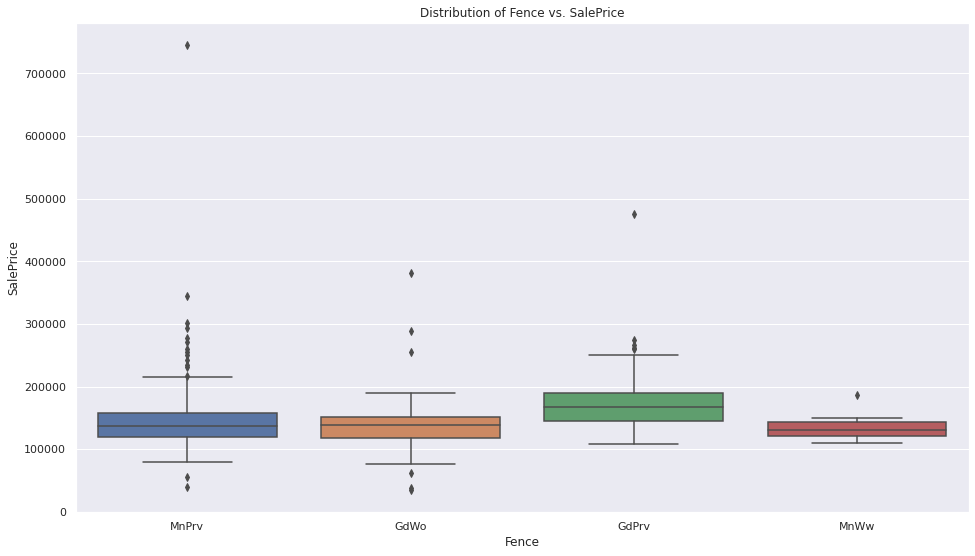

In [145]:
create_plot('Fence', 'boxplot')

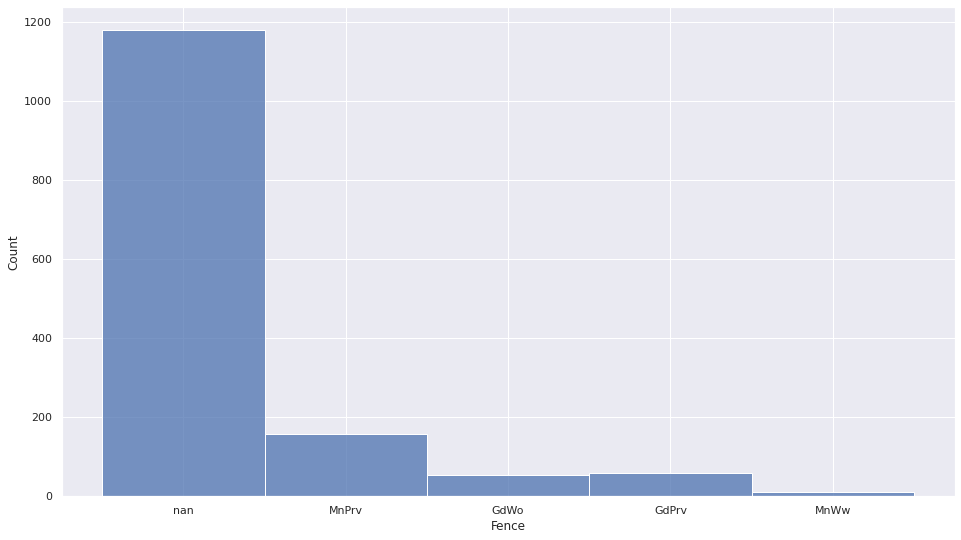

In [146]:
df_train.Fence = df_train.Fence.astype(str)
sns.histplot(data=df_train, x="Fence")

#### MiscFeature: Miscellaneous feature not covered in other categories 

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

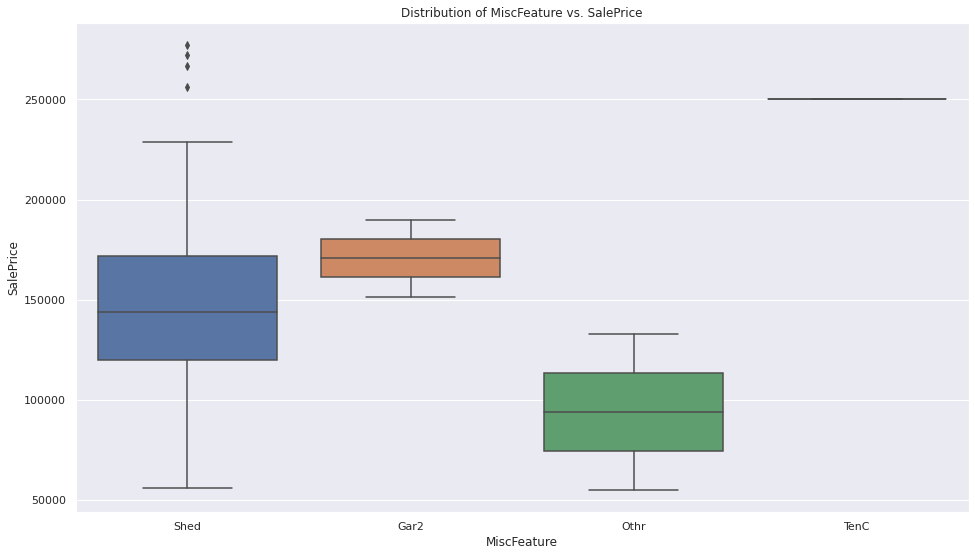

In [147]:
create_plot('MiscFeature', 'boxplot')

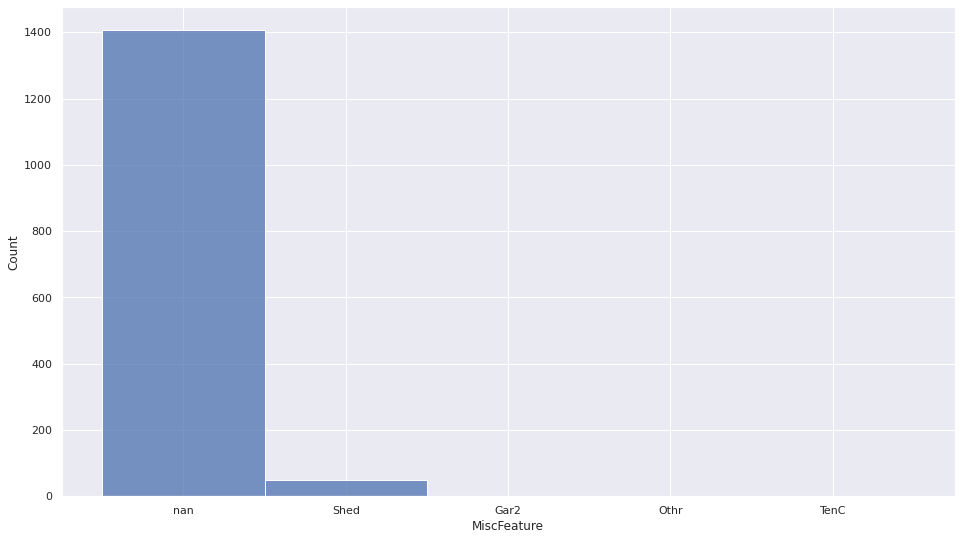

In [148]:
df_train.MiscFeature = df_train.MiscFeature.astype(str)
sns.histplot(data=df_train, x="MiscFeature")

#### MiscVal: $Value of miscellaneous feature 

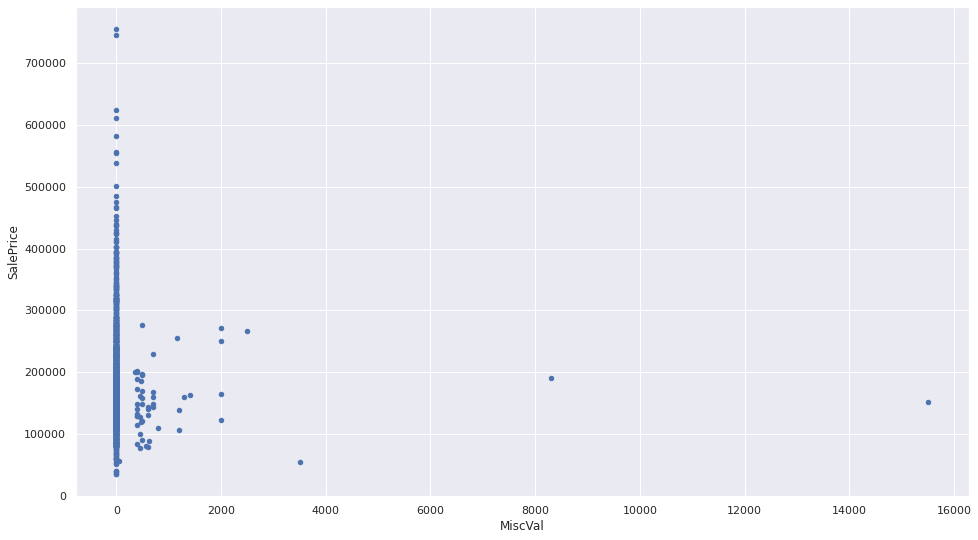

In [149]:
create_plot('MiscVal')

#### MoSold: Month Sold (MM) 

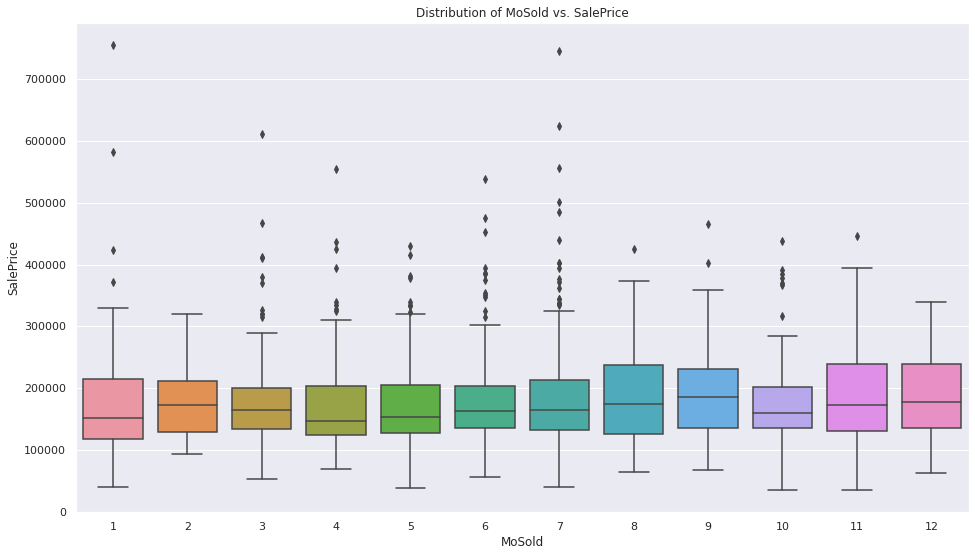

In [150]:
create_plot('MoSold', 'boxplot')

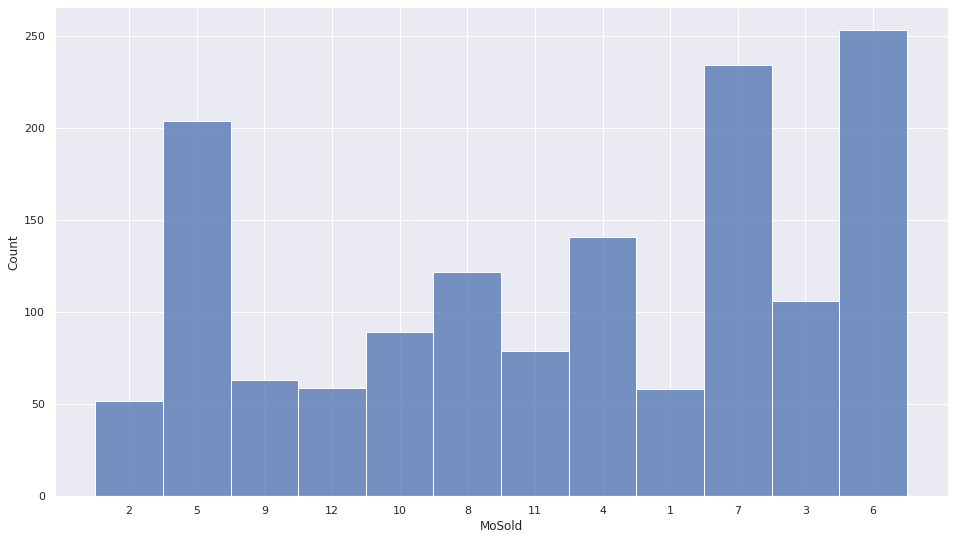

In [151]:
df_train.MoSold = df_train.MoSold.astype(str)
sns.histplot(data=df_train, x="MoSold")

#### YrSold: Year Sold (YYYY)

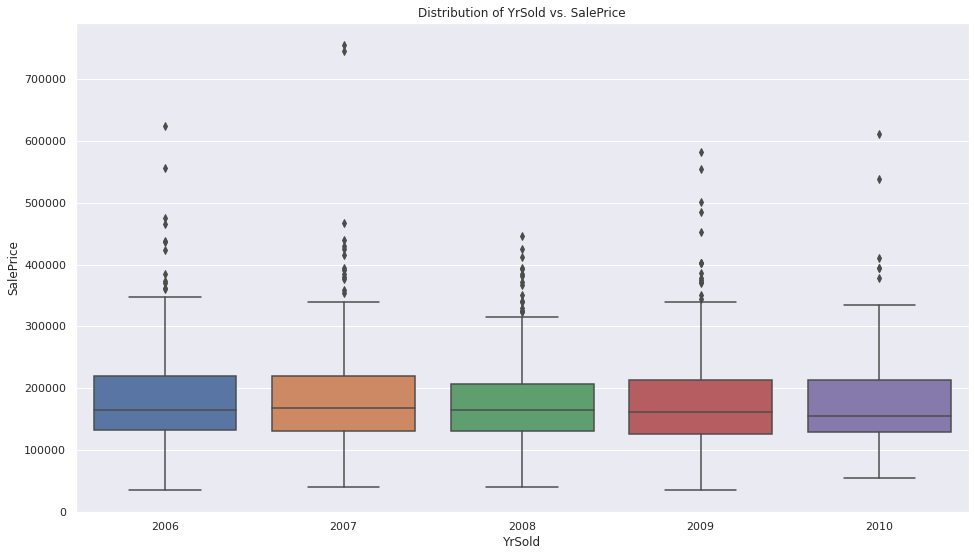

In [152]:
create_plot('YrSold', 'boxplot')

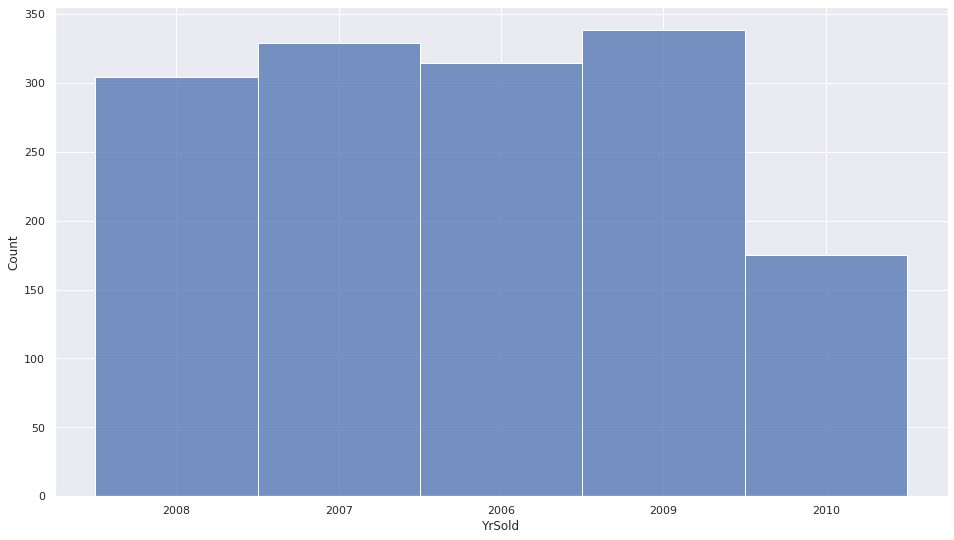

In [153]:
df_train.YrSold = df_train.YrSold.astype(str)
sns.histplot(data=df_train, x="YrSold")

#### SaleType: Type of sale 

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

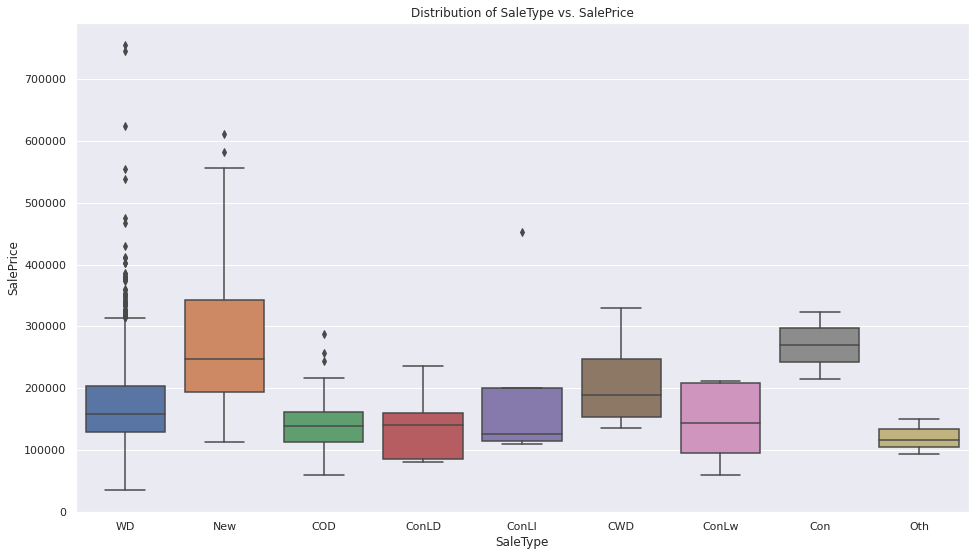

In [154]:
create_plot('SaleType', 'boxplot')

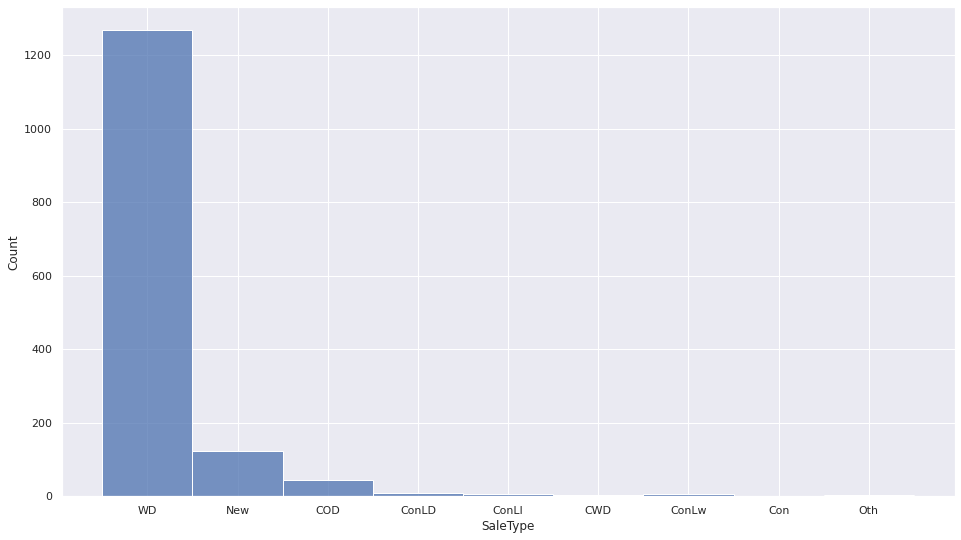

In [155]:
sns.histplot(data=df_train, x="SaleType")

#### SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

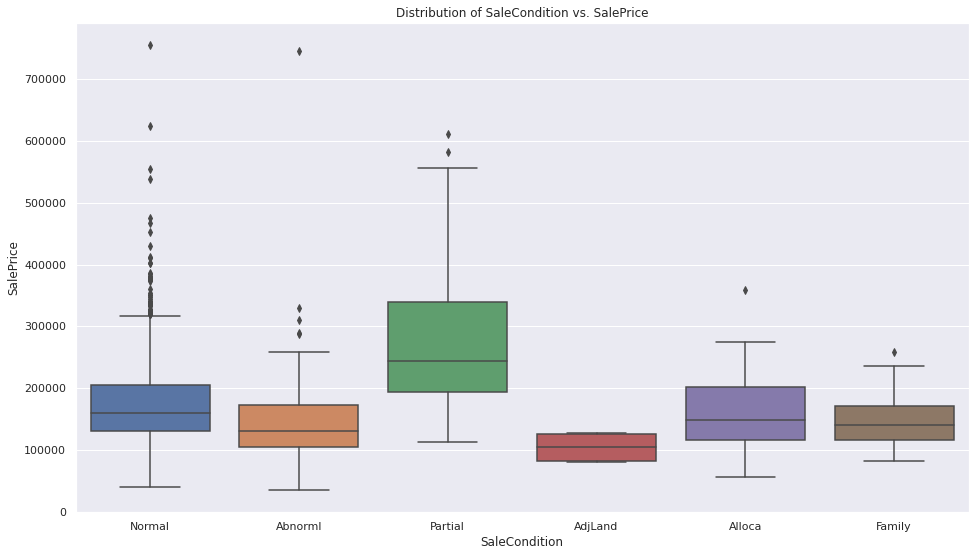

In [156]:
create_plot('SaleCondition', 'boxplot')

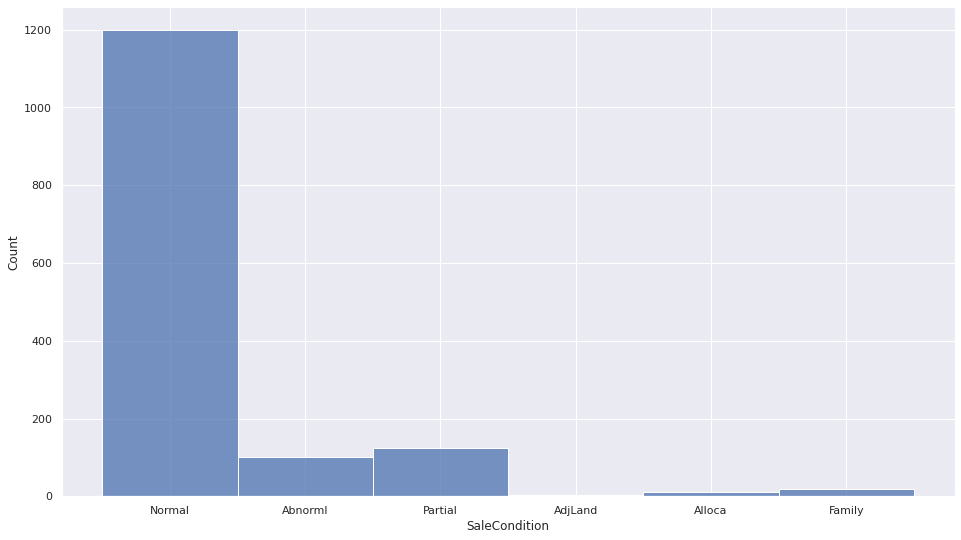

In [157]:
sns.histplot(data=df_train, x="SaleCondition")